# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**RESPUESTA:** <p style='text-align: justify'> Primero necesitaría saber qué tipos de propiedades ofrece la inmobiliaria: venta de casas con o sin patio, departamentos monoambiente, de 2 o más habitaciones, PH u oficinas, por ejemplo. También necesitaría conocer las características de cada propiedad (cómo está compuesta) y la ubicación geográfica de cada una, si está cerca de accesos, transporte público, casas de estudio y comercios. Otro dato importante es saber si la inmobiliaria tiene registros de sus clientes y de las ventas del último año. Toda esta información serviría para encontrar patrones que permitan evaluar los criterios que van a definir un precio de venta acorde. </p>

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
#Se importan las librerías Numpy, Pandas y Matplotlib:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
datos_inmobiliaria = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

print(datos_inmobiliaria.shape)
print(datos_inmobiliaria.index)
print(datos_inmobiliaria.columns)
print(datos_inmobiliaria.head())
print(datos_inmobiliaria.tail())

(146660, 19)
RangeIndex(start=0, stop=146660, step=1)
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
   start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Ca

In [3]:
datos_inmobiliaria.head(10)

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   
5  2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   
6  2019-10-17  2019-10-31  2019-10-17 -34.600988 -58.433061  Argentina   
7  2019-10-17  2019-10-31  2019-10-17 -34.600988 -58.433061  Argentina   
8  2019-10-17  2019-12-23  2019-10-17 -34.639598 -58.419612  Argentina   
9  2019-10-17  2019-12-23  2019-10-17 -34.639598 -58.419612  Argentina   

                       l2                l3  rooms  bedrooms  bathrooms  \
0         Capital Federal     San Cristobal    7.0       7.0        2.0   
1         Capital Federal             Boedo    2.0       1.0        2.0   
2         Capital Federal           Palermo    2.0       1.0        1.0   
3         Capital Federal           Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur          La Plata    2.0       1.0        1.0   
5         Capital Federal      Villa Crespo    2.0       1.0        1.0   
6         Capital Federal      Villa Crespo    2.0       1.0        1.0   
7         Capital Federal      Villa Crespo    2.0       1.0        1.0   
8         Capital Federal  Parque Patricios    1.0       1.0        1.0   
9         Capital Federal  Parque Patricios    1.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   
5           56.0             56.0  150000.0      USD   
6           70.0             70.0  159500.0      USD   
7           70.0             70.0  159500.0      USD   
8           45.0             37.0   89000.0      USD   
9           45.0             37.0   89000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   
5  Depto.tipo casa de 2 ambientes en Venta en Vil...   
6  Depto.tipo casa de 2 ambientes en Venta en Vil...   
7  Depto.tipo casa de 2 ambientes en Venta en Vil...   
8  PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...   
9  PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   
5  Excelente ph solo 2 unidades, no paga expensas...            PH   
6  Muy lindo PH, con terraza propia, 96m2! por es...            PH   
7  Muy lindo PH, con terraza propia, 96m2! por es...            PH   
8  VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...            PH   
9  VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta  
5          Venta  
6          Venta  
7          Venta  
8          Venta  
9          Venta

In [4]:
filas = len(datos_inmobiliaria.index)
columnas = len(datos_inmobiliaria.columns)
print('El dataset contiene ' + str(filas)+' filas y ' + str(columnas) + ' columnas.')

El dataset contiene 146660 filas y 19 columnas.


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

#### NOMBRE DE CADA COLUMNA 

In [5]:
print(datos_inmobiliaria.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


#### VALORES FALTANTES DE CADA COLUMNA 

In [6]:
#print(datos_inmobiliaria.isna())
datos_inmobiliaria.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [7]:
faltantes_porcentaje = (100*(datos_inmobiliaria.isna().sum())/len(datos_inmobiliaria)).round(2)
print(faltantes_porcentaje)

start_date          0.00
end_date            0.00
created_on          0.00
lat                 6.77
lon                 6.79
l1                  0.00
l2                  0.00
l3                  0.00
rooms               0.00
bedrooms            0.00
bathrooms           4.06
surface_total      14.00
surface_covered    14.74
price               0.00
currency            0.00
title               0.00
description         0.00
property_type       0.00
operation_type      0.00
dtype: float64


Existen valores faltantes en los atributos latitud, longitud, baños, superficie total y superficie cubierta. En las variables `surface_total` y `surface_covered` hay mayor cantidad de valores faltantes.

In [8]:
print(datos_inmobiliaria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

#### TIPOS DE PROPIEDADES EN EL DATASET

Para determinar la cantidad de tipos de propiedades se realiza lo siguiente:

In [9]:
cant_tipo_prop = len(datos_inmobiliaria['property_type'].unique()) 
print('Cantidad de tipos de propiedad:', cant_tipo_prop)


print("TIPOS DE PROPIEDADES PUBLICADOS: ")
tipo_propiedad = datos_inmobiliaria["property_type"].value_counts().index
print(tipo_propiedad)


tipo_operacion = datos_inmobiliaria["operation_type"].value_counts().index
print(tipo_operacion)


Cantidad de tipos de propiedad: 10
TIPOS DE PROPIEDADES PUBLICADOS: 
Index(['Departamento', 'Casa', 'PH', 'Lote', 'Oficina', 'Otro',
       'Local comercial', 'Casa de campo', 'Depósito', 'Cochera'],
      dtype='object')
Index(['Venta'], dtype='object')


#### CANTIDAD DE INSTANCIAS POR TIPO DE PROPIEDAD

In [10]:
# print(datos_inmobiliaria.loc[:,'property_type'])
print(datos_inmobiliaria['property_type'].value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


In [11]:
print(datos_inmobiliaria['operation_type'].value_counts())

Venta    146660
Name: operation_type, dtype: int64


Para visualizar mejor la cantidad de instancias con el mismo tipo de propiedad se realiza el siguiente gráfico:

Text(0.5, 1.0, 'Tipos de Propiedades')

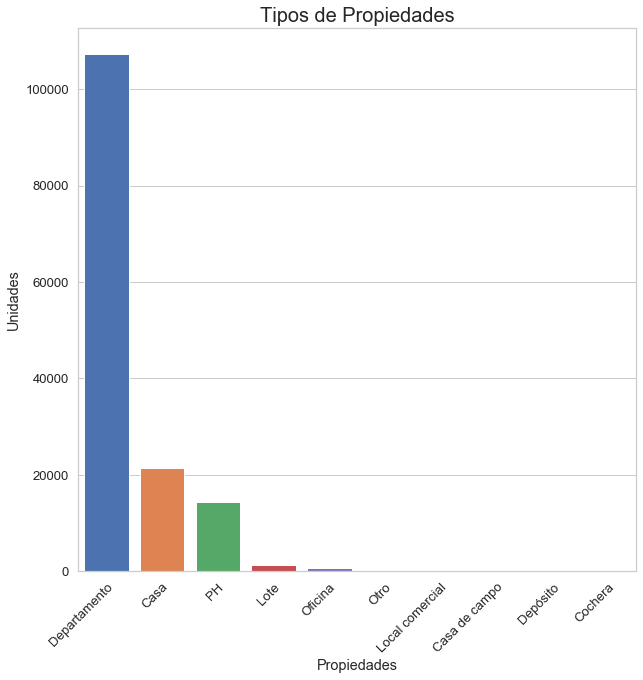

In [12]:

plt.figure(figsize=(10,10))
sns.set(style='whitegrid', font_scale=1.2)
grafico_1 = sns.countplot(x = "property_type", data = datos_inmobiliaria, saturation=1, order=tipo_propiedad)
grafico_1.set_xticklabels(grafico_1.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
#plt.xticks(rotation=degrees) # Otra manera de rotar las etiquetas del eje x
plt.ylabel('Unidades')
plt.xlabel('Propiedades')
plt.title("Tipos de Propiedades", size=20)


En la figura de arriba, se observa que las propiedades con mayor cantidad de unidades en el dataset de Properati son "Departamento", "Casa" y "PH". Hay más de 100000 departamentos, algo más de 20000 casas y alrededor de 14000 PH's.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [13]:
l2 = datos_inmobiliaria.l2.values
l3 = datos_inmobiliaria.l3.values
print(l2)
print(l3)

['Capital Federal' 'Capital Federal' 'Capital Federal' ...
 'Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Norte']
['San Cristobal' 'Boedo' 'Palermo' ... 'Pilar' 'Pilar' 'Pilar']


Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64
0 92539
1 24282
2 17173
3 12666


Text(0.5, 1.0, 'Cantidad de Propiedades por distrito')

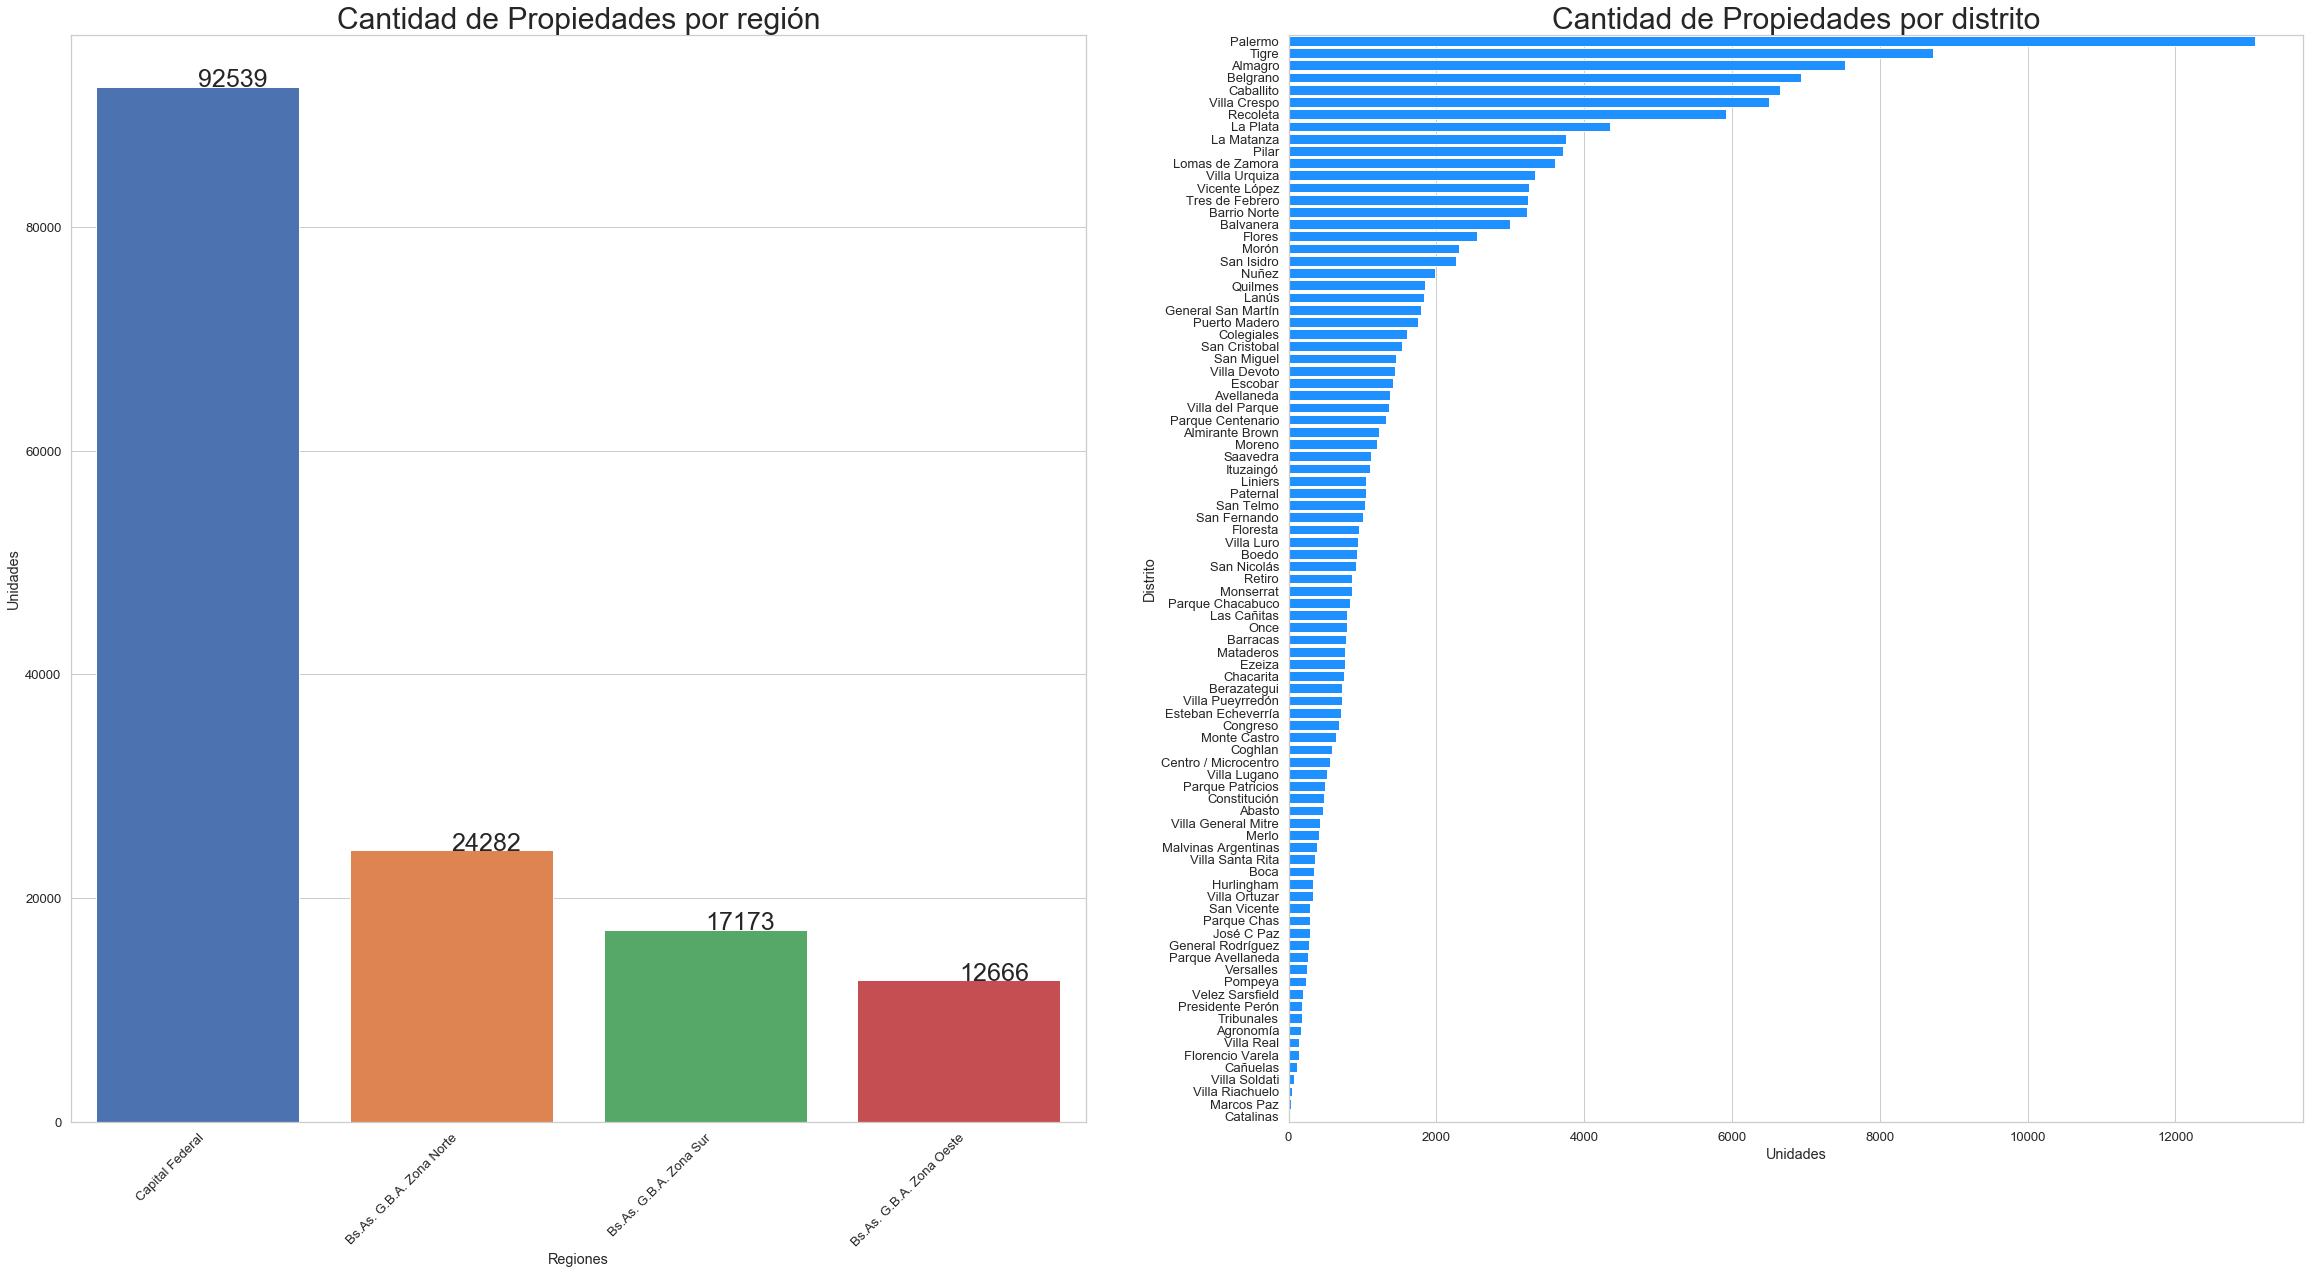

In [14]:
region = datos_inmobiliaria["l2"].value_counts().index
cantidad_region = datos_inmobiliaria["l2"].value_counts()
distrito = datos_inmobiliaria["l3"].value_counts().index
cantidad_distrito = datos_inmobiliaria["l3"].value_counts(ascending=False)
print(cantidad_region)

plt.figure(figsize = (40, 20))

plt.subplot(1, 2, 1)
grafico_region = sns.countplot(x = "l2", data = datos_inmobiliaria, saturation=1, order= region)
for  pX, pY in enumerate(cantidad_region):
    plt.annotate(pY, xy=(pX, pY), size=25)
    print(pX, pY)
grafico_region.set_xticklabels(grafico_region.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
plt.ylabel('Unidades')
plt.xlabel('Regiones')
plt.title("Cantidad de Propiedades por región", size=30)


plt.subplot(1, 2, 2)
grafico_distrito = sns.countplot(y = 'l3', data = datos_inmobiliaria, saturation=1, order=distrito, color='dodgerblue')
plt.yticks(fontsize=13)
plt.ylabel('Distrito')
plt.xlabel('Unidades')
plt.title("Cantidad de Propiedades por distrito", size=30)

<p style='text-align: justify'>Se puede observar que las publicaciones son, en su mayoría, de Capital Federal (CABA). Luego le siguen GBA Zona Norte, GBA Zona Sur y GBA Zona Oeste. Si en vez de analizar la cantidad de publicaciones por región se hace por distrito, se obtienen que entre los distritos con mayores publicaciones figuran Palermo (CABA), Tigre (GBA Norte), Almagro (CABA), Belgrano (CABA) y Caballito (CABA). Palermo se destaca por tener alrededor de 13000 publicaciones. El resto de los distritos estan por debajo de las 9000 publicaciones. En total exiten 4 regiones y 89 distritos en el dataset.

In [17]:
cantidad_distrito = datos_inmobiliaria["l3"].value_counts()
print(cantidad_distrito)
len(cantidad_distrito)

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


89

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Las tres clases de propiedad más abundantes son: `"Departamento", "Casa" y "PH"`. Mientras que la región con más propiedades publicadas es `Capital Federal`.

In [18]:
df_filtro_RegProp = datos_inmobiliaria[(datos_inmobiliaria.l2=="Capital Federal") & ((datos_inmobiliaria.property_type=="Departamento") | (datos_inmobiliaria.property_type=="Casa") | (datos_inmobiliaria.property_type=="PH"))]

print(df_filtro_RegProp.shape)
df_filtro_RegProp.head()

(91485, 19)


start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5  2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   

                l2             l3  rooms  bedrooms  bathrooms  surface_total  \
0  Capital Federal  San Cristobal    7.0       7.0        2.0          140.0   
1  Capital Federal          Boedo    2.0       1.0        2.0           70.0   
2  Capital Federal        Palermo    2.0       1.0        1.0           45.0   
3  Capital Federal        Palermo    2.0       1.0        1.0           85.0   
5  Capital Federal   Villa Crespo    2.0       1.0        1.0           56.0   

   surface_covered     price currency  \
0            140.0  153000.0      USD   
1             58.0  159000.0      USD   
2             45.0  125000.0      USD   
3             50.0  295000.0      USD   
5             56.0  150000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5  Depto.tipo casa de 2 ambientes en Venta en Vil...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5  Excelente ph solo 2 unidades, no paga expensas...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
5          Venta

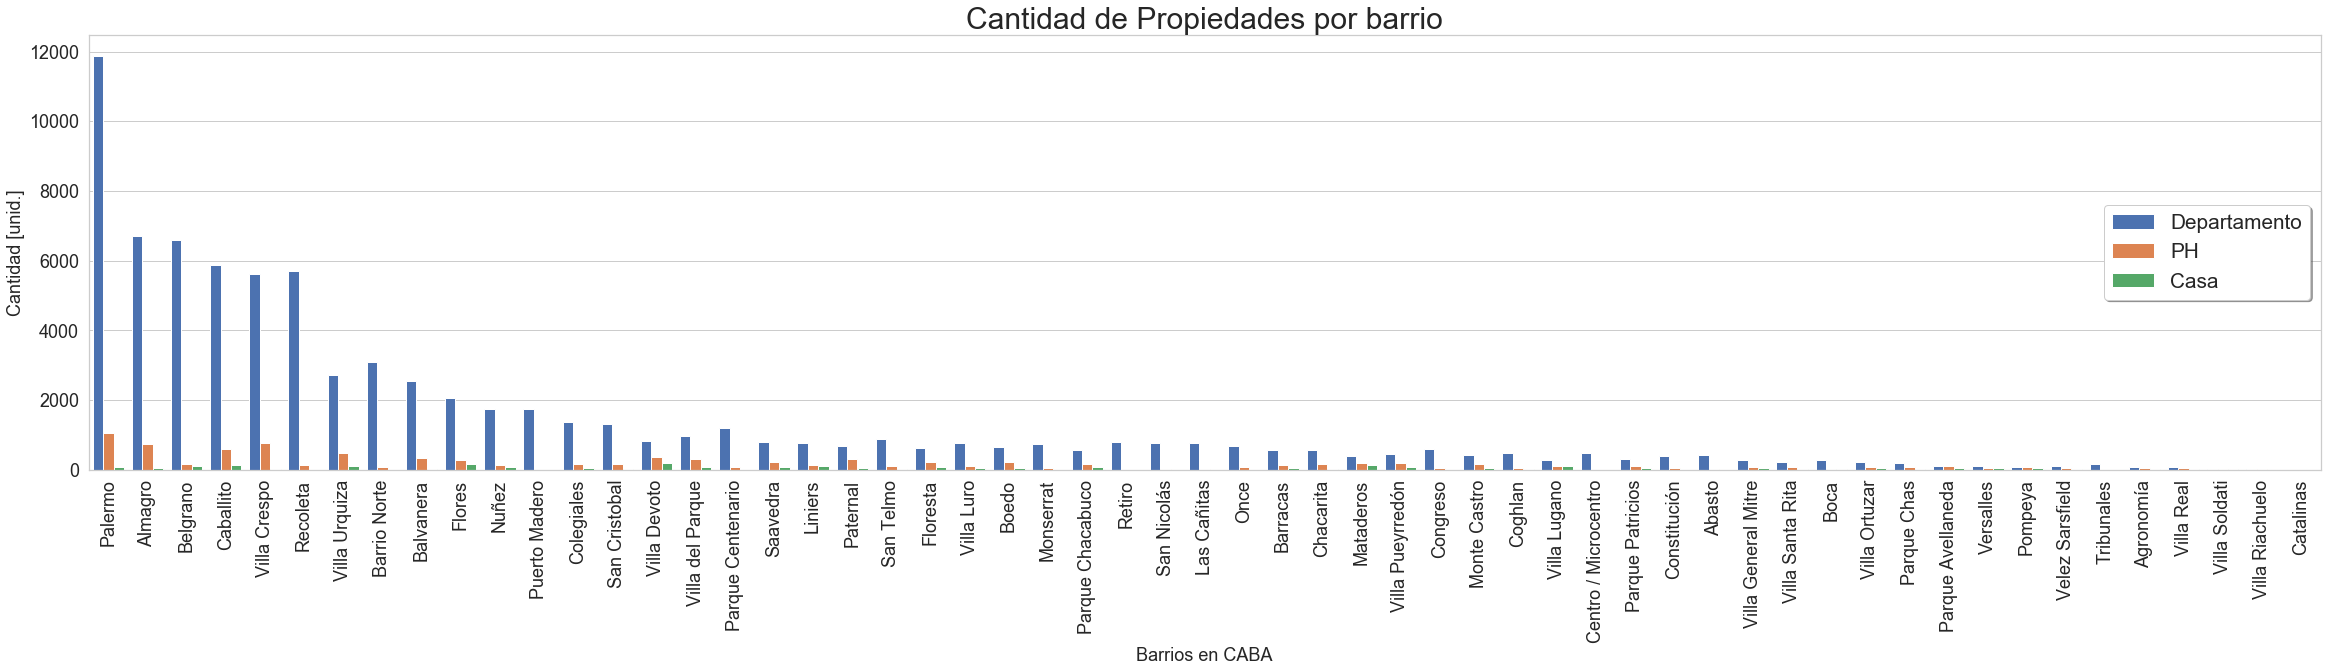

In [19]:
barrios = df_filtro_RegProp["l3"].value_counts().index

plt.figure(figsize = (40, 8))
grafico_barrios = sns.countplot(x = 'l3', data = df_filtro_RegProp, saturation=1, order=barrios, hue='property_type')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18, rotation=90)
plt.ylabel('Cantidad [unid.]', fontsize=18)
plt.xlabel('Barrios en CABA',  fontsize=18)
plt.title("Cantidad de Propiedades por barrio", size=30)
plt.legend(loc='center right', shadow=True, fontsize='x-large', fancybox=True)

<p style='text-align: justify'>Se puede confirmar que si se realiza un enfoque en cada distrito de CABA, hay mayor cantidad de publicaciones de departamentos en cada uno de ellos. Luego, se observa que en general hay mayor cantidad de PHs que de casas en cada barrio.

In [20]:
cantidad_Palermo = df_filtro_RegProp[(df_filtro_RegProp.l3=='Belgrano')]
cantidad_Palermo['property_type'].value_counts()

Departamento    6590
PH               167
Casa             119
Name: property_type, dtype: int64

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

## A. ANÁLISIS DE ESTADÍSTICOS

In [21]:
print(df_filtro_RegProp.isna().sum())

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64


In [22]:
df_filtro_RegProp.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  86951.000000  86937.000000  91485.000000  91485.000000  89314.000000   
mean     -34.599081    -58.436002      2.964278      1.960278      1.560147   
std        0.023957      0.036297      1.314704      1.072946      0.860309   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.613757    -58.459605      2.000000      1.000000      1.000000   
50%      -34.599446    -58.433789      3.000000      2.000000      1.000000   
75%      -34.584148    -58.410143      4.000000      3.000000      2.000000   
max      -34.535818    -58.353930     26.000000     15.000000     14.000000   

       surface_total  surface_covered         price  
count   82568.000000     82250.000000  9.148500e+04  
mean      112.626369        94.966310  2.595003e+05  
std       980.713664       778.515243  3.222654e+05  
min        10.000000         1.000000  6.000000e+03  
25%        49.000000        44.000000  1.200000e+05  
50%        71.000000        63.000000  1.750000e+05  
75%       111.000000        96.000000  2.790000e+05  
max    126062.000000    126062.000000  3.243423e+07

De los valores estadisticos obtenidos, se descarta analizar en este momento los referidos a la latitud ("lat") y a la longitud ("lon").

Considerando las propiedades "Departamento", "Casa" y "PH" se realiza un primer análisis de cada atributo. Se llega a lo siguiente:

<p style='text-align: justify'>"rooms": Las 91485 instancias poseen información sobre la cantidad de habitaciones, de las cuales se encuentra que las propiedades del dataframe tienen en promedio, entre 2 y 3 habitaciones. La mediana de habitaciones es 3. Ademas, se encontraron instancias con 1 habitacion. Esto hace sospechar sobre el concepto adoptado para este tipo de propiedad: puede ser monoambiente, un espacio adaptado para oficina o estudio, cocheras, entre otros. Se hará un mejor analisis ya que la media es sensible a los valores atipicos. Por otro lado, la propiedad con mayor cantidad de habitaciones, tiene 26 habitaciones. Este podría ser un valor atípico, ya que el 75% de las instancias tiene 4 habitaciones. Se verá con un boxplot.

<p style='text-align: justify'>"bedrooms": hay informacion de las 91485 instancias. La mediana es 2 dormitorios. La mitad de las instancias tiene 2 dormitorios, mientras que el 75%, tiene 3 dormitorios como máximo. Hay propiedades con 0 habitaciones. Este caso es posible analizar para conocer el criterio adoptado, dado que puede hacer referencia a un monoambiente u otro tipo de propiedad (error de carga). Por otro lado, hay propiedades con 15 dormitorios (valor atípico).

<p style='text-align: justify'>"bathrooms": 89314 instancias tienen informacion sobre la cantidad de baños (hay 2171 instancia sin información sobre baños). Eso reprensenta un poco más del 97% de las instancias. En promedio, las propiedades tienen entre 1 y 2 baños. Se considera la media de 1,5 y que el 75% de la muestra posee hasta 2 baños. Hay propiedades con 14 baños.

<p style='text-align: justify'>"surface_total": 82568 instancias tienen informacion de la superficie total (90.25% de la muestra). Esta columna se debe analizar con mayor profundidad ya que los valores estadísticos dan mínimos de 10 m2 y máximos de 126062 m2, siendo la media de 112.62 m2.

<p style='text-align: justify'>"surface_covered": 82250 instancias tiene informacion de la superficie cubierta. Representa el 90% de la muestra. Se debe analizar más en profundidad.

<p style='text-align: justify'>"price": hay información de precio de todas las propiedades. Hay propiedades desde 6000 dólares hasta 32.434.230 dólares.

In [23]:
# Se filtran los valores faltantes para limpiar el dataframe:

df_filtro_RegProp = df_filtro_RegProp.dropna()

### Análisis del atributo **"rooms"**

La primera pregunta que surge es cómo es la distribución de la variable rooms para conocer qué proporción ocupan las habitaciones en cada tipo de propiedad.

Text(0.5, 1.0, 'Distribución de variable "Rooms"')

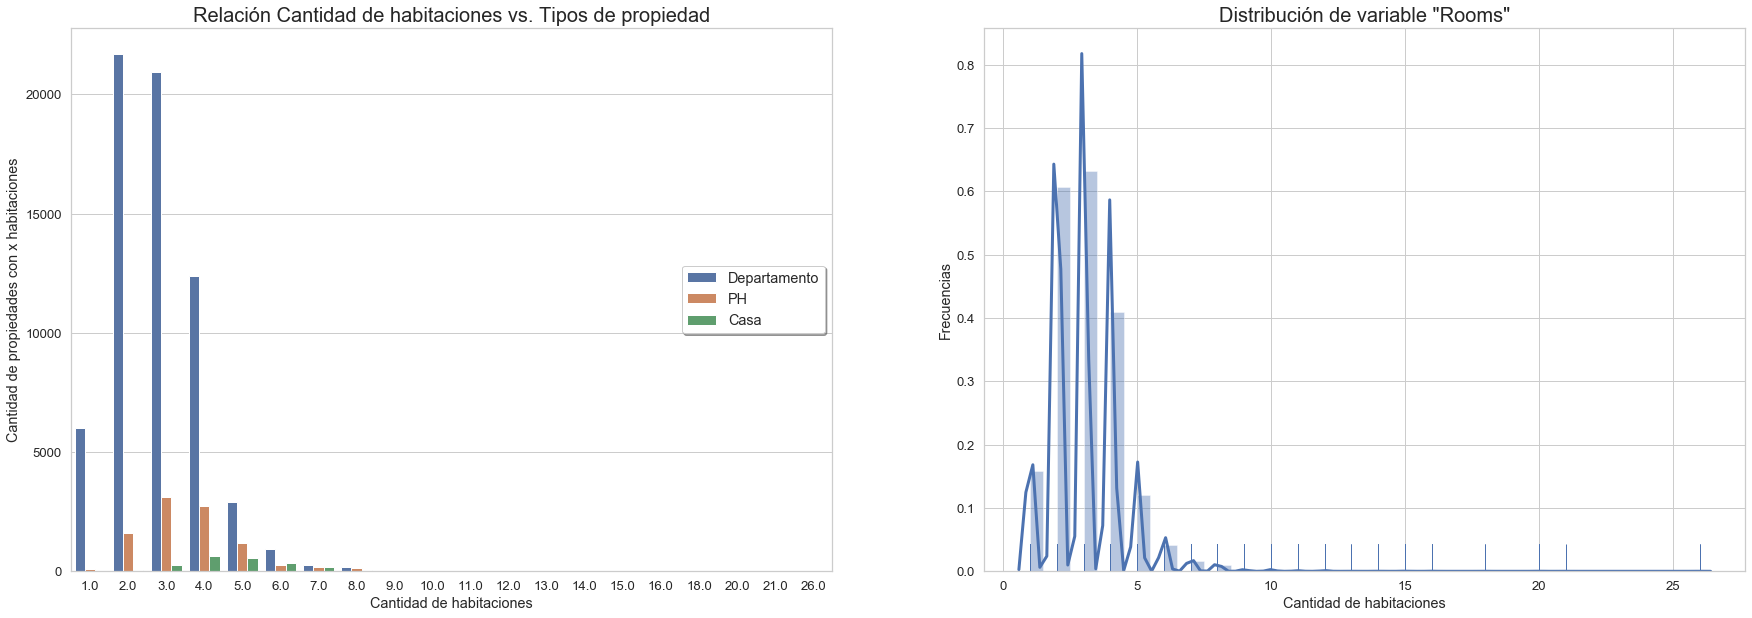

In [24]:
plt.figure(figsize = (30, 10))
plt.subplot(1,2,1)
ax = sns.countplot(data=df_filtro_RegProp, x='rooms', hue='property_type')
plt.legend(loc='center right', shadow=True, fontsize='medium', fancybox=True)
plt.ylabel('Cantidad de propiedades con x habitaciones')
plt.xlabel('Cantidad de habitaciones')
plt.title('Relación Cantidad de habitaciones vs. Tipos de propiedad', fontsize=20)

plt.subplot(1,2,2)
sns.distplot(df_filtro_RegProp['rooms'], rug=True, kde_kws={"lw": 3})
plt.ylabel('Frecuencias')
plt.xlabel('Cantidad de habitaciones')
plt.title('Distribución de variable "Rooms"', fontsize=20)


<p style='text-align: justify'>Del gráfico countplot y del histograma se obtiene que la mayoría de las propiedades tienen entre 1 y 6 habitaciones. Hay varios valores atípicos. Si se calculan quartiles, IRC y valores átipicos leves, se puede tener mejor noción de estos valores.

Valor atipico leve mínimo: -1.0 ; Valor atipico leve máximo: 5.0
Valor atipico extremo mínimo: -4.0 ; Valor atipico extremo máximo: 8.0


Text(0.5, 1.0, 'Diagrama de caja de habitaciones por tipo de propiedad')

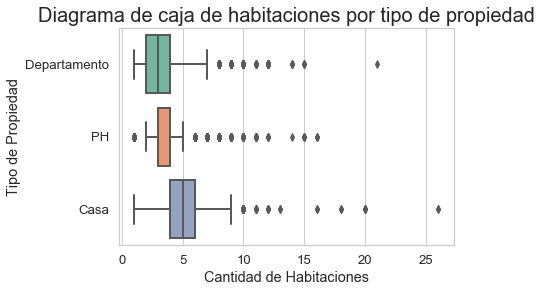

In [25]:
# Se calculan los quartiles Q1 y Q3 para obtener el IQR:

Q1 = np.quantile(df_filtro_RegProp['rooms'].values, 0.25)
Q3 = np.quantile(df_filtro_RegProp['rooms'].values, 0.75)

IQR = Q3 - Q1

#Se obtienen los valores atipicos leves:

atipico_leve_min = Q1 - 1.5 * IQR
atipico_leve_max = Q1 + 1.5 * IQR

#Se obtienen los valores atipicos extremos:

atipico_extr_min = Q1 - 3 * IQR
atipico_extr_max = Q1 + 3 * IQR

print(f'Valor atipico leve mínimo: {atipico_leve_min} ; Valor atipico leve máximo: {atipico_leve_max}')
print(f'Valor atipico extremo mínimo: {atipico_extr_min} ; Valor atipico extremo máximo: {atipico_extr_max}')

sns.boxplot(data=df_filtro_RegProp, x='rooms', y='property_type', linewidth=2, palette="Set2")
plt.ylabel('Tipo de Propiedad')
plt.xlabel('Cantidad de Habitaciones')
plt.title('Diagrama de caja de habitaciones por tipo de propiedad', fontsize=20)

<p style='text-align: justify'>En el "digramama de caja de habitaciones por tipo de propiedad" se evidencia la presencia de outliers o valores atípicos para los 3 tipos de propiedades que se vienen analizando. En términos generales (considerando el atributo "rooms" sin discriminar por tipo de propiedad) se puede decir que a partir de 8 habitaciones, se consideran valores atípicos.

### Análisis del atributo **"bedrooms"**

Text(0.5, 1.0, 'Distribución de variable "bedrooms"')

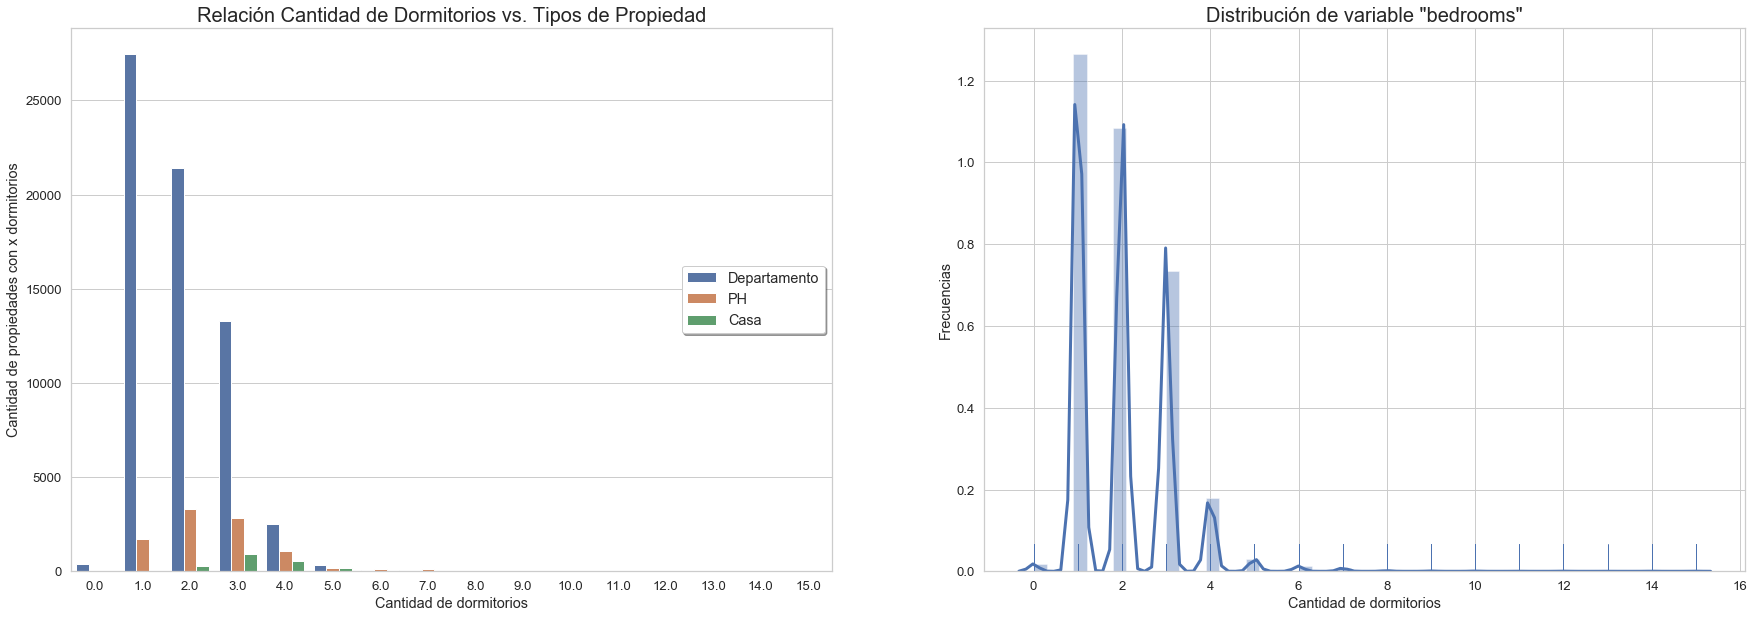

In [26]:
plt.figure(figsize = (30, 10))
plt.subplot(1,2,1)

sns.countplot(data=df_filtro_RegProp, x='bedrooms', hue='property_type')
plt.legend(loc='center right', shadow=True, fontsize='medium', fancybox=True)
plt.ylabel('Cantidad de propiedades con x dormitorios')
plt.xlabel('Cantidad de dormitorios')
plt.title('Relación Cantidad de Dormitorios vs. Tipos de Propiedad', fontsize=20)

plt.subplot(1,2,2)

sns.distplot(df_filtro_RegProp['bedrooms'], rug=True, kde_kws={"lw": 3})
plt.ylabel('Frecuencias')
plt.xlabel('Cantidad de dormitorios')
plt.title('Distribución de variable "bedrooms"', fontsize=20)

<p style='text-align: justify'>Analizando la variable "bedrooms" a través de un gráfico de barrras y un histograma, se determina que la mayoría de los departamentos posee entre 1 y 3 habitaciones. Los PHs poseen entre 2 y 3, mayormente. Las casas, en cambio, tienen entre 3 y 4 habitaciones en su mayoría. Del histograma, en particular, se observa la distribución general del atributos "bedrooms" sin considerar el tipo de propiedad.

Valor atipico leve mínimo: -2.0 ; Valor atipico leve máximo: 4.0
Valor atipico extremo mínimo: -5.0 ; Valor atipico extremo máximo: 7.0


Text(0.5, 1.0, 'Diagrama de caja de habitaciones por tipo de propiedad')

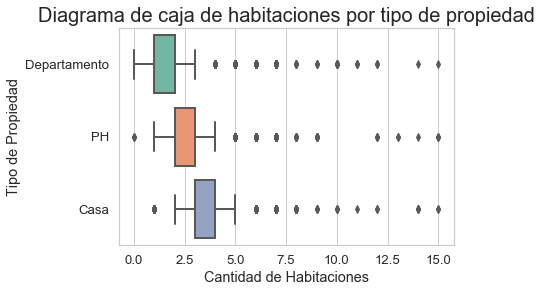

In [27]:
# Se calculan los quartiles Q1 y Q3 para obtener el IQR:

Q1 = df_filtro_RegProp["bedrooms"].quantile(.25)
Q3 = df_filtro_RegProp["bedrooms"].quantile(.75)

IQR = Q3 - Q1

#Se obtienen los valores atipicos leves:

atipico_leve_min = Q1 - 1.5 * IQR
atipico_leve_max = Q1 + 1.5 * IQR

#Se obtienen los valores atipicos extremos:

atipico_extr_min = Q1 - 3 * IQR
atipico_extr_max = Q1 + 3 * IQR

print(f'Valor atipico leve mínimo: {atipico_leve_min} ; Valor atipico leve máximo: {atipico_leve_max}')
print(f'Valor atipico extremo mínimo: {atipico_extr_min} ; Valor atipico extremo máximo: {atipico_extr_max}')

sns.boxplot(data=df_filtro_RegProp, x='bedrooms', y='property_type', linewidth=2, palette="Set2")
plt.ylabel('Tipo de Propiedad')
plt.xlabel('Cantidad de Dormitorios')
plt.title('Diagrama de caja de dormitorios por tipo de propiedad', fontsize=20)

<p style='text-align: justify'>Al realizar el "Diagrama de caja de dormitorios por propiedad" se confirma lo observado en el gráfico de barras. La mayoría de los departamentos tienen hasta 2 dormitorios. El resto de los departamentos con más domritorios representan valores atípicos. En el caso de los PHs, estos tienen entre 2 y 3. Las casas poseen entre 3 y 4 dormitorios. Para cada tipo de propiedad se destaca el valor atípico extremo. En general, por encima de los 5 dormitorios, se consideran publicaciones con valores atípicos.

### Análisis del atributo **"bathrooms"**

Text(0.5, 1.0, 'Distribución de variable "bathrooms"')

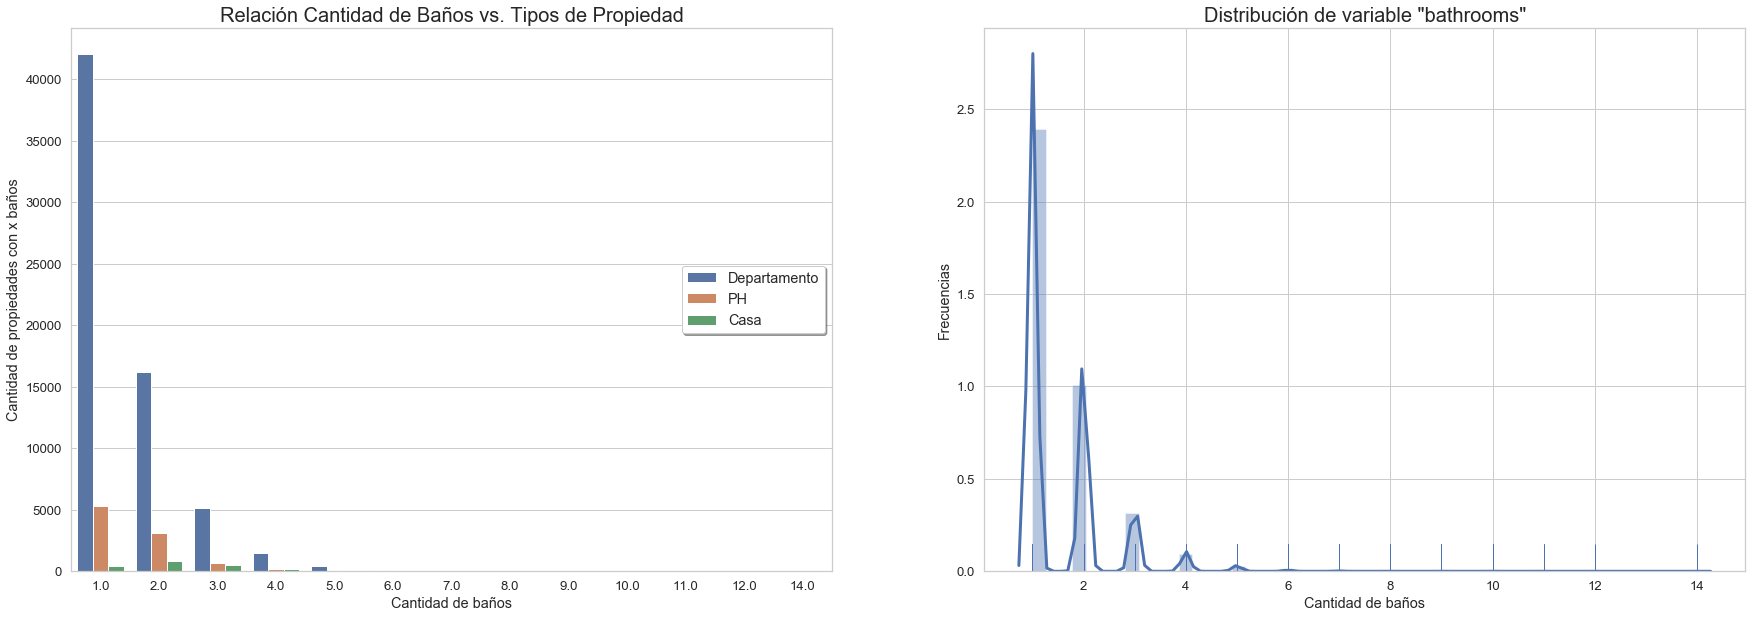

In [28]:
plt.figure(figsize = (30, 10))
plt.subplot(1,2,1)

sns.countplot(data=df_filtro_RegProp, x='bathrooms', hue='property_type')
plt.legend(loc='center right', shadow=True, fontsize='medium', fancybox=True)
plt.ylabel('Cantidad de propiedades con x baños')
plt.xlabel('Cantidad de baños')
plt.title('Relación Cantidad de Baños vs. Tipos de Propiedad', fontsize=20)

plt.subplot(1,2,2)

sns.distplot(df_filtro_RegProp['bathrooms'], rug=True, kde_kws={"lw": 3})
plt.ylabel('Frecuencias')
plt.xlabel('Cantidad de baños')
plt.title('Distribución de variable "bathrooms"', fontsize=20)

<p style='text-align: justify'>En este caso se observa la distribución del atributo "bathrooms", es decir, los baños. En general, las propiedades tienen entre 1 y 4 baños. Se destaca que la mayoría de los departamentos tienen entre 1 y 3 baños, y los PHs, entre 1 y 3. Las casas también tienen entre 1 y 3 baños.

## B. ANÁLISIS DE LA VARIABLE **"surface_total"**. VALORES EXTREMOS

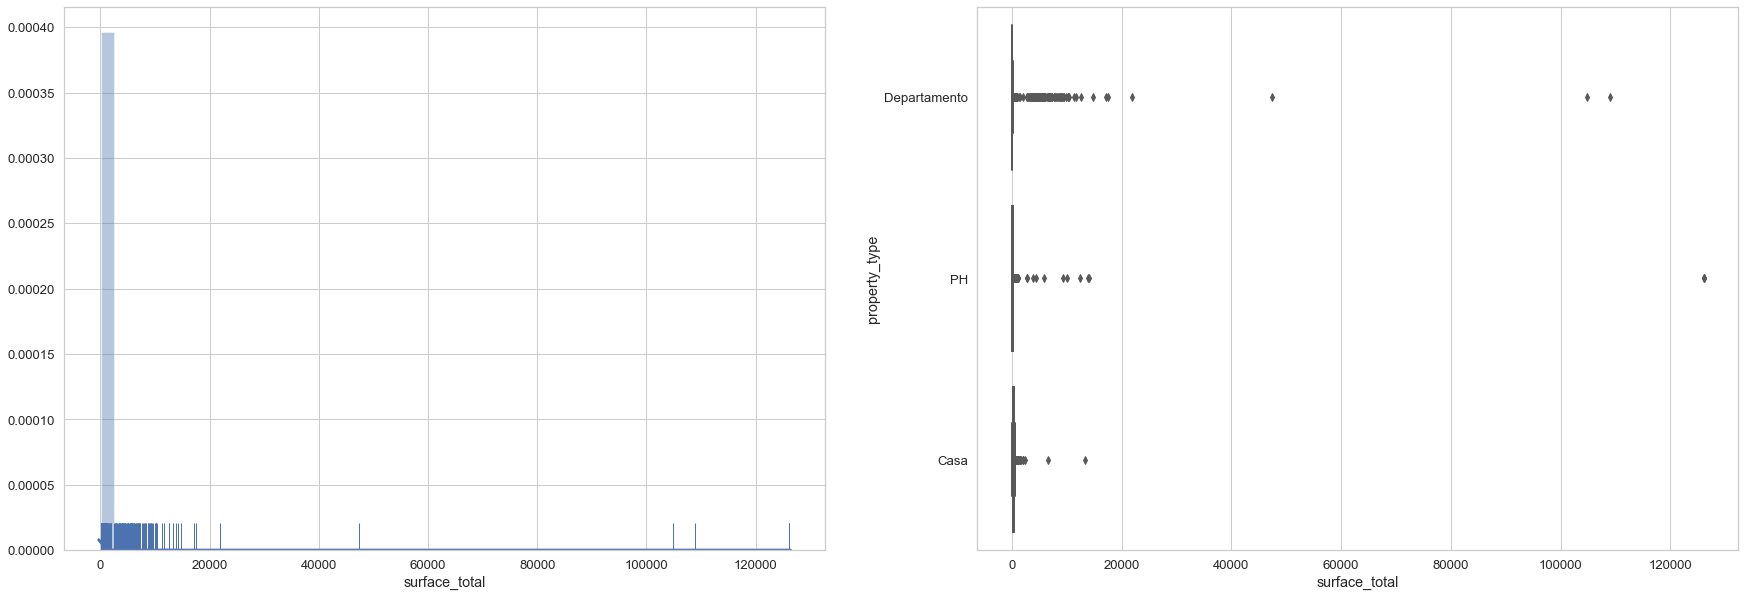

In [29]:
plt.figure(figsize = (30,10))
plt.subplot(1, 2, 1)
sns.distplot(df_filtro_RegProp['surface_total'], rug=True,kde=True, kde_kws={"lw": 3})

plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtro_RegProp, x='surface_total', y='property_type', linewidth=2, palette="Set2")

<p style='text-align: justify'>Al querer representar la distribución de la superficie total (atributo "surface_total") de todo el dataset, no es posible observar la forma de la distribución dado que existen grandes cantidades de propiedades con distintas superficies. Para poder realizar un mejor análisis se van a determinar los valores atípicos, los cuales van a separarse del dataset y así, conocer la distribución de la variable en cuestión.

In [30]:
# Se calculan los quartiles Q1 y Q3 para obtener el IQR:

Q1 = df_filtro_RegProp["surface_total"].quantile(.25)
Q3 = df_filtro_RegProp["surface_total"].quantile(.75)
print(Q1, Q3)

IQR = Q3 - Q1

#Se obtienen los valores atipicos leves:

atipico_leve_min = Q1 - 1.5 * IQR
atipico_leve_max = Q3 + 1.5 * IQR

#Se obtienen los valores atipicos extremos:

atipico_extr_min = Q1 - 3 * IQR
atipico_extr_max = Q3 + 3 * IQR

print(f'Valor atipico leve mínimo: {atipico_leve_min} ; Valor atipico leve máximo: {atipico_leve_max}')
print(f'Valor atipico extremo mínimo: {atipico_extr_min} ; Valor atipico extremo máximo: {atipico_extr_max}')


49.0 110.0
Valor atipico leve mínimo: -42.5 ; Valor atipico leve máximo: 201.5
Valor atipico extremo mínimo: -134.0 ; Valor atipico extremo máximo: 293.0


Con los valores atipicos de la variable "surface_total" hago un filtro del dataset para mejorar la visualización y el análisis de los datos. Se toma como intervalo de superficie total los valores entre 10 m2 y 297 m2 (valor atipico extremo). De no mejorar la visualizacion trabajo con el quantil 99.

Text(0.5, 1.0, 'Diagrama de Caja - Superficie Total')

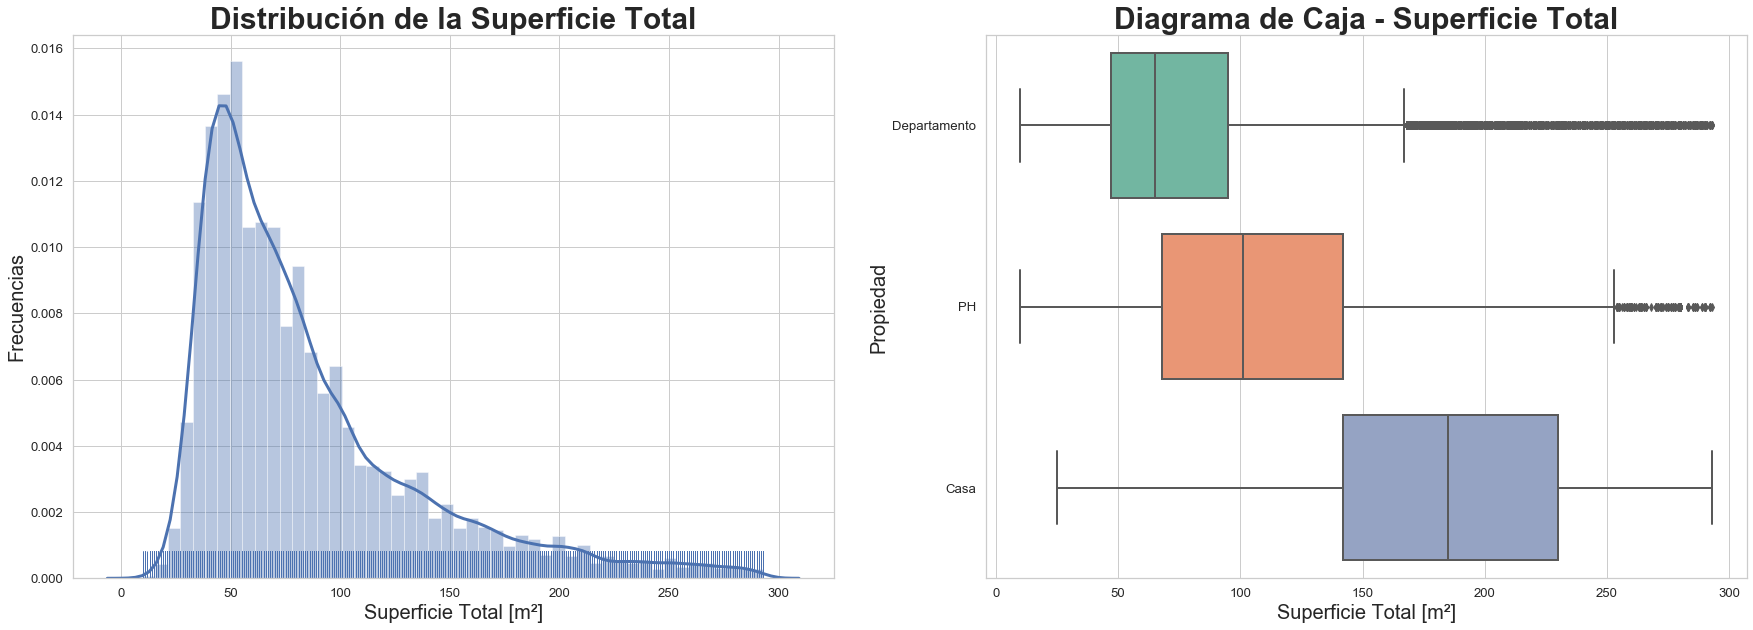

In [31]:
df_RegProp_filtro1 = df_filtro_RegProp[(df_filtro_RegProp.surface_total >= df_filtro_RegProp.surface_total.min()) & (df_filtro_RegProp.surface_total <= atipico_extr_max)]

plt.figure(figsize = (30, 10))
plt.subplot(1,2,1)
sns.distplot(df_RegProp_filtro1['surface_total'], rug=True,kde=True, kde_kws={"lw": 3})
plt.ylabel('Frecuencias',fontsize=20)
plt.xlabel('Superficie Total [m²]',fontsize=20)
plt.title('Distribución de la Superficie Total', fontsize=30, fontweight='bold', fontstretch='semi-expanded')


plt.subplot(1,2,2)
sns.boxplot(data=df_RegProp_filtro1, x='surface_total', y='property_type', linewidth=2, palette="Set2")
plt.ylabel('Propiedad',fontsize=20)
plt.xlabel('Superficie Total [m²]',fontsize=20)
plt.title('Diagrama de Caja - Superficie Total', fontsize=30, fontweight='bold', fontstretch='semi-expanded')


Se filtra el dataset considerando solamente aquellas propiedades menores o iguales al valor atípico extremo máximo de la superficie total("atipico_extr_max = Q3 + 3 * IQR"). Al hacer esto, se toman las propiedades con superficie total menor o igual a 293 m<sup>2</sup>. Luego de hacer esto, se representa nuevamente el histograma de la variable "surface_total". En este caso se observa claramente su distribución. Si se realiza el diagrama de cajas es posible ver la concentación de los valores de superficie total más usuales en las propiedades del dataset. En el caso de los departamentos, la mayoría de ellos oscila entre los 40 y 100 m<sup>2</sup>. Los PHs rondan entre los 0 y 140 m<sup>2</sup>. Las casas tienen entre 140 y 240 m<sup>2</sup> de superficie total. Todo esto se deduce de los gráficos **"Distribución de Superficie Total"** y **"Diagrama de Caja - Superficie Total"**.

In [32]:

prop_1por100 = df_filtro_RegProp["surface_total"].quantile(.01)
prop_min_1por100 = df_filtro_RegProp.surface_total<prop_1por100
prop_mas_99por100 = df_filtro_RegProp.surface_total>df_filtro_RegProp["surface_total"].quantile(.99)
prop_debajo_de_99por100 = df_filtro_RegProp.surface_total<=df_filtro_RegProp["surface_total"].quantile(.99)
quantil99 = df_filtro_RegProp["surface_total"].quantile(.99)

print(prop_1por100)
print(prop_min_1por100.value_counts())
print(prop_mas_99por100.value_counts())
print(prop_debajo_de_99por100.value_counts())
print(quantil99)

26.0
False    76272
True       689
Name: surface_total, dtype: int64
False    76193
True       768
Name: surface_total, dtype: int64
True     76193
False      768
Name: surface_total, dtype: int64
436.0


Dado que el número de datos que representa el 1% superior son del orden de 700 datos, se decide acotar los valores extremos máximos con estos valores pertenecientes al cuantil 99. De esta manera se abarca la mayor cantidad de datos posibles manteniendo la forma de la distribución y, por lo tanto, la información que se hubiese perdido de filtrar con quartiles.

Text(0.5, 1.0, 'Diagrama de Caja - Superficie Total')

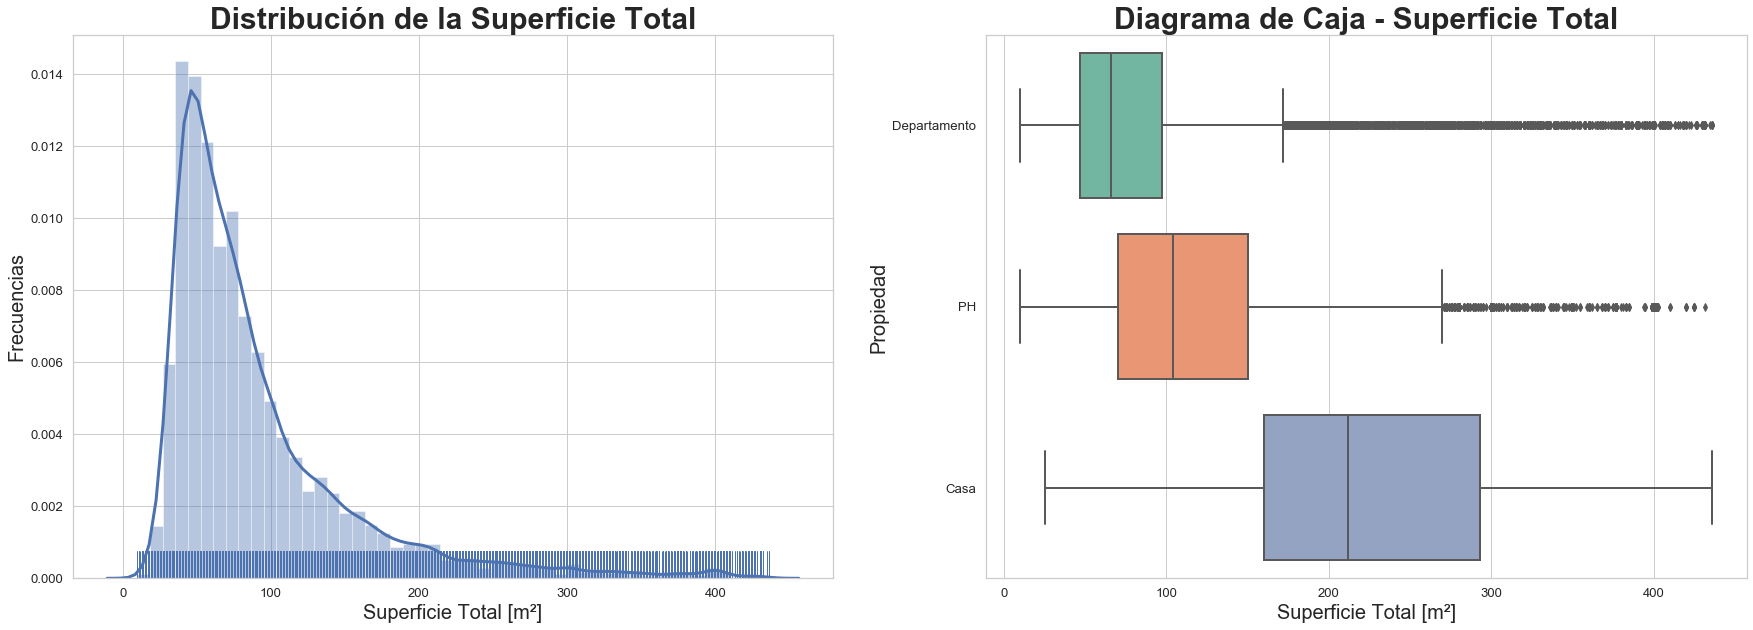

In [33]:

df_RegProp_filtro2 = df_filtro_RegProp[(df_filtro_RegProp.surface_total >= df_filtro_RegProp.surface_total.min()) & (df_filtro_RegProp.surface_total <= df_filtro_RegProp["surface_total"].quantile(.99))]
df_RegProp_filtro2_prima = df_filtro_RegProp[(df_filtro_RegProp.surface_total <= df_filtro_RegProp["surface_total"].quantile(.99))]

plt.figure(figsize = (30, 10))

plt.subplot(1,2,1)
sns.distplot(df_RegProp_filtro2['surface_total'], rug=True,kde=True, kde_kws={"lw": 3})
plt.ylabel('Frecuencias',fontsize=20)
plt.xlabel('Superficie Total [m²]',fontsize=20)
plt.title('Distribución de la Superficie Total', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

plt.subplot(1,2,2)
sns.boxplot(data=df_RegProp_filtro2, x='surface_total', y='property_type', linewidth=2, palette="Set2")
plt.ylabel('Propiedad',fontsize=20)
plt.xlabel('Superficie Total [m²]',fontsize=20)
plt.title('Diagrama de Caja - Superficie Total', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

#eligo el segundo grafico. Por lo tanto, el dataset df_RegProp_filtro2.

En las imágenes de arriba se obseva cómo se mantiene la distribución tomando como valor extremo superior al quantil 99 (superficie total de 436 m<sup>2</sup>). La forma de la distribución y del diagrama de caja (o boxplot) se mantienen. Se consideran más instancias (propiedades). Esto implica que la media de cada tipo de propiedad cambie, al igual que la concentración de los valores típicos de superficie total para cada tipo de propiedad. En este caso, los departamentos tienen entre 50 y 100 m<sup>2</sup>, los PHs tienen entre 60 y 150 m<sup>2</sup> y las casas, entre 160 y 300 m<sup>2</sup>.

In [34]:
df_RegProp_filtro2.shape

(76193, 19)

## C. INCONSISTENCIA ENTRE VALORES DE "surface_covered" y "surface_total"

In [35]:
 #Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.

#Trabajando con el filtro inicial df_filtro_RegProp:

inconsistencia1 = df_filtro_RegProp.surface_covered > df_filtro_RegProp.surface_total 
print(inconsistencia1.value_counts())


#Trabajando con el filtro realizado para eliminar atipicos de la variable surface_total "df_RegProp_filtro2":

inconsistencia2 = df_RegProp_filtro2.surface_covered > df_RegProp_filtro2.surface_total 

print(inconsistencia2.value_counts()) 


df_RegProp_filtro3 = df_RegProp_filtro2[~(df_RegProp_filtro2.surface_covered > df_RegProp_filtro2.surface_total)]
df_filtro_RegProp_filtro2 = df_filtro_RegProp[~(df_filtro_RegProp.surface_covered > df_filtro_RegProp.surface_total)]


False    76214
True       747
dtype: int64
False    75454
True       739
dtype: int64


In [36]:
df_RegProp_filtro3.shape

(75454, 19)

In [37]:
df_filtro_RegProp_filtro2.shape

(76214, 19)

In [38]:
df_RegProp_filtro3.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5  2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   

                l2             l3  rooms  bedrooms  bathrooms  surface_total  \
0  Capital Federal  San Cristobal    7.0       7.0        2.0          140.0   
1  Capital Federal          Boedo    2.0       1.0        2.0           70.0   
2  Capital Federal        Palermo    2.0       1.0        1.0           45.0   
3  Capital Federal        Palermo    2.0       1.0        1.0           85.0   
5  Capital Federal   Villa Crespo    2.0       1.0        1.0           56.0   

   surface_covered     price currency  \
0            140.0  153000.0      USD   
1             58.0  159000.0      USD   
2             45.0  125000.0      USD   
3             50.0  295000.0      USD   
5             56.0  150000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5  Depto.tipo casa de 2 ambientes en Venta en Vil...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5  Excelente ph solo 2 unidades, no paga expensas...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
5          Venta

## D. VALORES MÍNIMOS DE "surface_total"

Por otro lado, se deben analizar las propiedades de superficie mínima. La mínima suerficie de una propiedad es de 10 m2. Según el Código de Edificación de la ley 6100 de la Ciudad de Buenos Aires, "en el caso de conformar vivienda mínima, esta debe contar, con los siguientes locales:
i. Estar - comedor - dormitorio - cocina; ii. Baño 2º". Esto significa que la supeficie mínima es de 20,5 m2. 

In [39]:
print(df_RegProp_filtro3.loc[df_RegProp_filtro3.surface_total.idxmin()])

start_date                                                2019-08-08
end_date                                                  9999-12-31
created_on                                                2019-08-08
lat                                                         -34.5519
lon                                                         -58.4612
l1                                                         Argentina
l2                                                   Capital Federal
l3                                                          Belgrano
rooms                                                              1
bedrooms                                                           1
bathrooms                                                          1
surface_total                                                     13
surface_covered                                                   13
price                                                          39000
currency                          

Luego de eliminar las propiedades cuya superficie cubierta era mayor que la superficie total, se observa la propiedad de mínima superficie total. Leyendo la descripción, se trata de una cochera. Por ende es un dato mal cargado, ya que se están analizando departamentos, PHs, y casas. Si se revisa cuántas propiedades están por debajo de la superficie mínima establecida por ley, se observa que hay 145 propiedades por debajo de los 20,5 m2 establecidos. Por lo tanto, se plantea un filtro para eliminar estos valores, los cuales representan el 0,18 % del dataset.

In [40]:
Menor_a20coma5=df_RegProp_filtro3[(df_RegProp_filtro3.surface_total<=20.5)]

print(df_RegProp_filtro3.shape)
print(Menor_a20coma5.surface_total.value_counts())
print(len(Menor_a20coma5))
print((len(Menor_a20coma5)/len(df_RegProp_filtro3))*100)


(75454, 19)
20.0    63
18.0    18
19.0    12
17.0    11
16.0     8
13.0     6
15.0     6
14.0     4
Name: surface_total, dtype: int64
128
0.16963978052853393


In [41]:
df_RegProp_filtro4 = df_RegProp_filtro3[~(df_RegProp_filtro3.surface_total<=20.5)]
df_RegProp_filtro4.shape

(75326, 19)

Text(0.5, 1.0, 'Diagrama de Caja - Superficie Total')

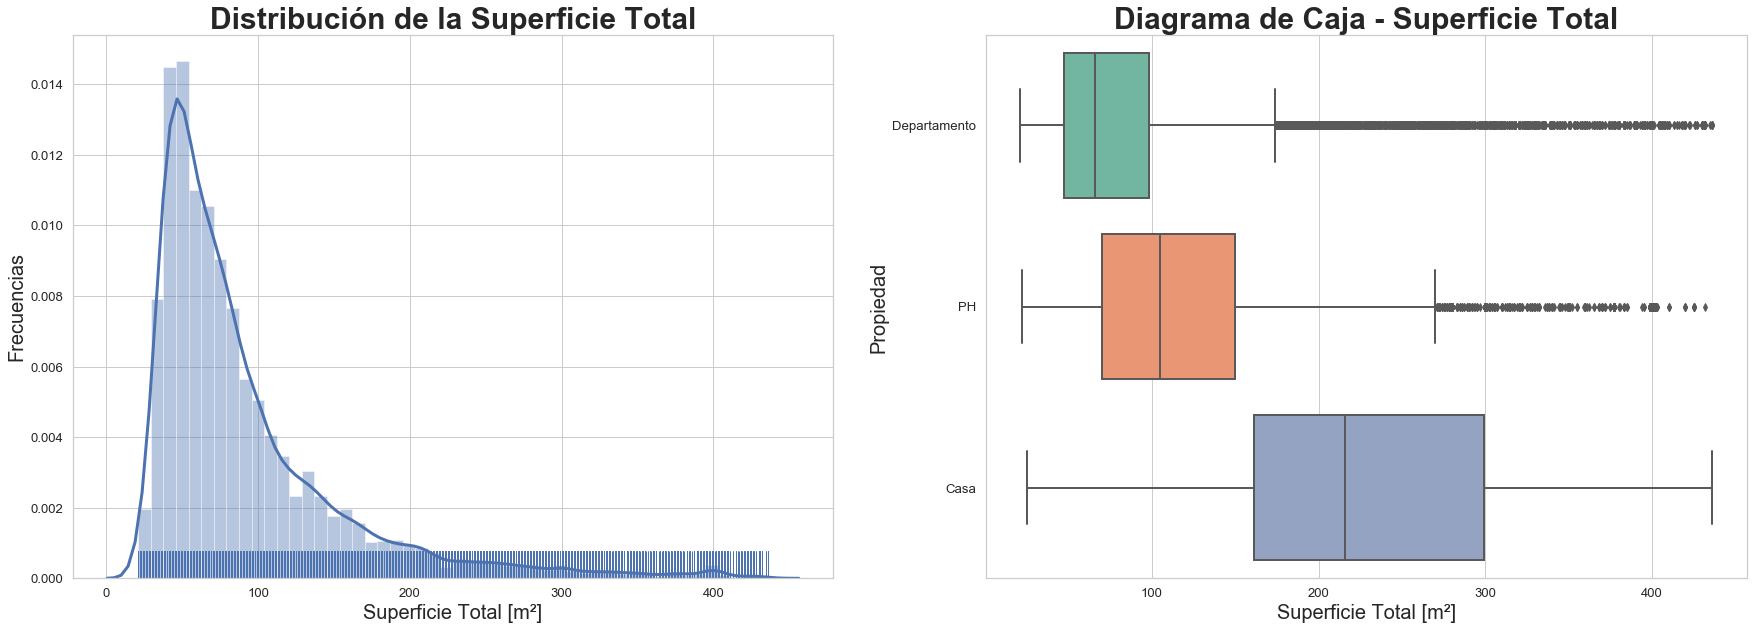

In [42]:
plt.figure(figsize = (30, 10))

plt.subplot(1,2,1)
sns.distplot(df_RegProp_filtro4['surface_total'], rug=True,kde=True, kde_kws={"lw": 3})
plt.ylabel('Frecuencias',fontsize=20)
plt.xlabel('Superficie Total [m²]',fontsize=20)
plt.title('Distribución de la Superficie Total', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

plt.subplot(1,2,2)
sns.boxplot(data=df_RegProp_filtro4, x='surface_total', y='property_type', linewidth=2, palette="Set2")
plt.ylabel('Propiedad',fontsize=20)
plt.xlabel('Superficie Total [m²]',fontsize=20)
plt.title('Diagrama de Caja - Superficie Total', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

En el gráfico anterior se observa que la superficie total mínima es 20,5 m<sup>2</sup>, debido al filtro descripto y realizado previamente. Se mantiene la distribución y la concentración de los valores típicos en cada tipo de propiedad. Los departamentos tienen entre 50 y 100 m<sup>2</sup>, los PHs tienen entre 60 y 150 m<sup>2</sup> y las casas, entre 160 y 300 m<sup>2</sup>.

## E. ANÁLISIS DE LA VARIABLE "price"

Text(0.5, 1.0, 'Diagrama de Caja - Precio [US$]')

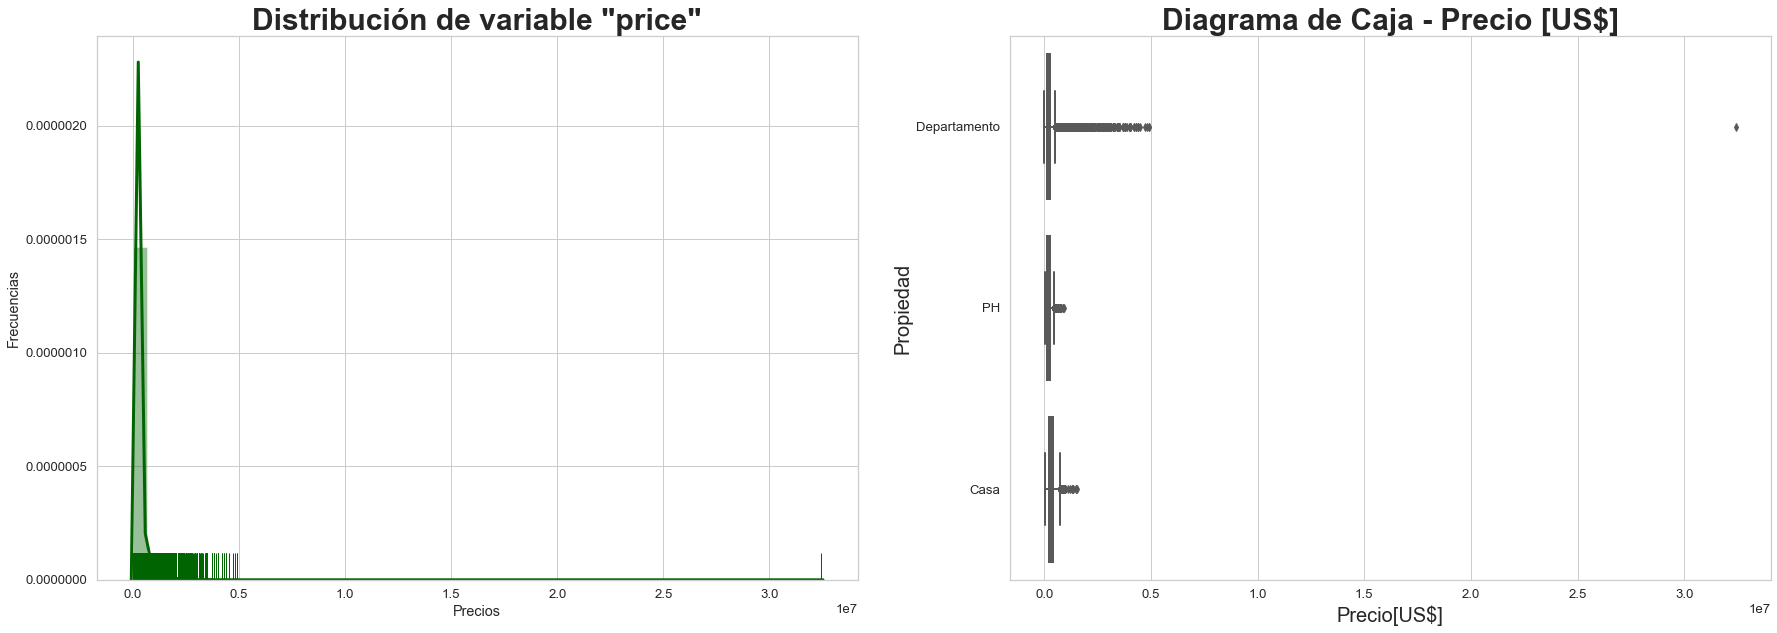

In [43]:
# E. El rango de precios que toman las propiedades es muy amplio.
# Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonabl.


plt.figure(figsize=(30,10))

plt.subplot(1,2,1)

sns.distplot(df_RegProp_filtro4['price'], rug=True,kde=True, kde_kws={"lw": 3}, color='darkgreen')
plt.ylabel('Frecuencias')
plt.xlabel('Precios')
plt.title('Distribución de variable "price"', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

plt.subplot(1,2,2)
sns.boxplot(data=df_RegProp_filtro4, x='price', y='property_type', linewidth=2, palette="Set2")
plt.ylabel('Propiedad',fontsize=20)
plt.xlabel('Precio[US$]',fontsize=20)
plt.title('Diagrama de Caja - Precio [US$]', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

Al representar el histograma y el boxplot de la variable precio desde un primer momento, se observa la dificultad para conocer la distribución de este atributo. Para mejorar la visualización se calculan los valores atípicos considerando quartiles. De ser necesario se considerará el quantil 99, como se hizo anteriormente.

In [44]:
# Se calculan los quartiles Q1 y Q3 para obtener el IQR:

Q1 = df_RegProp_filtro4["price"].quantile(.25)
Q3 = df_RegProp_filtro4["price"].quantile(.75)
print(f'Quartil 1: {Q1} ; Quartil 3: {Q3}')

IQR = Q3 - Q1

#Se obtienen los valores atipicos leves:

price_atipico_leve_min = Q1 - 1.5 * IQR
price_atipico_leve_max = Q3 + 1.5 * IQR

#Se obtienen los valores atipicos extremos:

price_atipico_extr_min = Q1 - 3 * IQR
price_atipico_extr_max = Q3 + 3 * IQR

# Se identifican los valores mínimos y maááximos del precio de las propiedades analizadas:

precio_min=df_RegProp_filtro4.price.min()
precio_max=df_RegProp_filtro4.price.max()
print(f'Precio mínimo: {precio_min} ; Precio máximo: {precio_max}')

#Se imprimen valores atipicos:

print(f'Valor atipico leve mínimo: {price_atipico_leve_min} ; Valor atipico leve máximo: {price_atipico_leve_max}')
print(f'Valor atipico extremo mínimo: {price_atipico_extr_min} ; Valor atipico extremo máximo: {price_atipico_extr_max}')

#Se obtiene el quantil 99; analizarlo como criterio para filtar valores atipicos:

prop_price_mas_99por100 = df_RegProp_filtro4.surface_total>df_RegProp_filtro4["price"].quantile(.99)
print(prop_price_mas_99por100.value_counts())

Quartil 1: 124500.0 ; Quartil 3: 273000.0
Precio mínimo: 6000.0 ; Precio máximo: 32434232.0
Valor atipico leve mínimo: -98250.0 ; Valor atipico leve máximo: 495750.0
Valor atipico extremo mínimo: -321000.0 ; Valor atipico extremo máximo: 718500.0
False    75326
Name: surface_total, dtype: int64


In [45]:
print(df_RegProp_filtro4.loc[df_RegProp_filtro4.price.idxmin()]) 
print(df_RegProp_filtro4.loc[df_RegProp_filtro4.price.idxmax()])

start_date                                                2019-03-28
end_date                                                  2019-03-30
created_on                                                2019-03-28
lat                                                          -34.582
lon                                                         -58.4017
l1                                                         Argentina
l2                                                   Capital Federal
l3                                                           Palermo
rooms                                                              5
bedrooms                                                           4
bathrooms                                                          4
surface_total                                                    340
surface_covered                                                  320
price                                                           6000
currency                          

Text(0.5, 1.0, 'Diagrama de Caja - Precio [US$]')

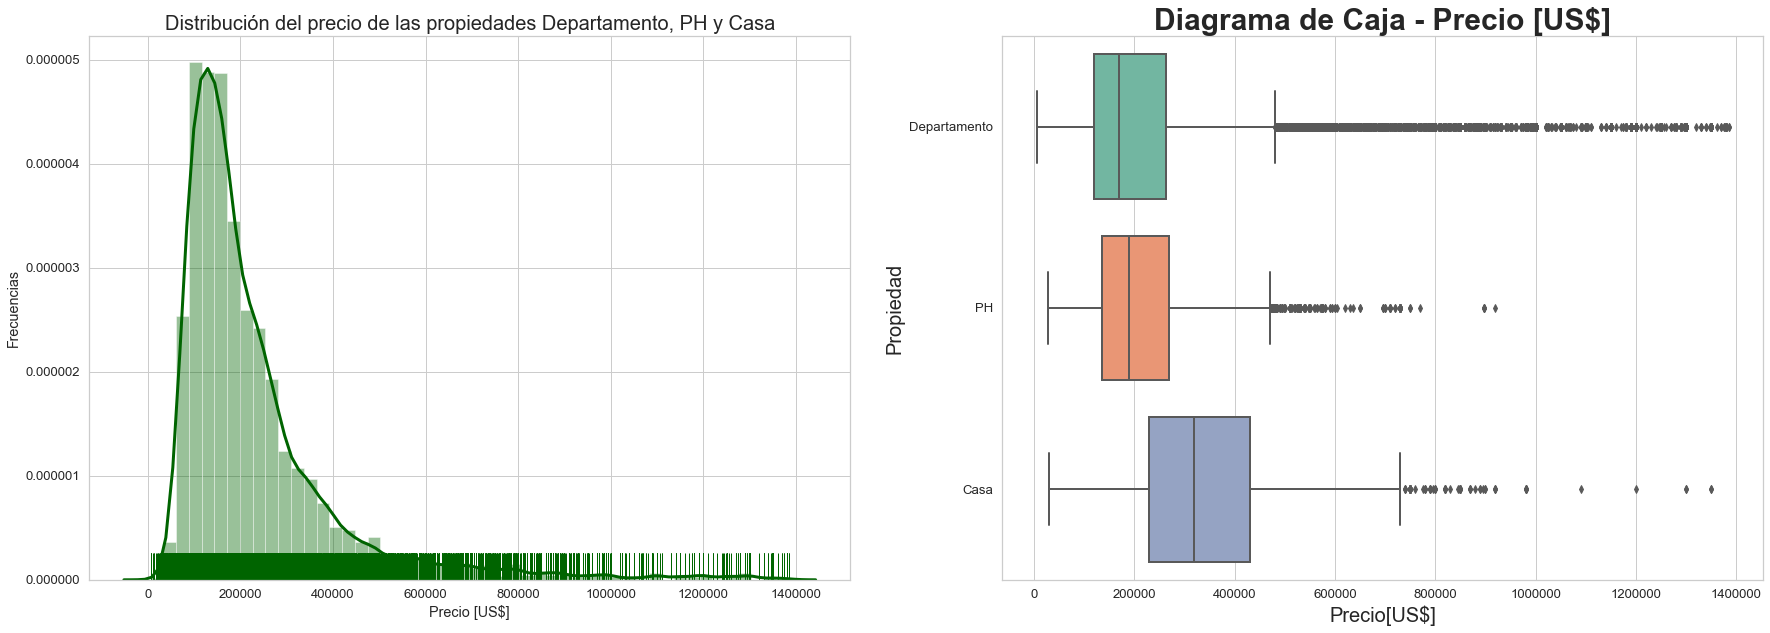

In [46]:
#Se filtra el dataframe para mejorar la visualizacion de la distribucion 'price'.

df_RegProp_filtro5 = df_RegProp_filtro4[(df_RegProp_filtro4.price < df_RegProp_filtro4["price"].quantile(.99))]

plt.figure(figsize=(30,10))

plt.subplot(1,2,1)

sns.distplot(df_RegProp_filtro5['price'], rug=True,kde=True, kde_kws={"lw": 3}, color='darkgreen')
plt.ylabel('Frecuencias')
plt.xlabel('Precio [US$]')
plt.title('Distribución del precio de las propiedades Departamento, PH y Casa', fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(data=df_RegProp_filtro5, x='price', y='property_type', linewidth=2, palette="Set2")
plt.ylabel('Propiedad',fontsize=20)
plt.xlabel('Precio[US$]',fontsize=20)
plt.title('Diagrama de Caja - Precio [US$]', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

En el gráfico anterior se visualiza mejor la distribución del atributo "price". Además, en el boxplot se representa de mejor manera la concetración de los valores típicos de los departamentos, PHs y casas. Los departamentos y los PHs oscilan entre los USD 100.000 y los USD 250.000 de precio de venta. Las casas, por otro lado, rondan entre los USD 200.000 y los USD 450.000.

## F. PAIRPLOT DE VARIABLES ANALIZADAS

In [47]:
df_RegProp_filtro5.shape

(74551, 19)

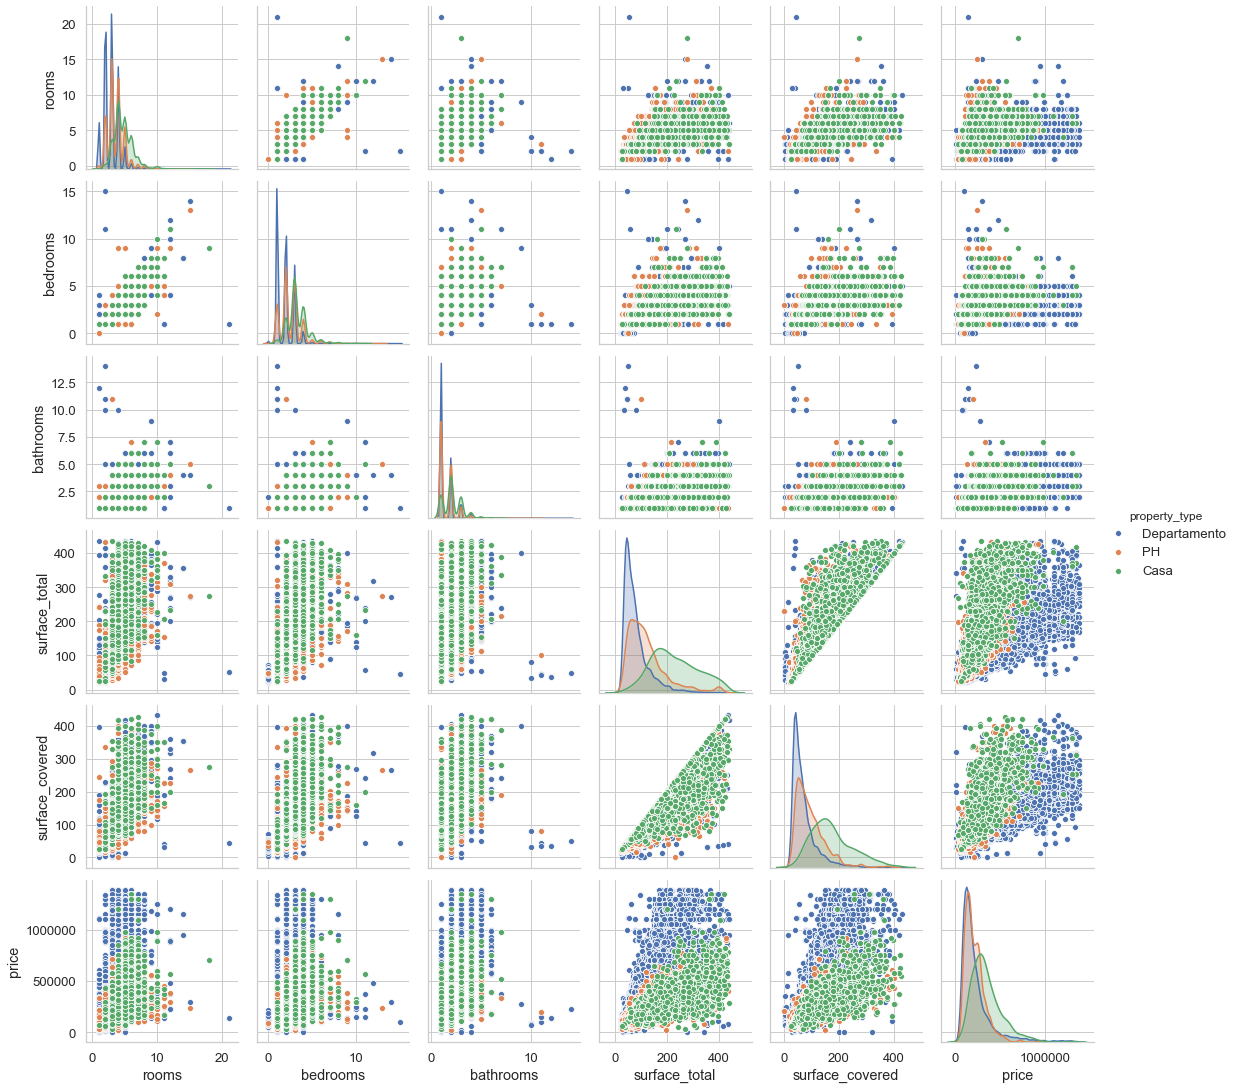

In [48]:
# F. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.
sns.pairplot(df_RegProp_filtro5, hue="property_type", vars=["rooms", "bedrooms", "bathrooms","surface_total", "surface_covered", "price"])
plt.savefig("Pairplot_An1_Proyecto1.png")

<p style='text-align: justify'>Una vez filtrado el dataset, se realiza un pairplot (gráfico de arriba) para conocer cómo es la relación entre variables de a pares. En la diagonal del pairplot, se observan las distribuciones para cada atributo por tipo de propiedad: rooms, bedrooms, bathrooms, surface_total, surface_covered y price. Se puede observa cierta linealidad entre rooms y bedrooms. También se observa que en la relación surface_covered vs. surface_total no hay propiedades donde la superficie cubierta sea mayor a la total.

<p style='text-align: justify'>Algo interesante es observar la relación de cada atributo con el precio. Esto es clave para conocer si los atributos observados son buenos para predecir el precio de venta de una propiedad. Tanto rooms como bedrooms y bathrooms se comportan de manera parecida frente al precio. Esto mismo ocurre con surfce_total y surface_covered. Tienen un comportamiento similar con el precio.

Para aclarar esto, se analizan las correlaciones de las variables consideradas.

Text(0.5, 1.0, 'Relación superficie total vs. precio')

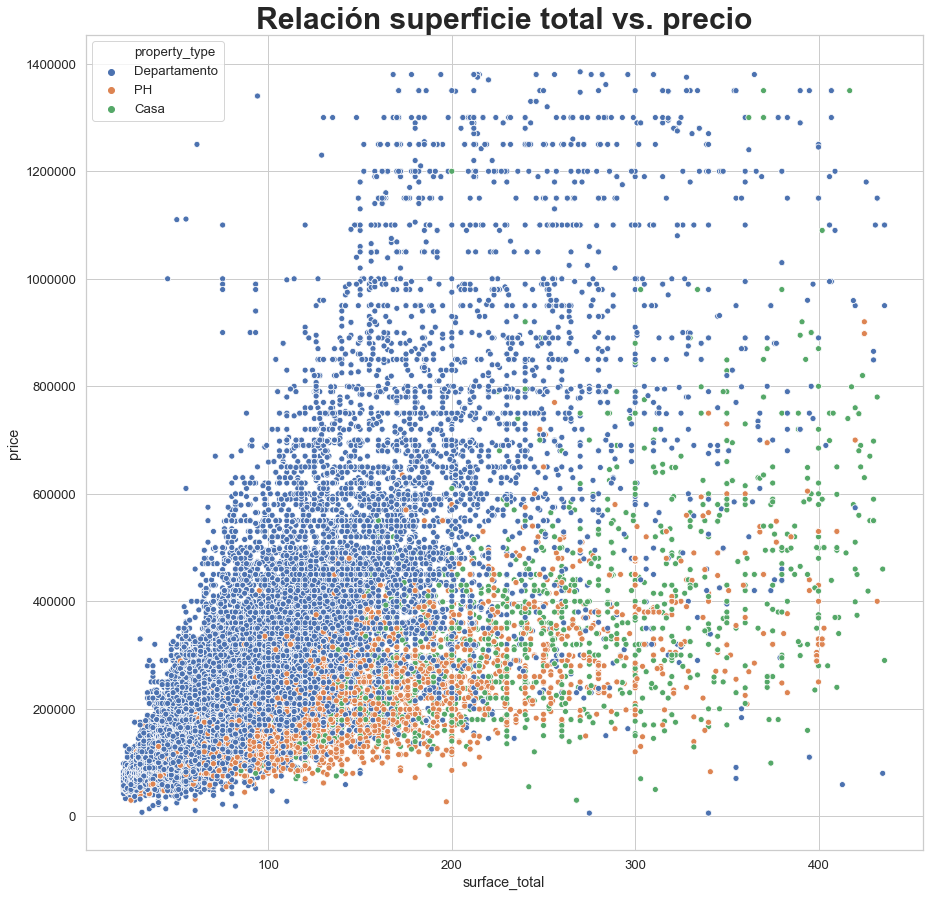

In [49]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="surface_total", y="price", hue="property_type" , data=df_RegProp_filtro5)
plt.title('Relación superficie total vs. precio', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

<p style='text-align: justify'>En el gráfico anterior se destaca la relación entre la superficie total y el precio. Se destaca esta relación ya que es la superficie total posee una relación fuerte con el precio. Esto se deduce al analizar el pairplot y al conocer el negocio, en términos generales. Se observa el predomino de la publicación de departamentos por encima del resto de la propiedades. Además se observa  cierta linealidad entre la superficie total y el precio.

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

## CORRELACIONES

In [50]:
df_RegProp_filtro5.drop(columns=['lat', 'lon']).corr()

rooms  bedrooms  bathrooms  surface_total  \
rooms            1.000000  0.929638   0.581736       0.742255   
bedrooms         0.929638  1.000000   0.583061       0.715587   
bathrooms        0.581736  0.583061   1.000000       0.624051   
surface_total    0.742255  0.715587   0.624051       1.000000   
surface_covered  0.784523  0.755311   0.672389       0.930057   
price            0.547512  0.511358   0.659238       0.704565   

                 surface_covered     price  
rooms                   0.784523  0.547512  
bedrooms                0.755311  0.511358  
bathrooms               0.672389  0.659238  
surface_total           0.930057  0.704565  
surface_covered         1.000000  0.762566  
price                   0.762566  1.000000

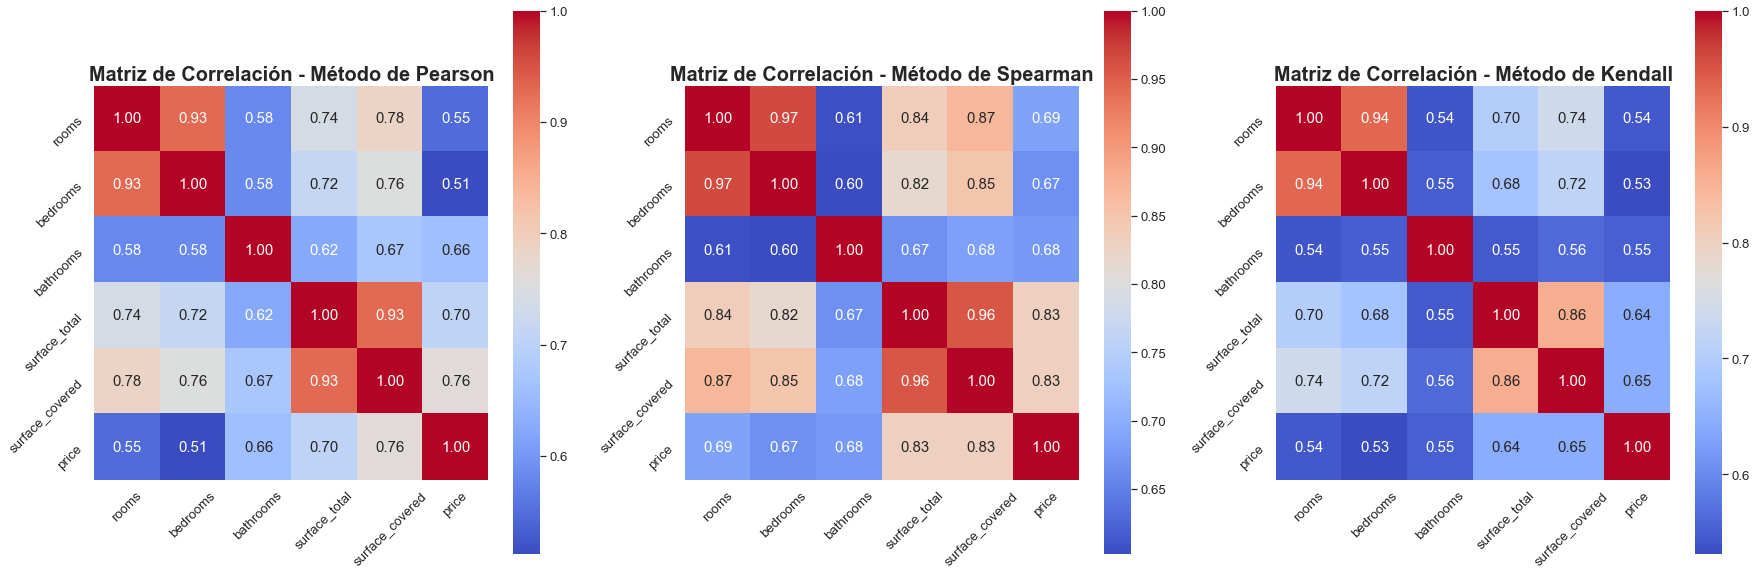

In [71]:
corr = df_RegProp_filtro5.drop(columns=['lat', 'lon']).corr()
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= 'auto', 
           yticklabels= 'auto',
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Matriz de Correlación - Método de Pearson', fontsize=20, fontweight='bold', fontstretch='semi-expanded')
plt.savefig("Corr_An1_Proyecto1.png")

corr_nolineal = df_RegProp_filtro5.drop(columns=['lat', 'lon']).corr(method='spearman')
plt.subplot(1,3,2)
sns.heatmap(corr_nolineal, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= 'auto', 
           yticklabels= 'auto',
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Matriz de Correlación - Método de Spearman', fontsize=20, fontweight='bold', fontstretch='semi-expanded')
plt.savefig("Corr_An1_Proyecto1.png")

corr_nolineal2 = df_RegProp_filtro5.drop(columns=['lat', 'lon']).corr(method='kendall')
plt.subplot(1,3,3)
sns.heatmap(corr_nolineal2, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= 'auto', 
           yticklabels= 'auto',
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Matriz de Correlación - Método de Kendall', fontsize=20, fontweight='bold', fontstretch='semi-expanded')
plt.savefig("Corr_An1_Proyecto1.png")

plt.show()

¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Observando la matriz de correlación de la imagen anterior y siendo la correlación de Pearson el método utilizado, se deduce que hay una correlación mayor a 0,7 entre superficie total y el precio, y la superficie cubierta y el precio. Si se utiliza el método de Spearman, se observa que la correlacion entre superficies y precio es alta. Al usar el método de Pearson, se confirma que la relacion tiende a ser lineal positiva.

Si se analiza la correlación según el tipo de propiedad, se obtienen los siguientes mapa de calor que identifica el grado de correlación entre variables según sea departamento, casa o PH.

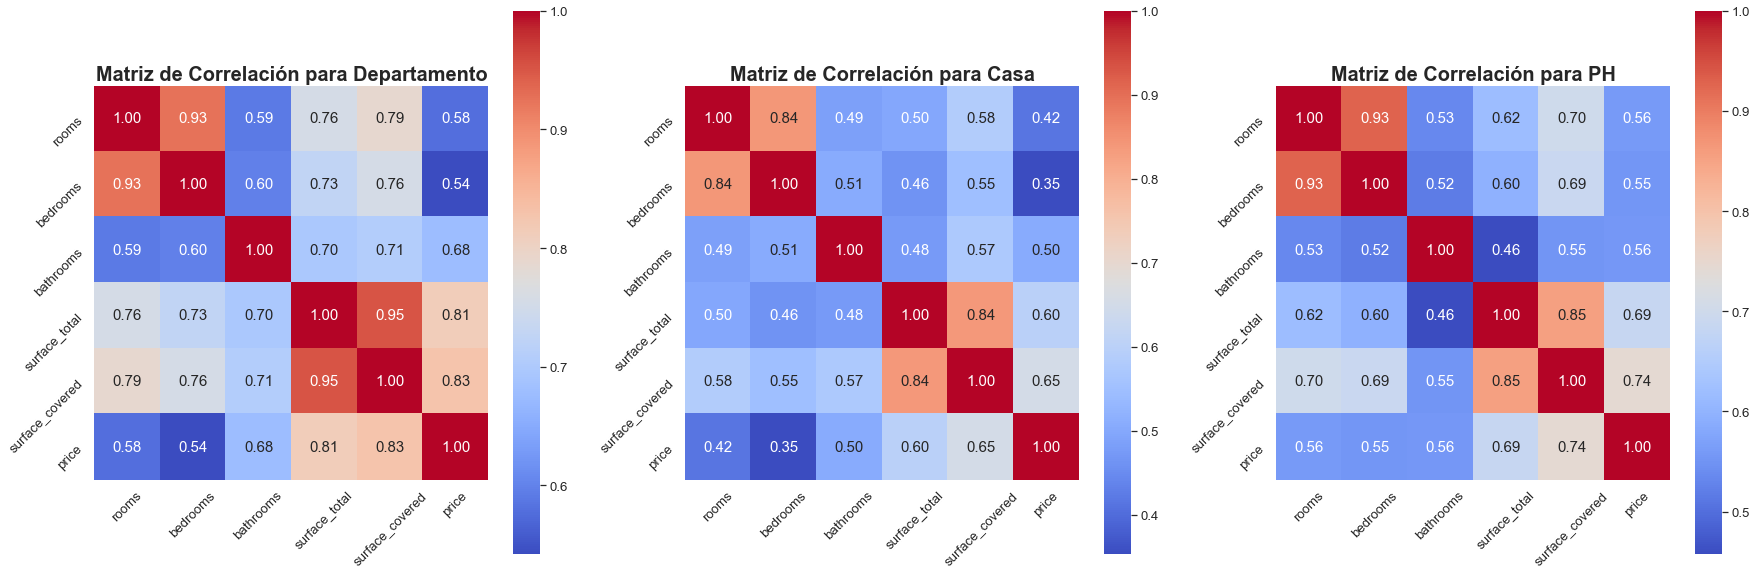

<Figure size 432x288 with 0 Axes>

In [52]:
#Segun cada tipo de propiedad:

df_RegProp_filtro5_Dpto = df_RegProp_filtro5[df_RegProp_filtro5.property_type=='Departamento']
df_RegProp_filtro5_PH = df_RegProp_filtro5[df_RegProp_filtro5.property_type=='PH']
df_RegProp_filtro5_Casa = df_RegProp_filtro5[df_RegProp_filtro5.property_type=='Casa']


corr_Dpto = df_RegProp_filtro5_Dpto.drop(columns=['lat', 'lon']).corr()
corr_Casa = df_RegProp_filtro5_Casa.drop(columns=['lat', 'lon']).corr()
corr_PH = df_RegProp_filtro5_PH.drop(columns=['lat', 'lon']).corr()



plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
sns.heatmap(corr_Dpto, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= 'auto', 
           yticklabels= 'auto',
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Matriz de Correlación para Departamento', fontsize=20, fontweight='bold', fontstretch='semi-expanded')


plt.subplot(1,3,2)

sns.heatmap(corr_Casa, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= 'auto', 
           yticklabels= 'auto',
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Matriz de Correlación para Casa', fontsize=20, fontweight='bold', fontstretch='semi-expanded')

plt.subplot(1,3,3)
sns.heatmap(corr_PH, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= 'auto', 
           yticklabels= 'auto',
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Matriz de Correlación para PH', fontsize=20, fontweight='bold', fontstretch='semi-expanded')

plt.show()
plt.savefig("CorrPearsonxProp_An1_Proyecto1.png")



Esta correlación (relación lineal por tratarse del método de Pearson) es mayor cuando se trata de departamentos y es menor cuando se trata de casas. Se prodría decir que hay un relación lineal positiva alta entre estas variables (superficie y precio). 

En conclusión, es evidente que de las variables analizadas, la más adecuada para estimar el precio de una propiedad es la superficie total o cubierta.

### 2.1 Desafío

### PROPUESTA

Teniendo en cuenta el daataset de la inmobiliaria, me planteo las siguientes preguntas: 

* ¿Cuáles son los barrios más caros? ¿Y los más baratos? ¿Qué propiedades ofrecen cada barrio y cómo está compuesta?
* ¿Se puede estimar cuánto ha variado el precio de un departamento en los últimos años?


## ¿Cuáles son los barrios más caros? ¿Y los más baratos? ¿Qué propiedades ofrecen cada barrio y cómo está compuesta?

Para estimar los barrios más caros y más baratos se tiene en cuenta el precio del m<sup>2</sup> de una propiedad, el cual se calcula considerando la superficie total de cada propiedad (cada instancia). Además, para cada barrio se determina el valor medio de dicho m<sup>2</sup> para tener un precio de referencia por barrio de la Ciudad de Buenos Aires. Finalmente, se representa toda la información procesada en un gráfico de barras.

In [53]:
# En el nuevo dataset, luego de los fitros realizados, se tiene la siguiente información.

df_RegProp_filtro5

start_date    end_date  created_on        lat        lon         l1  \
0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5       2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   
...            ...         ...         ...        ...        ...        ...   
146553  2019-07-31  2020-01-17  2019-07-31 -34.581308 -58.431236  Argentina   
146554  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146555  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146556  2019-07-31  2020-01-17  2019-07-31 -34.584134 -58.436389  Argentina   
146557  2019-07-31  2019-08-23  2019-07-31 -34.583995 -58.417645  Argentina   

                     l2             l3  rooms  bedrooms  bathrooms  \
0       Capital Federal  San Cristobal    7.0       7.0        2.0   
1       Capital Federal          Boedo    2.0       1.0        2.0   
2       Capital Federal        Palermo    2.0       1.0        1.0   
3       Capital Federal        Palermo    2.0       1.0        1.0   
5       Capital Federal   Villa Crespo    2.0       1.0        1.0   
...                 ...            ...    ...       ...        ...   
146553  Capital Federal        Palermo    4.0       3.0        2.0   
146554  Capital Federal        Palermo    4.0       3.0        3.0   
146555  Capital Federal        Palermo    3.0       2.0        2.0   
146556  Capital Federal        Palermo    4.0       2.0        2.0   
146557  Capital Federal        Palermo    3.0       2.0        2.0   

        surface_total  surface_covered     price currency  \
0               140.0            140.0  153000.0      USD   
1                70.0             58.0  159000.0      USD   
2                45.0             45.0  125000.0      USD   
3                85.0             50.0  295000.0      USD   
5                56.0             56.0  150000.0      USD   
...               ...              ...       ...      ...   
146553          106.0            100.0  620000.0      USD   
146554          175.0            111.0  570000.0      USD   
146555          144.0            134.0  480000.0      USD   
146556          317.0            143.0  530000.0      USD   
146557          145.0            145.0  420000.0      USD   

                                                    title  \
0             ***Venta semipiso centro, ideal hostel*****   
1        Espectacular PH reciclado en Boedo sin expensas.   
2       Depto.tipo casa de 2 ambientes en Venta en Pal...   
3       COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5       Depto.tipo casa de 2 ambientes en Venta en Vil...   
...                                                   ...   
146553          Torre Mirabilia - 4 amb - Piso Alto 106m2   
146554  Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...   
146555  PH Reciclado a nuevo en pleno Palermo Hollywood!    
146556  Hermoso PH reciclado - 4 ambientes + Pileta + ...   
146557  Venta. Departamento. 3 Ambientes. 145m². Ampli...   

                                              description property_type  \
0       DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1        PH reciclado en Boedo a una cuadra de la plaz...            PH   
2       2 ambienets amplio , excelente estado , patio ...            PH   
3       HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5       Excelente ph solo 2 unidades, no paga expensas...            PH   
...                                                   ...           ...   
146553  Living comedor con acceso a Balcón aterrazadoM...  Departamento   
146554  Espectacular Ph 4 Ambientes de excelente calid...            PH   
146555  Espectacular Ph 3 Ambientes de excelente calid...            PH   
14

Previo al análisis, se decide filtrar valores atípicos de habitaciones y dormitorios para limpiar más el dataset. Para eso se consideran los valores atípicos encontrados en el análisis exploratorio de datos de las variables mencionadas. El máximo extremo de "rooms" es 8 habitaciones. El máximo extremo de "bedrooms" es 7 dormitorios.

In [54]:
df_RegProp_f6 = df_RegProp_filtro5[(df_RegProp_filtro5.rooms <= 8) & (df_RegProp_filtro5.bedrooms <= 7)]
print(df_RegProp_f6.shape)

(74425, 19)


In [55]:
df_RegProp_f6['price_per_m2'] = (df_RegProp_f6.price/df_RegProp_f6.surface_total).round(2)
df_RegProp_f6

C:\Users\SMFernandez\.conda\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


start_date    end_date  created_on        lat        lon         l1  \
0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5       2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   
...            ...         ...         ...        ...        ...        ...   
146553  2019-07-31  2020-01-17  2019-07-31 -34.581308 -58.431236  Argentina   
146554  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146555  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146556  2019-07-31  2020-01-17  2019-07-31 -34.584134 -58.436389  Argentina   
146557  2019-07-31  2019-08-23  2019-07-31 -34.583995 -58.417645  Argentina   

                     l2             l3  rooms  bedrooms  bathrooms  \
0       Capital Federal  San Cristobal    7.0       7.0        2.0   
1       Capital Federal          Boedo    2.0       1.0        2.0   
2       Capital Federal        Palermo    2.0       1.0        1.0   
3       Capital Federal        Palermo    2.0       1.0        1.0   
5       Capital Federal   Villa Crespo    2.0       1.0        1.0   
...                 ...            ...    ...       ...        ...   
146553  Capital Federal        Palermo    4.0       3.0        2.0   
146554  Capital Federal        Palermo    4.0       3.0        3.0   
146555  Capital Federal        Palermo    3.0       2.0        2.0   
146556  Capital Federal        Palermo    4.0       2.0        2.0   
146557  Capital Federal        Palermo    3.0       2.0        2.0   

        surface_total  surface_covered     price currency  \
0               140.0            140.0  153000.0      USD   
1                70.0             58.0  159000.0      USD   
2                45.0             45.0  125000.0      USD   
3                85.0             50.0  295000.0      USD   
5                56.0             56.0  150000.0      USD   
...               ...              ...       ...      ...   
146553          106.0            100.0  620000.0      USD   
146554          175.0            111.0  570000.0      USD   
146555          144.0            134.0  480000.0      USD   
146556          317.0            143.0  530000.0      USD   
146557          145.0            145.0  420000.0      USD   

                                                    title  \
0             ***Venta semipiso centro, ideal hostel*****   
1        Espectacular PH reciclado en Boedo sin expensas.   
2       Depto.tipo casa de 2 ambientes en Venta en Pal...   
3       COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5       Depto.tipo casa de 2 ambientes en Venta en Vil...   
...                                                   ...   
146553          Torre Mirabilia - 4 amb - Piso Alto 106m2   
146554  Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...   
146555  PH Reciclado a nuevo en pleno Palermo Hollywood!    
146556  Hermoso PH reciclado - 4 ambientes + Pileta + ...   
146557  Venta. Departamento. 3 Ambientes. 145m². Ampli...   

                                              description property_type  \
0       DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1        PH reciclado en Boedo a una cuadra de la plaz...            PH   
2       2 ambienets amplio , excelente estado , patio ...            PH   
3       HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5       Excelente ph solo 2 unidades, no paga expensas...            PH   
...                                                   ...           ...   
146553  Living comedor con acceso a Balcón aterrazadoM...  Departamento   
146554  Espectacular Ph 4 Ambientes de excelente calid...            PH   
146555  Espectacular Ph 3 Ambientes de excelente calid...            PH   
14

Se toma el valor medio de precio por m2 de cada barrio.

In [56]:
barrios = df_RegProp_f6.groupby('l3').mean().price_per_m2.sort_values(ascending=False).index
prom_precioxbarrio = df_RegProp_f6.groupby('l3').mean().price_per_m2.sort_values(ascending=False).round(2)

In [57]:
prom_precioxbarrio

l3
Puerto Madero           5617.59
Las Cañitas             3680.00
Palermo                 3340.81
Belgrano                3312.65
Recoleta                3264.96
Nuñez                   3187.66
Barrio Norte            3082.12
Retiro                  2971.78
Coghlan                 2733.84
Villa Urquiza           2728.92
Colegiales              2701.60
Caballito               2533.31
Villa Ortuzar           2464.17
Saavedra                2433.15
Villa Crespo            2428.57
Chacarita               2428.11
Parque Centenario       2421.32
Abasto                  2398.92
Almagro                 2398.83
San Telmo               2338.49
Villa Pueyrredón        2316.46
Centro / Microcentro    2289.14
Villa Devoto            2265.09
San Nicolás             2249.80
Parque Chas             2248.44
Villa del Parque        2247.67
Barracas                2186.78
Agronomía               2186.15
Congreso                2124.30
Tribunales              2073.18
Paternal                2070.64
Villa

0 5617.59
1 3680.0
2 3340.81
3 3312.65
4 3264.96
5 3187.66
6 3082.12
7 2971.78
8 2733.84
9 2728.92
10 2701.6
11 2533.31
12 2464.17
13 2433.15
14 2428.57
15 2428.11
16 2421.32
17 2398.92
18 2398.83
19 2338.49
20 2316.46
21 2289.14
22 2265.09
23 2249.8
24 2248.44
25 2247.67
26 2186.78
27 2186.15
28 2124.3
29 2073.18
30 2070.64
31 2068.57
32 2049.05
33 2040.97
34 2039.02
35 2037.3
36 2037.14
37 2026.57
38 2026.16
39 2013.49
40 2002.42
41 1941.01
42 1934.74
43 1902.52
44 1862.3
45 1831.78
46 1828.87
47 1770.82
48 1759.24
49 1750.16
50 1688.89
51 1633.8
52 1533.18
53 1441.06
54 1239.3
55 1225.4
56 838.18


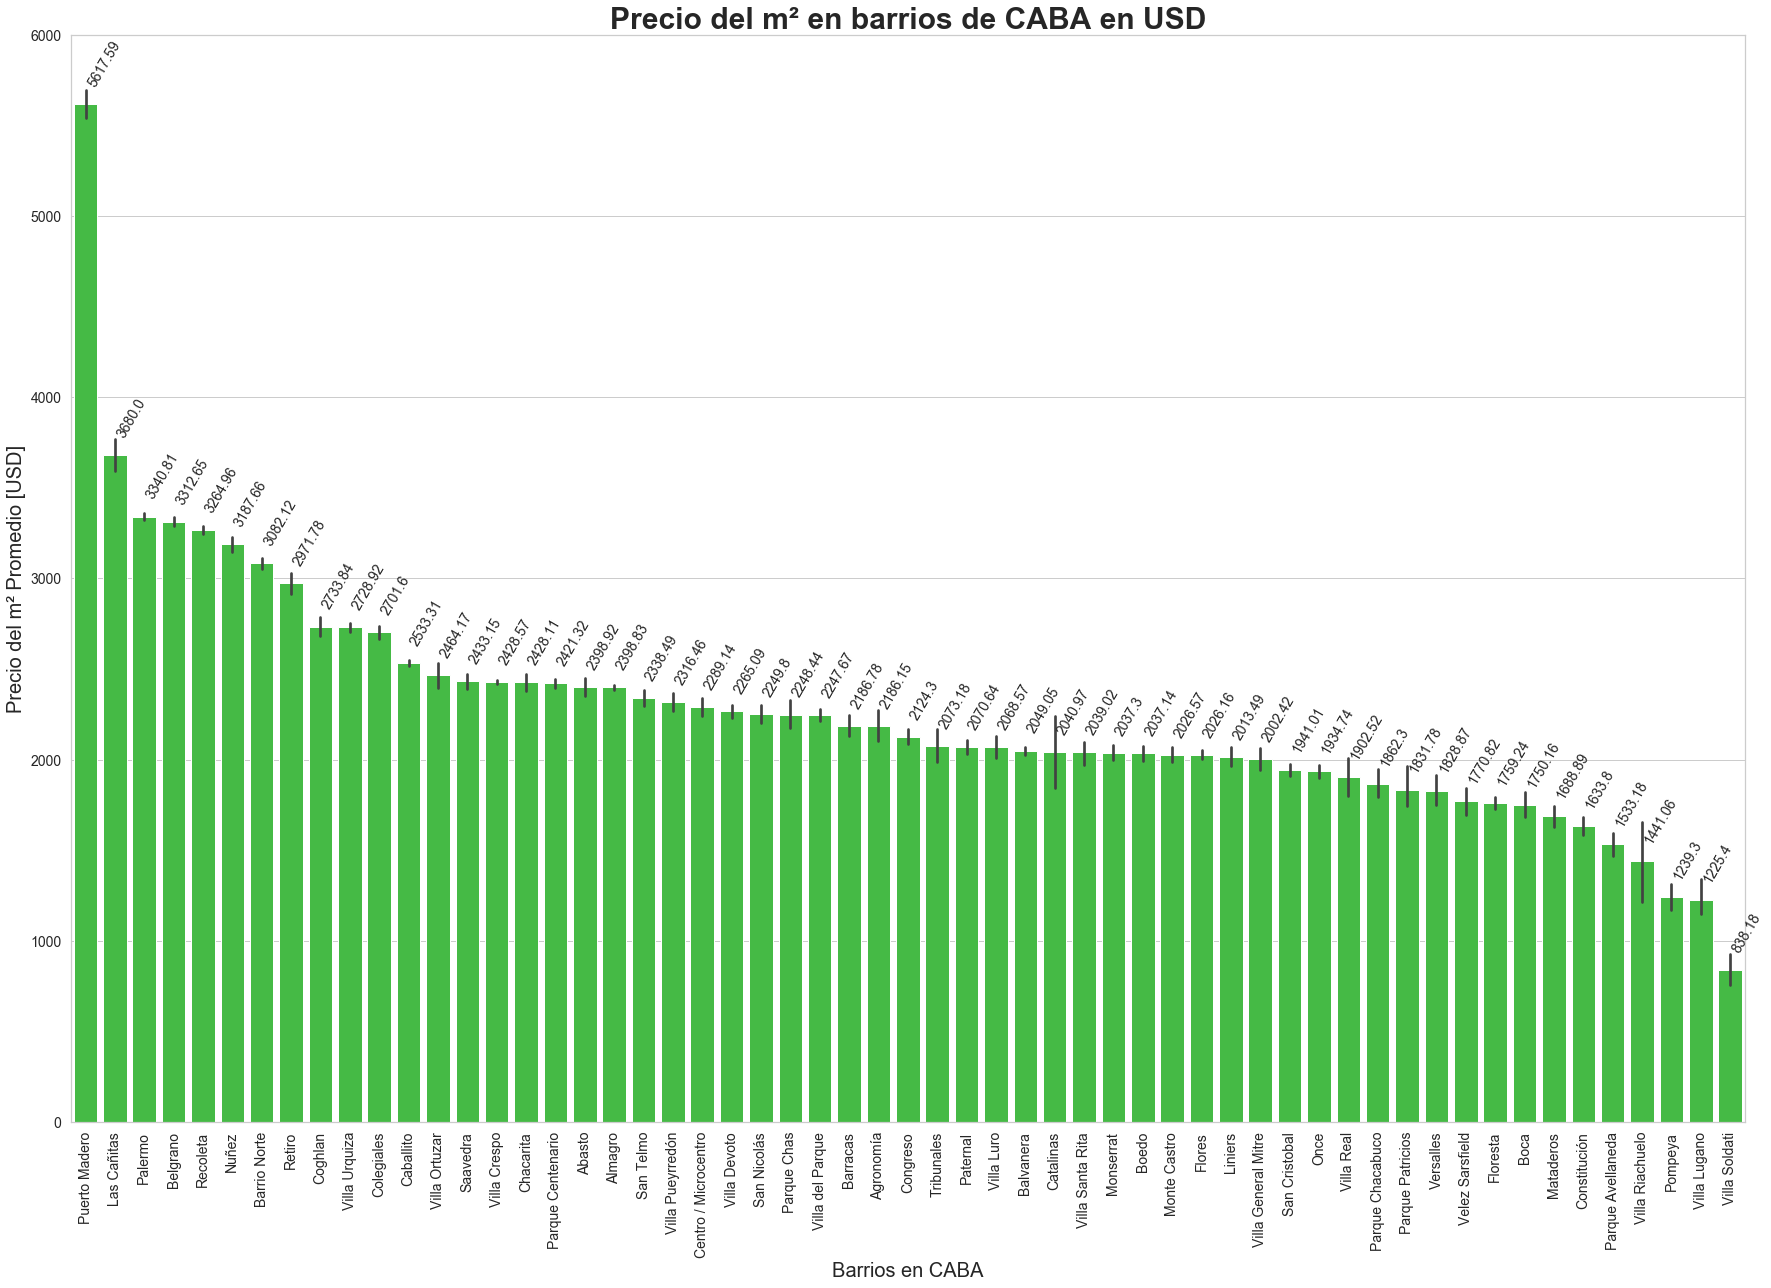

In [58]:
plt.figure(figsize=(30,20))

grafico_precioxbarrio = sns.barplot(x='l3', y='price_per_m2', data=df_RegProp_f6, order= barrios, color='limegreen')
grafico_precioxbarrio.set_xticklabels(grafico_precioxbarrio.get_xticklabels(), rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Precio del m² Promedio [USD]',fontsize=20)
plt.xlabel('Barrios en CABA',fontsize=20)
plt.title('Precio del m² en barrios de CABA en USD', fontsize=30, fontweight='bold', fontstretch='semi-expanded')
plt.ylim(0,6000)
for  pX, pY in enumerate(prom_precioxbarrio):
    plt.annotate(pY, xy=(pX, pY+100), size=14, rotation=60, ha='left')
    print(pX, pY)

En el gráfico anterior se puede observar que el barrio más caro es Puerto Madero, con un promedio de USD 5617 por m<sup>2</sup>. Por otro lado, el barrio más barato es Villa Soldati, con un promedio de USD 838 el m<sup>2</sup>. 

En caso de querer conocer el precio por tipo de propiedad, se plantea una división de los datos según se trate de departamento, casa o PH.

(0, 6000)

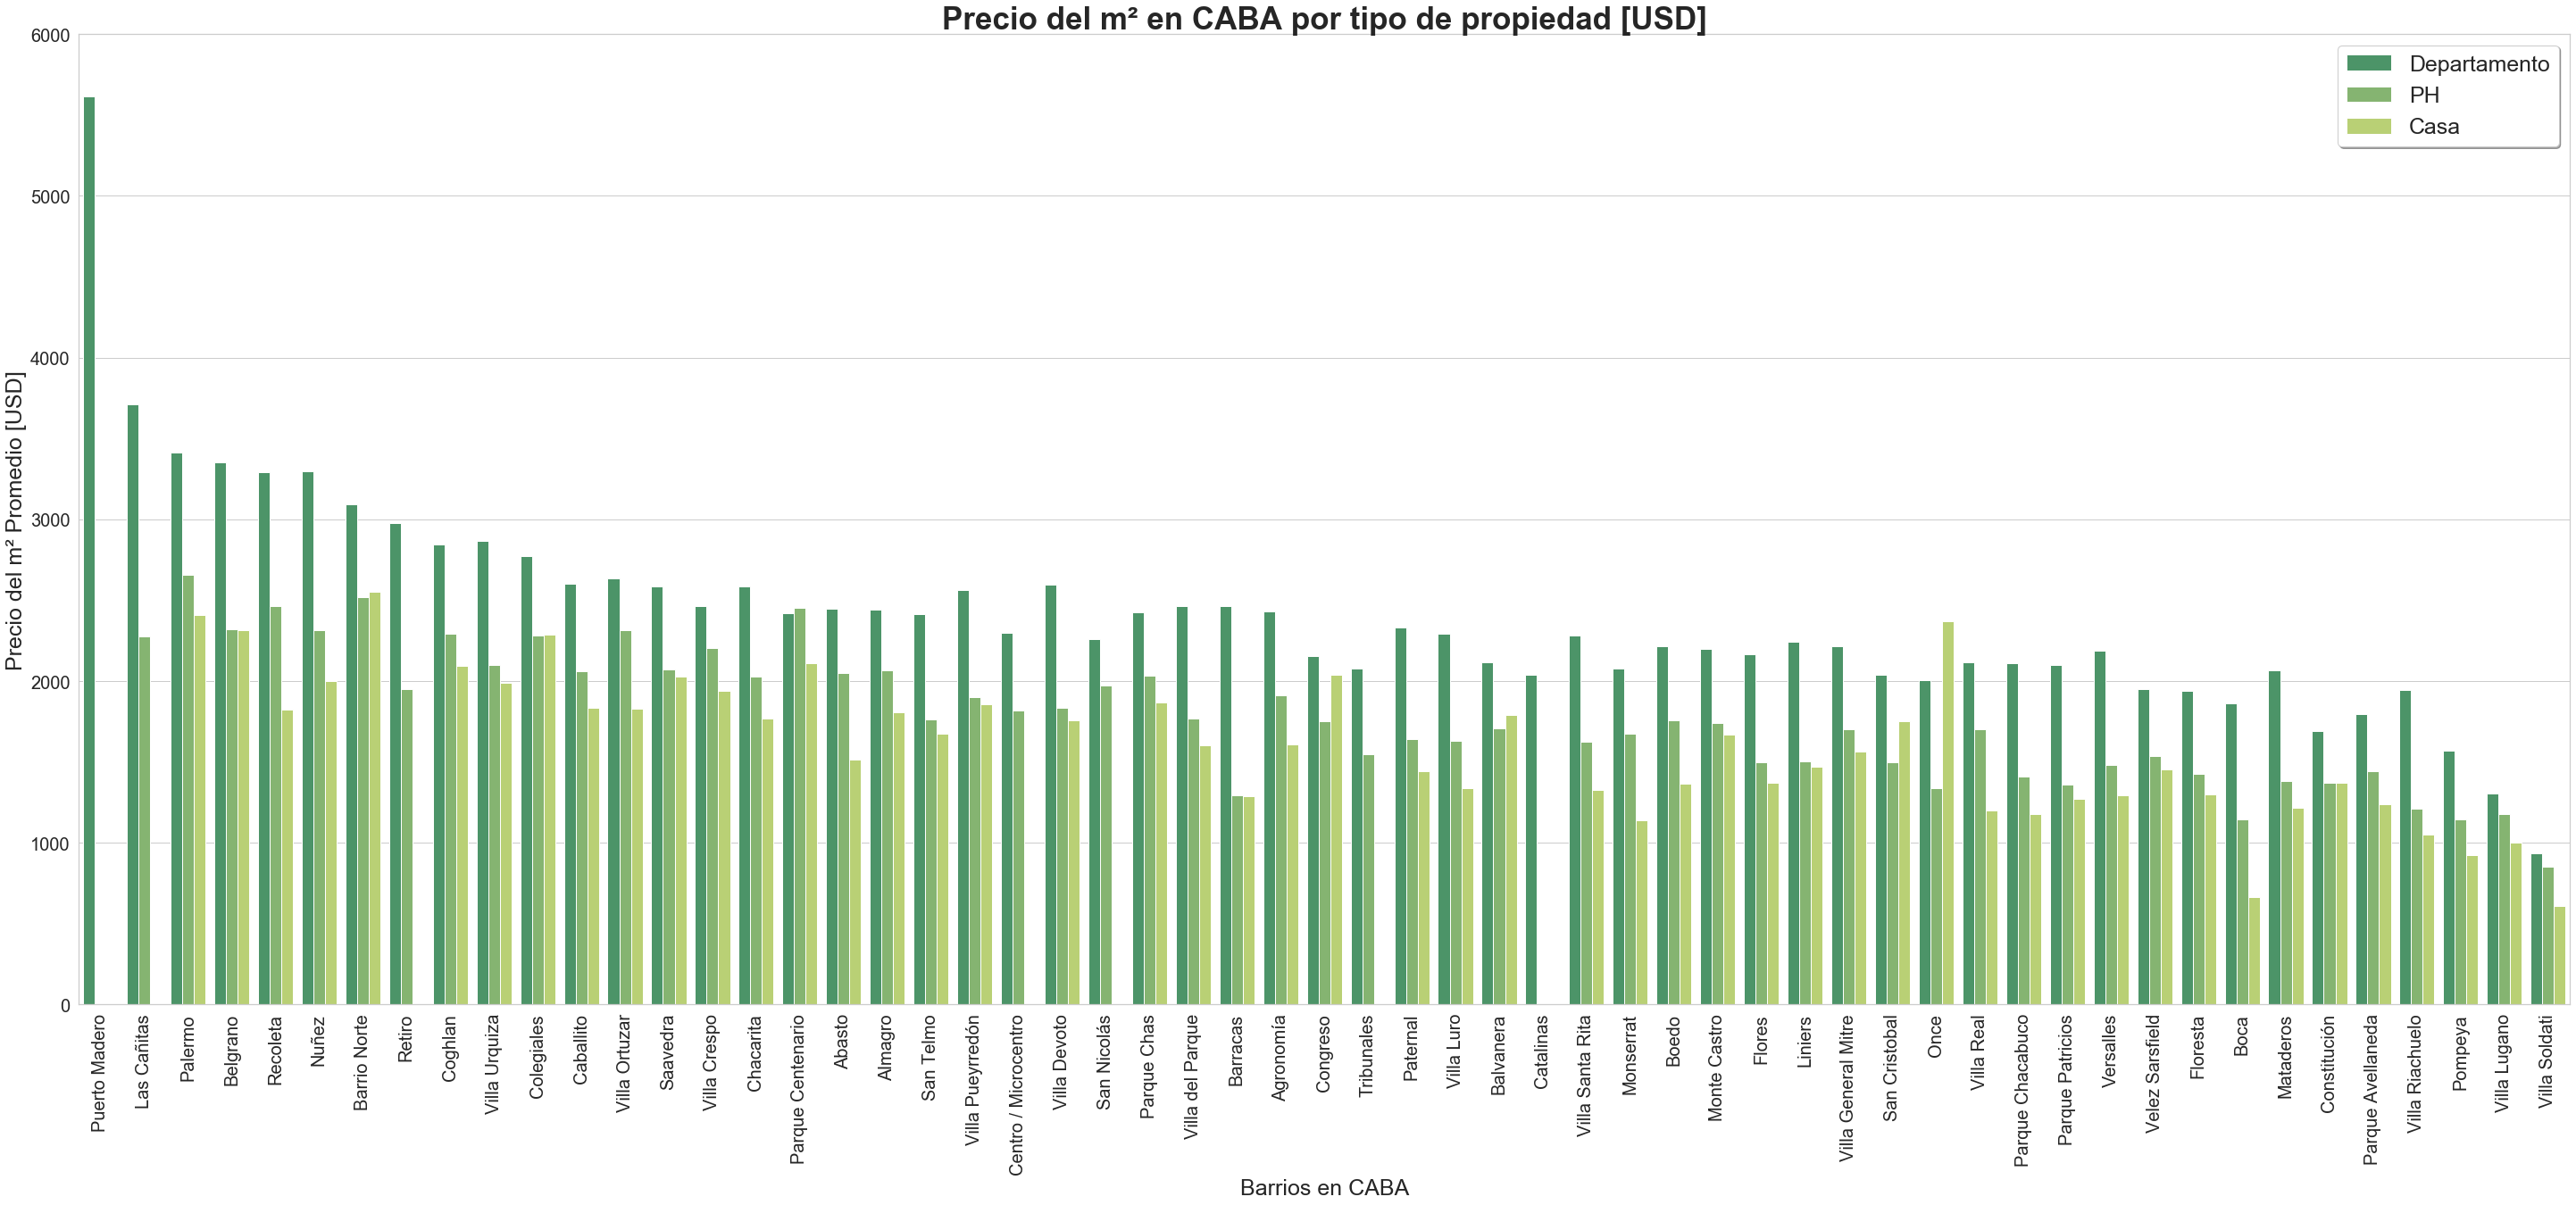

In [173]:
plt.figure(figsize=(50,20))

grafico_precioxbarrio = sns.barplot(x='l3', y='price_per_m2', data=df_RegProp_f6, order= barrios, ci=None, hue='property_type', palette='summer')
grafico_precioxbarrio.set_xticklabels(grafico_precioxbarrio.get_xticklabels(), rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Precio del m² Promedio [USD]',fontsize=25)
plt.xlabel('Barrios en CABA',fontsize=25)
plt.title('Precio del m² en CABA por tipo de propiedad [USD]', fontsize=35, fontweight='bold', fontstretch='semi-expanded')
plt.legend(loc='best', shadow=True, fontsize='xx-large', fancybox=True)
plt.ylim(0,6000)

<p style='text-align: justify'>Si analizamos los tipos de propiedad de mayor cantidad (departamentos, casas y PHs), se puede observar variaciones en la disponibilidad de propiedades según el barrio. Por ejemplo, en Puerto Madero solamente existen departamentos disponibles, al igual que en Catalinas. Otros datos a destacar son la paridad en precio entre deparatamento y PH en Parque Cntenario, y que en Once, es más caro comprar una casa que un departamento. En cambio, en más barato comprar una casa en La Boca, en lugar de un departamento o un PH.

<p style='text-align: justify'>Cabe destacar que a pesar de la veracidad de los datos del dataset, hay que considerar si el origen de los datos son puramente digitales o se consideraron publicaciones hechas en otros medios, como por ejemplo, en los diarios. Esto es importante porque hace que la muestra tomada representa a la población, en este caso al total de publicaciones de venta de propiedades.

## ¿Se puede estimar cuánto ha variado el precio de un departamento en los últimos años?

Para realizar esto se considera la columna "start_date" como la fecha de publicación de la venta de la propiedad. Por lo tanto, para una propiedad determinada, se toma el precio por m<sup>2</sup> y esta fecha como referencias para determina la variación del precio de venta de un departamento, casa o PH.

In [174]:
df_RegProp_f6.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
price_per_m2       float64
dtype: object

In [175]:
df_RegProp_f6.loc[:,'start_date']= pd.to_datetime(df_RegProp_f6['start_date'])
print(df_RegProp_f6.dtypes)

start_date         datetime64[ns]
end_date                   object
created_on                 object
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title                      object
description                object
property_type              object
operation_type             object
price_per_m2              float64
dtype: object


C:\Users\SMFernandez\.conda\envs\datascience\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [176]:
price_depto = df_RegProp_f6[(df_RegProp_f6.property_type == 'Departamento')]
price_casa = df_RegProp_f6[(df_RegProp_f6.property_type == 'Casa')]
price_PH = df_RegProp_f6[(df_RegProp_f6.property_type == 'PH')]

price_per_month_depto = price_depto.groupby(pd.PeriodIndex(price_depto.start_date, freq='M')).mean().price_per_m2.round(2).reset_index()
price_per_month_casa = price_casa.groupby(pd.PeriodIndex(price_casa.start_date, freq='M')).mean().price_per_m2.round(2).reset_index()
price_per_month_PH = price_PH.groupby(pd.PeriodIndex(price_PH.start_date, freq='M')).mean().price_per_m2.round(2).reset_index()


price_per_month_casa

start_date  price_per_m2
0     2019-01       1583.74
1     2019-02       1648.27
2     2019-03       1518.73
3     2019-04       1610.24
4     2019-05       1649.32
5     2019-06       1688.48
6     2019-07       1682.44
7     2019-08       1597.99
8     2019-09       1744.28
9     2019-10       1529.93
10    2019-11       1531.32
11    2019-12       1521.56
12    2020-01       1564.75

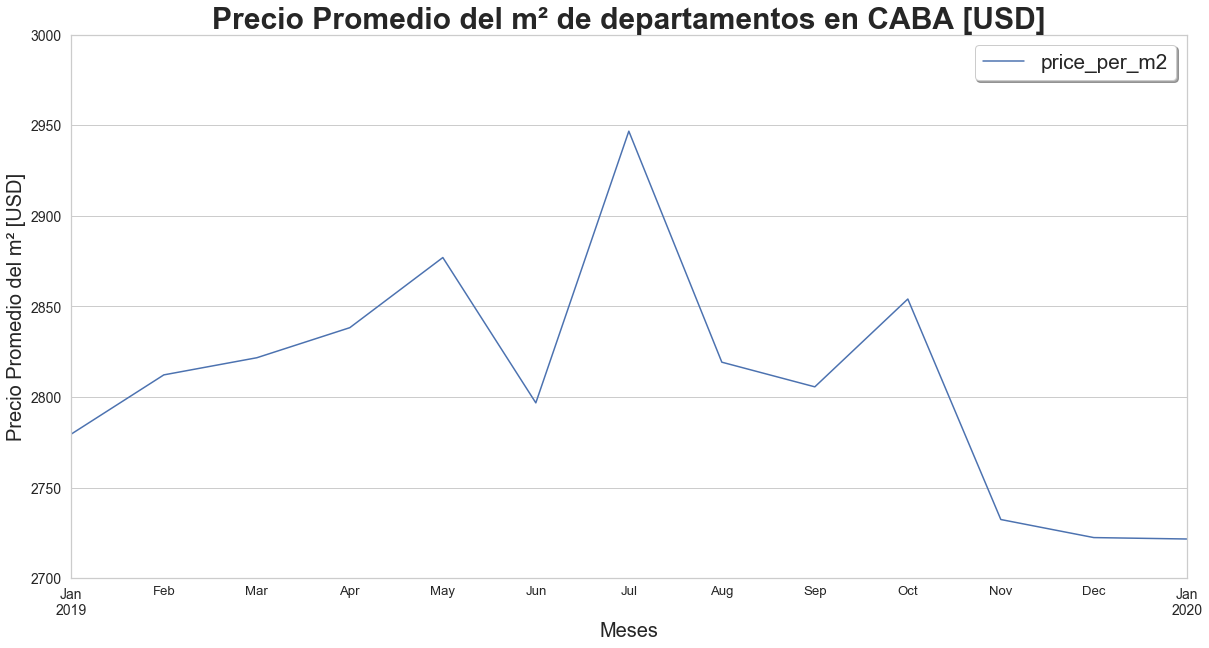

In [177]:
grafico_1 = price_per_month_depto.plot('start_date', 'price_per_m2', figsize=(20,10))
plt.title('Precio Promedio del m² de departamentos en CABA [USD]', fontsize=30, fontweight='bold', fontstretch='semi-expanded')
plt.ylabel('Precio Promedio del m² [USD]',fontsize=20)
plt.xlabel('Meses',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(b=True, axis='both')
plt.ylim(2700, 3000)
plt.legend(loc='best', shadow=True, fontsize='x-large', fancybox=True)
plt.show()

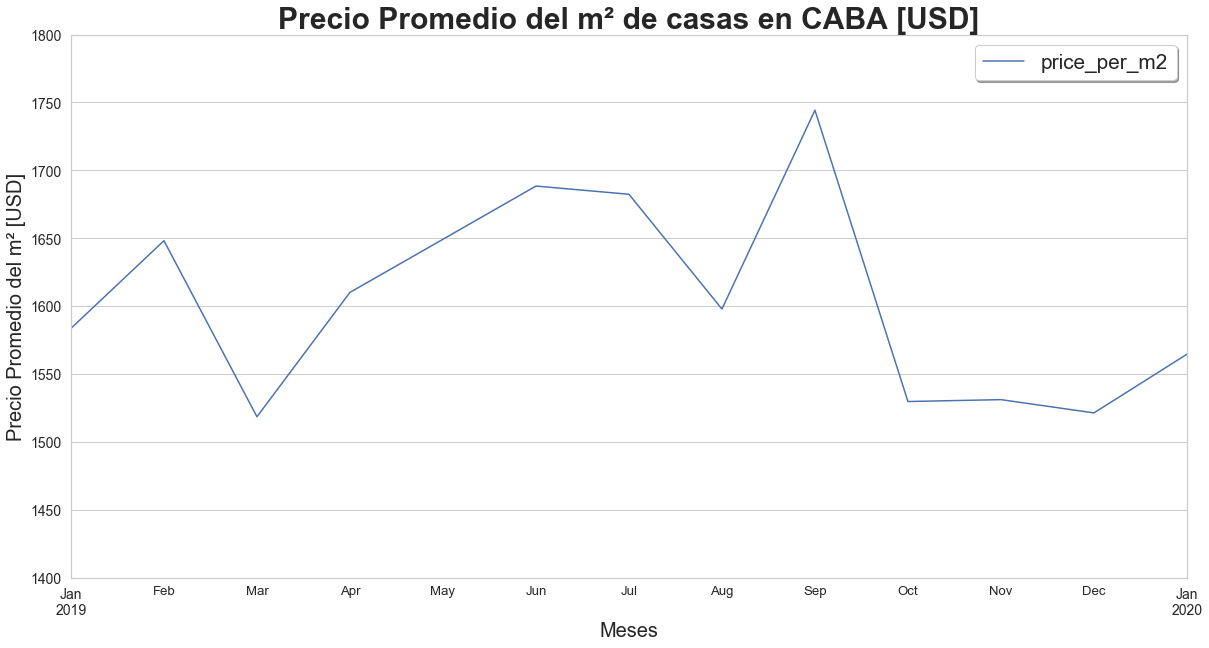

In [178]:
grafico_2 = price_per_month_casa.plot('start_date', 'price_per_m2', figsize=(20,10))
plt.title('Precio Promedio del m² de casas en CABA [USD]', fontsize=30, fontweight='bold', fontstretch='semi-expanded')
plt.ylabel('Precio Promedio del m² [USD]',fontsize=20)
plt.xlabel('Meses',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(1400,1800)
plt.grid(b=True, axis='both')
plt.legend(loc='best', shadow=True, fontsize='x-large', fancybox=True)
plt.show()

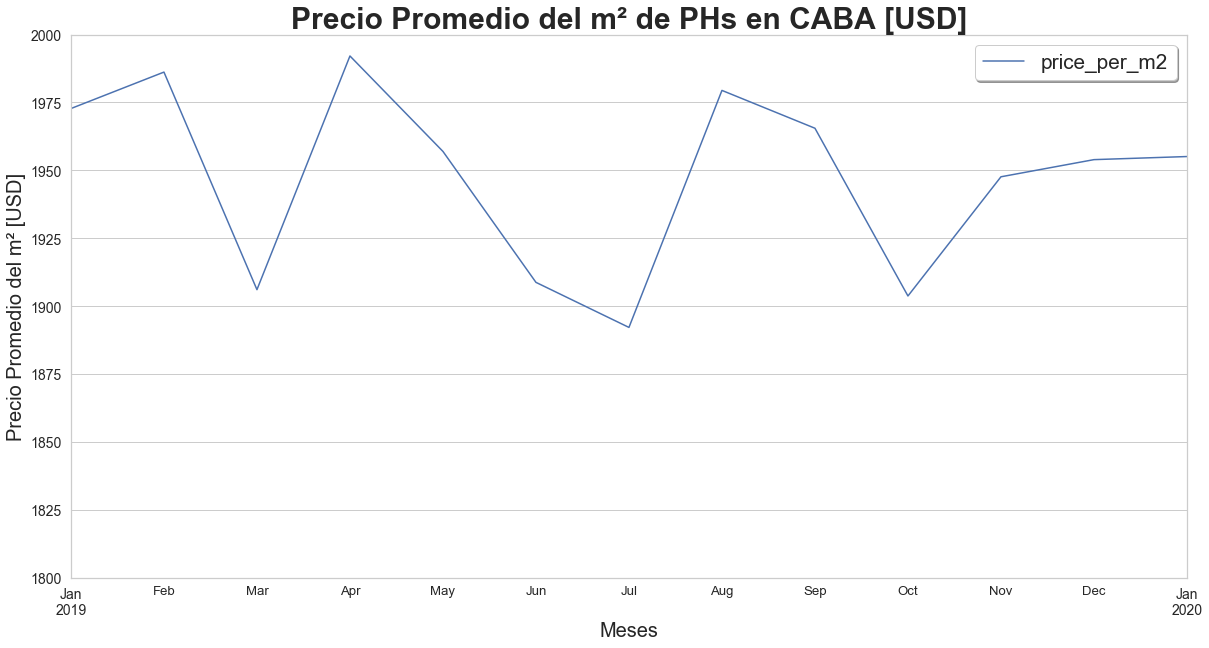

In [179]:
grafico_3 = price_per_month_PH.plot('start_date', 'price_per_m2', figsize=(20,10))
plt.title('Precio Promedio del m² de PHs en CABA [USD]', fontsize=30, fontweight='bold', fontstretch='semi-expanded')
plt.ylabel('Precio Promedio del m² [USD]',fontsize=20)
plt.xlabel('Meses',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(1800,2000)
plt.grid(b=True, axis='both')
plt.legend(loc='best', shadow=True, fontsize='x-large', fancybox=True)
plt.show()

En los gráficos anteriores, se puede observar la variación del precio promedio del metro cuadrado para cada tipo de propiedad. Durante el 2019, los departamentos oscilaron entre los USD 2700 y los USD 2950. En cambio, el m² de las casas en CABA estuvieorn entre los USD 1500 y USD 1750. Por otro lado, los PH valieron entre USD 1850 y USD 2000 el m².

Estos datos fueron obtenidos al tomar el valor medio del precio por m² cada departamento, casa o PH en cada mes del año 2019 y en enero de 2020. Se consideró a CABA como un todo, sin discriminar por barrio.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [180]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

datos_inmobiliaria = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

df_prop_dpc_CABA = datos_inmobiliaria[(datos_inmobiliaria.l2=="Capital Federal") & ((datos_inmobiliaria.property_type=="Departamento") | (datos_inmobiliaria.property_type=="Casa") | (datos_inmobiliaria.property_type=="PH"))]

df_prop_dpc_CABA_filtro1 = df_prop_dpc_CABA[(df_prop_dpc_CABA.surface_total >= 15.0) & (df_prop_dpc_CABA.surface_total <= 1000.0)]
print(df_prop_dpc_CABA_filtro1.shape)

df_prop_dpc_CABA_filtro2 = df_prop_dpc_CABA_filtro1[(df_prop_dpc_CABA_filtro1.price <= 4000000)]
print(df_prop_dpc_CABA_filtro2.shape)

df_prop_dpc_CABA_filtro3 = df_prop_dpc_CABA_filtro2.loc[:,['rooms','bedrooms', 'bathrooms', 'surface_total','surface_covered','price']]
print(df_prop_dpc_CABA_filtro3.shape)
df_prop_dpc_CABA_filtro3.head()

df_Nuevo_prop_dpc_CABA = df_prop_dpc_CABA_filtro3.dropna()
print(df_Nuevo_prop_dpc_CABA.shape)

inconsistencia_surface = df_Nuevo_prop_dpc_CABA.surface_covered > df_Nuevo_prop_dpc_CABA.surface_total 
print(inconsistencia_surface.value_counts())

(82405, 19)
(82373, 19)
(82373, 6)
(81019, 6)
False    80276
True       743
dtype: int64


In [181]:
df_Nuevo_prop_dpc_CABA.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price
0    7.0       7.0        2.0          140.0            140.0  153000.0
1    2.0       1.0        2.0           70.0             58.0  159000.0
2    2.0       1.0        1.0           45.0             45.0  125000.0
3    2.0       1.0        1.0           85.0             50.0  295000.0
5    2.0       1.0        1.0           56.0             56.0  150000.0

In [182]:
print(df_Nuevo_prop_dpc_CABA.shape)

(81019, 6)


In [183]:
df_Nuevo_prop_dpc_CABA.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  81019.000000  81019.000000  81019.000000   81019.000000   
mean       3.009652      2.002037      1.553821      95.361779   
std        1.308602      1.049673      0.852672      77.253578   
min        1.000000      0.000000      1.000000      15.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000    1000.000000   

       surface_covered         price  
count     81019.000000  8.101900e+04  
mean         84.928535  2.637725e+05  
std         156.133119  2.989499e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.250000e+05  
50%          63.000000  1.800000e+05  
75%          96.000000  2.800000e+05  
max       17220.000000  4.000000e+06

## CREACIÓN DEL MODELO DE MACHINE LEARNING

## 3.1 Métrica de Evaluación del Modelo

Para evaluar el modelo de Machine Learning que va a predecir el precio de una propiedad, se va a utilizar una métrica conocida como la **raíz del error cuadrático medio** o **RMSE (Root Mean Square Error)**. Esta métrica es útil cuando se quiere comparar datos predichos y datos reales con la misma unidad de medida.

El objetivo será disminuir al mínimo el RMSE (valor más cercano a cero) para optimizar el modelo, de manera que realice una mejor predicción del precio de una propiedad (departamento, casa y PH) en Capital Federal.

In [184]:
# Se cargan las funciones necesarias de scikit-learn para realizar el modelo.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [185]:
# 2. Se define las variables X e y.

X = df_Nuevo_prop_dpc_CABA.drop("price", axis=1)
y = df_Nuevo_prop_dpc_CABA.price

In [186]:
X.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered
0    7.0       7.0        2.0          140.0            140.0
1    2.0       1.0        2.0           70.0             58.0
2    2.0       1.0        1.0           45.0             45.0
3    2.0       1.0        1.0           85.0             50.0
5    2.0       1.0        1.0           56.0             56.0

In [187]:
y.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Se imprime Train y Test para asegurarse de que tengan la misma forma.

In [189]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


## 3.2 Modelo Benchmark 

Se decide comenzar con un modelo simple de regresión lineal, el cual se evalua  con la métrica seleccionada. A partir de este modelo se realizará una optimización del error. Primero se utilizarán modelos distintos y se seleccionará el más óptimo. Segundo, en caso de no estar satisfecho con el error se podrá realizar un replanteo del dataset. Además, se utilizará el dataset analizado en el punto 2 de este proyecto para realizar una comparación con el dataset propuesto en el punto 3.

In [190]:
lineal_reg_model = LinearRegression()

In [191]:
lineal_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
y_reg_train_pred = lineal_reg_model.predict(X_train)
y_reg_test_pred = lineal_reg_model.predict(X_test)

In [193]:
RMSE_lineal_reg_train = np.sqrt(mean_squared_error(y_train, y_reg_train_pred))
RMSE_lineal_reg_test = np.sqrt(mean_squared_error(y_test, y_reg_test_pred))

print(f'Raíz del error cuadrático medio en Train, Regresión Lineal: {RMSE_lineal_reg_train}')
print(f'Raíz del error cuadrático medio en Test, Regresión Lineal: {RMSE_lineal_reg_test}')

Raíz del error cuadrático medio en Train, Regresión Lineal: 199173.83253528475
Raíz del error cuadrático medio en Test, Regresión Lineal: 202449.36540361567


<p style='text-align: justify'>Si tengo en cuenta el valor medio del precio de una propiedad cercano a USD 263.000, se interpreta que el error que produce este modelo de referencia es **alto**. Sucede lo mismo si se compara el error con la mediana del precio (alrededor de USD 180.000). Teniendo este modelo como referencia se busca optimizar el error utilizando otros modelos, ya que el error obtenido representa una diferencia del orden de los USD 200.000. Por lo tanto, se plantea el modelo de Árboles de Decisión por Regresión y el modelo KNN de Regresión para seleccionar el mejor modelo.

## 3.3 Árbol de Decisión y Modelo KNN: hiperparámetros iniciales a elección

Para plantear los modelos mencionados anteriormente, se deben seleccionar hiperparámetros iniciales. En el caso de árboles de decisión, se utiliza una valor de profundidad de 4 porque es un valor cercano a la cantidad de atributos utilizados en la variable X. En el caso de KNN, se utiliza k = 5 como hiperparámetro estandar (valor por defecto). 

In [194]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


In [195]:
# Se crean los modeloes de árbol de decisión y KNN.

tree_regressor_ini = DecisionTreeRegressor(max_depth = 4, random_state=42)
knn_regressor_ini = KNeighborsRegressor(n_neighbors=5)

In [196]:
# Se entrenan ambos modelos.

tree_regressor_ini.fit(X_train, y_train) 
knn_regressor_ini.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [197]:
# Se hace la predicción del modelo de árbol de decisión.

y_tree_train_pred_ini = tree_regressor_ini.predict(X_train)
y_tree_test_pred_ini = tree_regressor_ini.predict(X_test)

In [198]:
# Se hace la predicción del modelo KNN.

y_knn_train_pred_ini = knn_regressor_ini.predict(X_train)
y_knn_test_pred_ini = knn_regressor_ini.predict(X_test)

In [199]:
# Se evalúa el modelo de árbol de decisión.

RMSE_tree_train_ini = np.sqrt(mean_squared_error(y_train, y_tree_train_pred_ini))
RMSE_tree_test_ini = np.sqrt(mean_squared_error(y_test, y_tree_test_pred_ini))

In [200]:
# Se evalúa el modelo KNN.

RMSE_knn_train_ini = np.sqrt(mean_squared_error(y_train, y_knn_train_pred_ini))
RMSE_knn_test_ini = np.sqrt(mean_squared_error(y_test, y_knn_test_pred_ini))

In [201]:
# Se imprimen los valores de RMSE obtenidos.

print(f'Raíz del error cuadrático medio en Train, Árbol de Decisión (Profundidad=4): {RMSE_tree_train_ini}')
print(f'Raíz del error cuadrático medio en Test, Árbol de Decisión (Profundidad=4): {RMSE_tree_test_ini}')
print()
print(f'Raíz del error cuadrático medio en Train, KNN (k=5): {RMSE_knn_train_ini}')
print(f'Raíz del error cuadrático medio en Test, KNN (k=5): {RMSE_knn_test_ini}')

Raíz del error cuadrático medio en Train, Árbol de Decisión (Profundidad=4): 178947.60749154066
Raíz del error cuadrático medio en Test, Árbol de Decisión (Profundidad=4): 183592.64362839411

Raíz del error cuadrático medio en Train, KNN (k=5): 121300.24049431273
Raíz del error cuadrático medio en Test, KNN (k=5): 155040.1332898459


## 3.4 Gráficos de Valores Reales vs. Valores Predichos

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


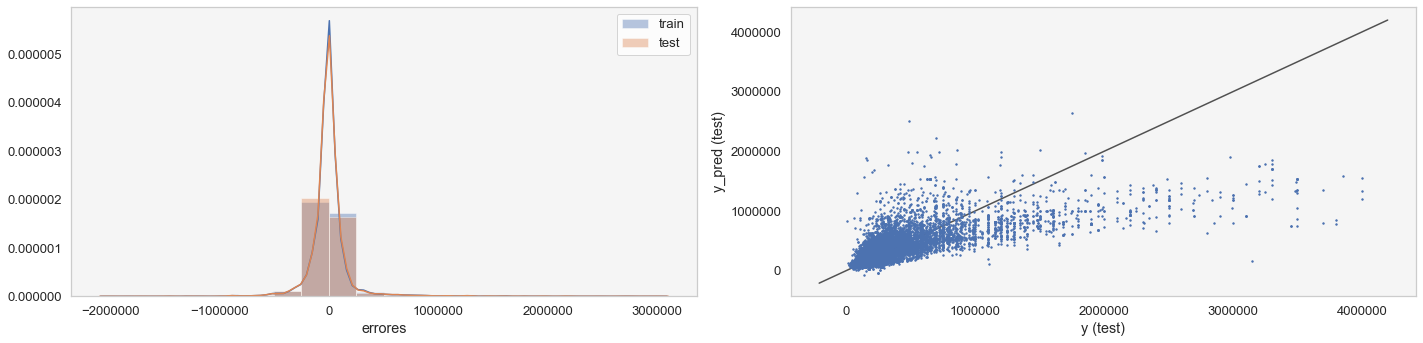

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 178947.60749154066
Raíz del error cuadrático medio en Test: 183592.64362839411


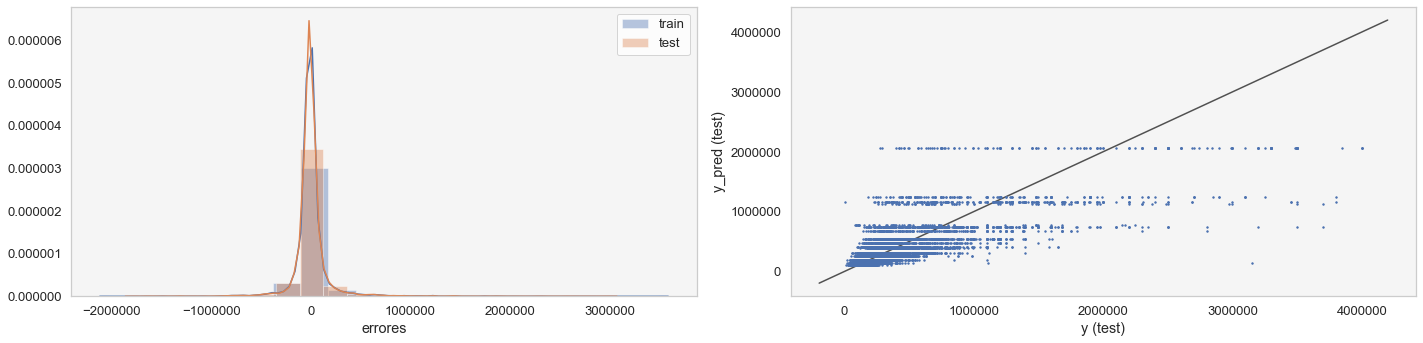

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


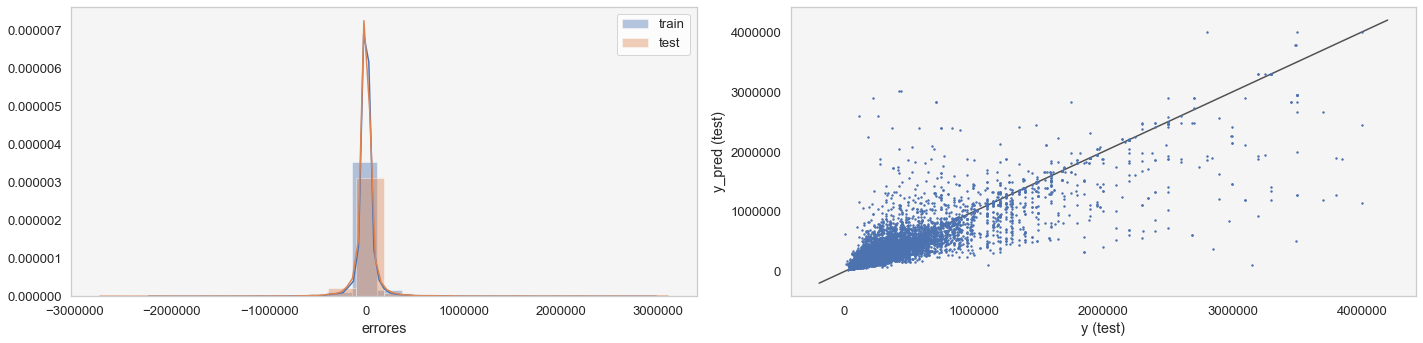

In [202]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([lineal_reg_model, tree_regressor_ini, knn_regressor_ini]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,5))
    

    plt.subplot(1,2,1, facecolor="whitesmoke")
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    plt.grid()

    ax = plt.subplot(1,2,2, facecolor="whitesmoke")
    ax.scatter(y_test,y_test_pred, s =2)
    plt.grid()
      
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**CONCLUSIONES:**
<p style='text-align: justify'>De los tres modelos, se observa que el modelo de árboles de decisión implica un error o RMSE de USD 183.592 en el test, mientras que el modelo de KNN Regressor predice con un error RMSE comparable a un valor de USD 155.040. Por otro lado, el modelo de regresión lineal es el que más error genera (equivalente a USD 202.499 en el test). Con lo cual, hay mucho márgen para mejorar la predicción. 
    
En este caso, el modelo KNN predice con menos error si se lo compara con el resto de los modelos. De todos modos, en este caso se seleccionaron hiperparámetros a elección. Esto significa que se deben optimizar los modelos para determinar el más adecuado.
    
Por otro lado, se visualiza que la distribución del error del tipo gaussiano y que los errores están concentrados alrededor del cero. Esto significa que los modelos desarrollados son adecuados para este análisis.

## 3.5 Árbol de Decisión Optimizado: Selección de hiperparámetros

In [203]:
#Para evaluar un modelo de Árbol de Decisión se crean 2 listas que contendrán los resultados de la evaluación de entrenamiento y del testeo, según RMSE.

lista_RMSE_train_tree = []
lista_RMSE_test_tree = []

# Se define una lista con los valores de profundidad que se quieren explorar.

max_depths = [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# Se plantea un loop con for para entrenar, predecir y evaluar el modelo con cada valor de profundidad de la lita max_depths a explorar. 

for max_depth in max_depths:
    tree_regressor = DecisionTreeRegressor(max_depth = max_depth, random_state=42) # Se define el modelo con el valor de profundidad.
    
    # Se entrena el modelo.
    tree_regressor.fit(X_train, y_train) 
    
    # Se predice sobre el set de entrenamiento y de testeo. 
    y_tree_train_pred = tree_regressor.predict(X_train)
    y_tree_test_pred = tree_regressor.predict(X_test)
    
    # Se evaluan ambos sets bajo la métrica de RMSE
    RMSE_tree_train = np.sqrt(mean_squared_error(y_train, y_tree_train_pred))
    RMSE_tree_test = np.sqrt(mean_squared_error(y_test, y_tree_test_pred))
    
    # Se agrega la información de los resultados a las listas credas previamente
    lista_RMSE_train_tree.append(RMSE_tree_train)
    lista_RMSE_test_tree.append(RMSE_tree_test)    

VALOR DE PROFUNDIDAD ÓPTIMO: 17
RMSE ÓPTIMO EN TEST, ÁRBOL DE DECISIÓN: 146092.75848556007
RMSE ÓPTIMO EN TRAIN, ÁRBOL DE DECISIÓN: 64721.0697732051


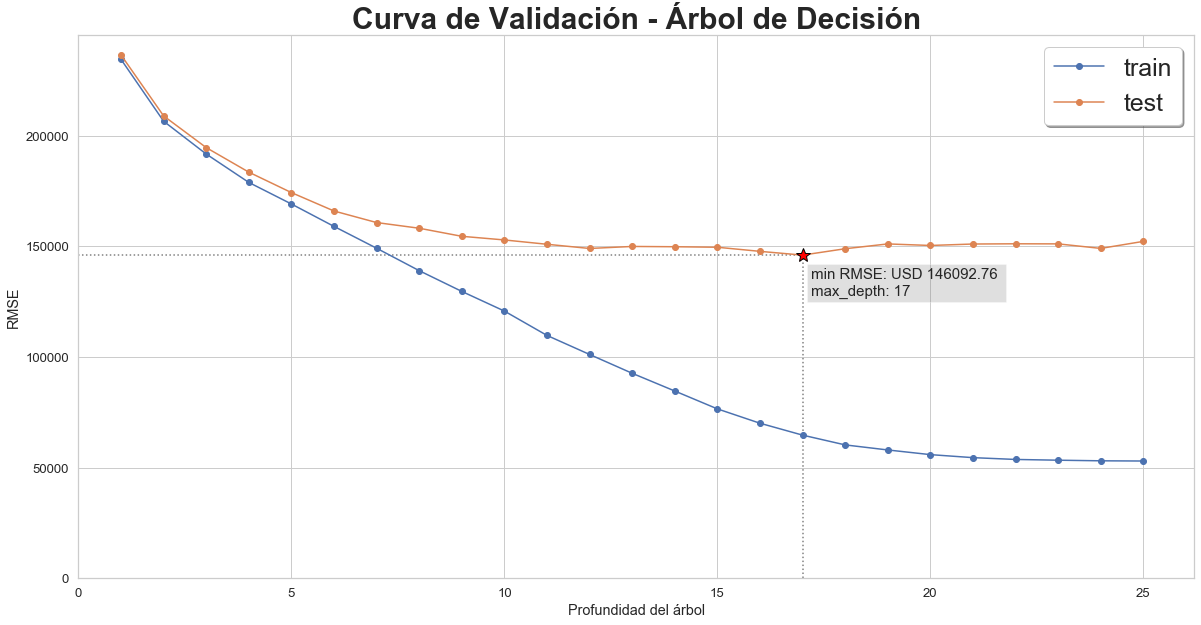

In [204]:
# Grafico la curva de validación del error RMSE del entrenamiento y del testeo.

plt.figure(figsize = (20, 10))

plt.plot(max_depths,lista_RMSE_train_tree,'o-',label='train' )
plt.plot(max_depths,lista_RMSE_test_tree,'o-',label='test')
plt.xlim(0)
plt.ylim(0)
plt.legend(shadow=True, fontsize='xx-large', fancybox=True)
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')
plt.title('Curva de Validación - Árbol de Decisión', fontsize=30, fontweight='bold', fontstretch='semi-expanded')
# Selecciono el hiperparametro de mínimo RMSE. Para ello, identifico el menor RMSE del testeo. No utilizo la curva de entrenamiento porque, al ser un modelo de decisión, el error va a disminuir al aumentar la profundidad del árbol.

RMSE_optimo_test_tree = min(lista_RMSE_test_tree) # Busco el menor RMSE del testeo ya que se que el error de la curva de entrenamiento tiende a cero cuando aumenta la profundidad del árbol de decisión; se sobreajusta el modelo. 
#max_depth_optimo = max_depths[16] # es el nivel 17 de profundidad
max_depth_optimo = max_depths[lista_RMSE_test_tree.index(RMSE_optimo_test_tree)] # Del max_depths, tomo el valor que corresponde con el indice del RMSE_optimo_test_tree. Esto se puede hacer ambas listas tiene la misma longitud (cantidad de datos).
RMSE_optimo_train_tree = lista_RMSE_train_tree[lista_RMSE_test_tree.index(RMSE_optimo_test_tree)]

print(f'VALOR DE PROFUNDIDAD ÓPTIMO: {max_depth_optimo}')
print(f'RMSE ÓPTIMO EN TEST, ÁRBOL DE DECISIÓN: {RMSE_optimo_test_tree}')
print(f'RMSE ÓPTIMO EN TRAIN, ÁRBOL DE DECISIÓN: {RMSE_optimo_train_tree}')

# lo represento en el mismo gráfico.

plt.plot(max_depth_optimo, RMSE_optimo_test_tree, marker='*', markersize=15, color='red', markeredgecolor='black')
# plt.plot(max_depths[16], lista_RMSE_test_tree[16], marker='*', markersize=15, color='red', markeredgecolor='black')
plt.vlines(max_depth_optimo, ymin=0, ymax= RMSE_optimo_test_tree, linestyles='dotted', colors='grey')
plt.hlines(RMSE_optimo_test_tree, xmin=0, xmax= max_depth_optimo, linestyles='dotted', colors='grey')
plt.text(max_depth_optimo+0.2,RMSE_optimo_test_tree - 18000, "min RMSE: USD {:.2f} \nmax_depth: {}".format(RMSE_optimo_test_tree, max_depth_optimo), fontsize=15, bbox=dict(facecolor='grey', alpha=0.25))
plt.show()

Claramente se puede observar que si se entrena el modelo, se obtienen predicciones con bajo nivel de error cuando usamos los datos de entrenammiento. De hecho, a partir de un nivel de profundidad cercano a 22 el RMSE tiende a USD 50000. Por otro lado, con los datos de testeo, el modelo oscila en un valor de RMSE de USD 150000. Vale decir que hiperparámetros mayores a los analizados no interesan porque producen overfitting.

Se elige como hiperparámetro óptimo aquel que reduce al mínimo el RMSE de testeo para los valores de profundidad analizados. Con este criterio se elije la profundidad de 17 como hiperparámetro óptimo. Los errores obtenidos se imprimen arriba del gráfico anterior.

Una profundidad de 17 hace creer que el modelo necesita mejorarse aún más. Una manera es redefinir el dataset con datos de más correlación.

In [205]:
tree_regressor = DecisionTreeRegressor(max_depth = max_depth_optimo, random_state=42)
tree_regressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

## 3.6 KNN Optimizado: Selección de hiperparámetros

In [206]:
#Para evaluar un modelo de KNN se crean 2 listas que contendrán los resultados de la evaluación de entrenamiento y del testeo, según RMSE.

lista_RMSE_train_k_neighbors = []
lista_RMSE_test_k_neighbors = []

# Se define una lista con los valores de profundidad que se quieren explorar.

k_neighbors = [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# Se plantea un loop con for para entrenar, predecir y evaluar el modelo con cada número de vecinos de la lita k_neighbors a explorar. 

for k in k_neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k) # Se define el modelo con el valor de profundidad.
    
    # Se entrena el modelo.
    knn_regressor.fit(X_train, y_train) 
    
    # Se predice sobre el set de entrenamiento y de testeo. 
    y_knn_train_pred = knn_regressor.predict(X_train)
    y_knn_test_pred = knn_regressor.predict(X_test)
    
    # Se evaluan ambos sets bajo la métrica de RMSE
    RMSE_knn_train = np.sqrt(mean_squared_error(y_train, y_knn_train_pred))
    RMSE_knn_test = np.sqrt(mean_squared_error(y_test, y_knn_test_pred))
    
    # Se agrega la información de los resultados a las listas credas previamente
    lista_RMSE_train_k_neighbors.append(RMSE_knn_train)
    lista_RMSE_test_k_neighbors.append(RMSE_knn_test)    

N° DE VECINOS ÓPTIMO: 3
RMSE ÓPTIMO EN TEST, KNN: 152317.82229037234
RMSE ÓPTIMO EN TRAIN, KNN: 103804.20852724434


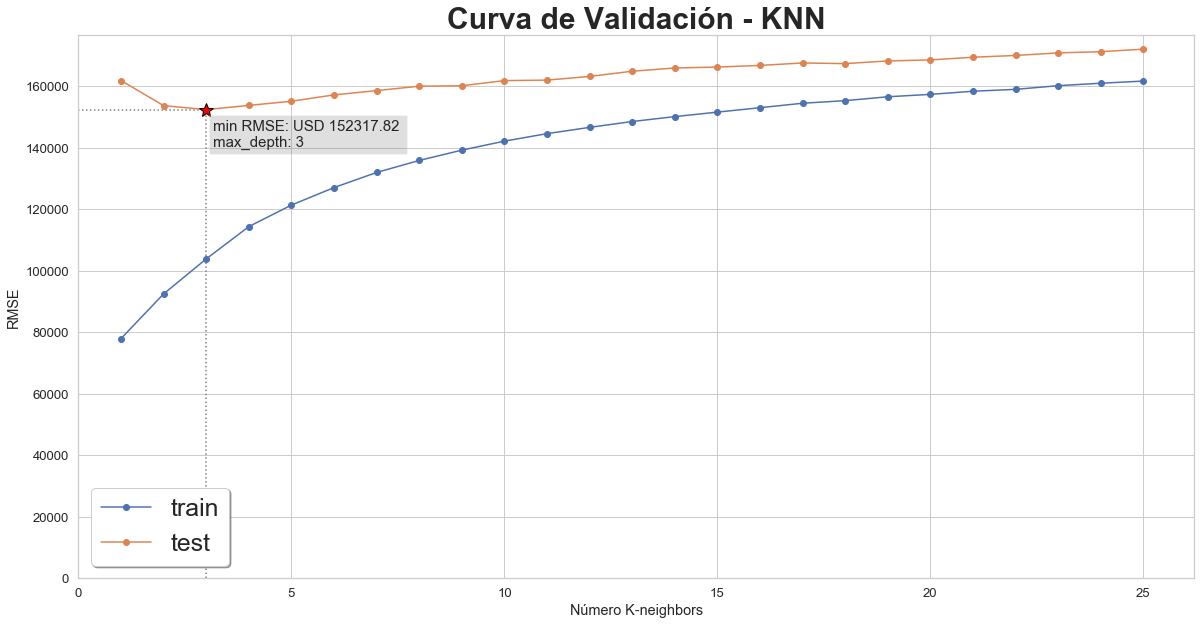

In [207]:
# Grafico la curva de validación del error del entrenamiento y del testeo.

plt.figure(figsize = (20, 10))

plt.plot(k_neighbors,lista_RMSE_train_k_neighbors,'o-',label='train' )
plt.plot(k_neighbors,lista_RMSE_test_k_neighbors,'o-',label='test')
plt.xlim(0)
plt.ylim(0)
# plt.grid()
plt.legend(shadow=True, fontsize='xx-large', fancybox=True)
plt.xlabel('Número K-neighbors')
plt.ylabel('RMSE')
plt.title('Curva de Validación - KNN', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

# Selecciono el hiperparametro de mínimo RMSE y lo represento en el mismo gráfico.
# Minimizo el RMSE de la curva de testeo porque se que al aumentar el número de vecinos, el modelo predice con mayor error al tener mayores vecinos para comparar el dato a definir. Tiende al subajuste.

RMSE_optimo_test_knn = min(lista_RMSE_test_k_neighbors) 
k_neighbors_optimo = k_neighbors[lista_RMSE_test_k_neighbors.index(RMSE_optimo_test_knn)] 
RMSE_optimo_train_knn = lista_RMSE_train_k_neighbors[lista_RMSE_test_k_neighbors.index(RMSE_optimo_test_knn)]

print(f'N° DE VECINOS ÓPTIMO: {k_neighbors_optimo}')
print(f'RMSE ÓPTIMO EN TEST, KNN: {RMSE_optimo_test_knn}')
print(f'RMSE ÓPTIMO EN TRAIN, KNN: {RMSE_optimo_train_knn}')

plt.plot(k_neighbors_optimo, RMSE_optimo_test_knn, marker='*', markersize=15, color='red', markeredgecolor='black')
plt.vlines(k_neighbors_optimo, ymin=0, ymax= RMSE_optimo_test_knn, linestyles='dotted', colors='grey')
plt.hlines(RMSE_optimo_test_knn, xmin=0, xmax= k_neighbors_optimo, linestyles='dotted', colors='grey')
plt.text(k_neighbors_optimo+0.15,RMSE_optimo_test_knn - 12000, "min RMSE: USD {:.2f} \nmax_depth: {}".format(RMSE_optimo_test_knn, k_neighbors_optimo), fontsize=15, bbox=dict(facecolor='grey', alpha=0.25))
plt.show()

En este caso, el hiperparámetro óptimo es k = 3. Este valor genera un error en el modelo, mayor al de árboles de decisión. Además, el error tiende a crecer al aumentar el número de vecinos, tanto para el testeo como para el entrenamiento.

In [208]:
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors_optimo)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [209]:
print(f'RMSE en Train, Regresión Lineal: {RMSE_lineal_reg_train}')
print(f'RMSE en Test, Regresión Lineal: {RMSE_lineal_reg_test}')

print()
print(f'Valor de Profundidad Óptimo: {max_depth_optimo}')
print(f'RMSE Óptimo en Train, ÁRBOL DE DECISIÓN: {RMSE_optimo_train_tree}')
print(f'RMSE Óptimo en Test, ÁRBOL DE DECISIÓN: {RMSE_optimo_test_tree}')

print()
print(f'N° de Vecinos Óptimo: {k_neighbors_optimo}')
print(f'RMSE Óptimo en Train, KNN: {RMSE_optimo_train_knn}')
print(f'RMSE Óptimo en Test, KNN: {RMSE_optimo_test_knn}')

RMSE en Train, Regresión Lineal: 199173.83253528475
RMSE en Test, Regresión Lineal: 202449.36540361567

Valor de Profundidad Óptimo: 17
RMSE Óptimo en Train, ÁRBOL DE DECISIÓN: 64721.0697732051
RMSE Óptimo en Test, ÁRBOL DE DECISIÓN: 146092.75848556007

N° de Vecinos Óptimo: 3
RMSE Óptimo en Train, KNN: 103804.20852724434
RMSE Óptimo en Test, KNN: 152317.82229037234



Analizando los valores de RMSE obtenidos, se observa que el modelo de menor error es el modelo de árboles de decisión. Para indagar más sobre el error se estudia la distribución de los errores RMSE. Por otro lado, se grafica la relación entre los valores reales y los valores predichos.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


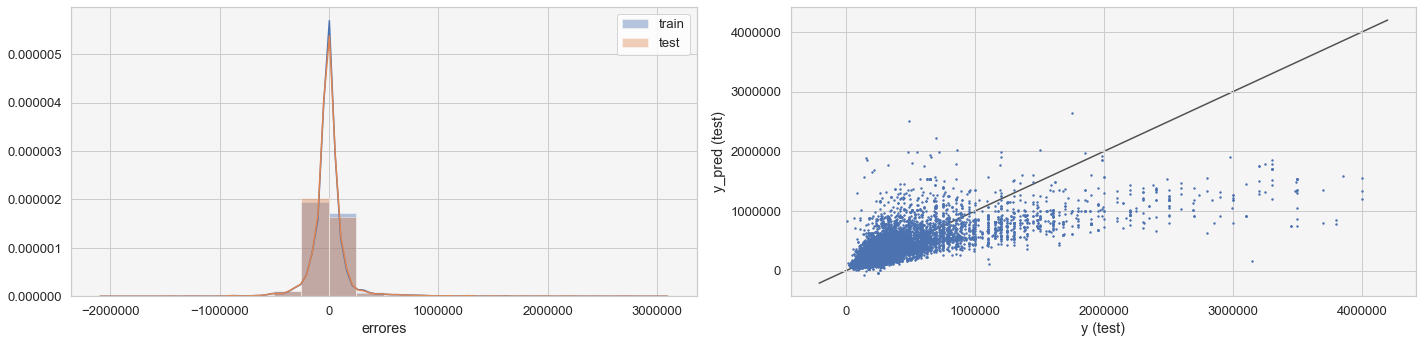

Modelo: Árbol de Decisión Optimizado
Raíz del error cuadrático medio en Train: 64721.0697732051
Raíz del error cuadrático medio en Test: 146092.75848556007


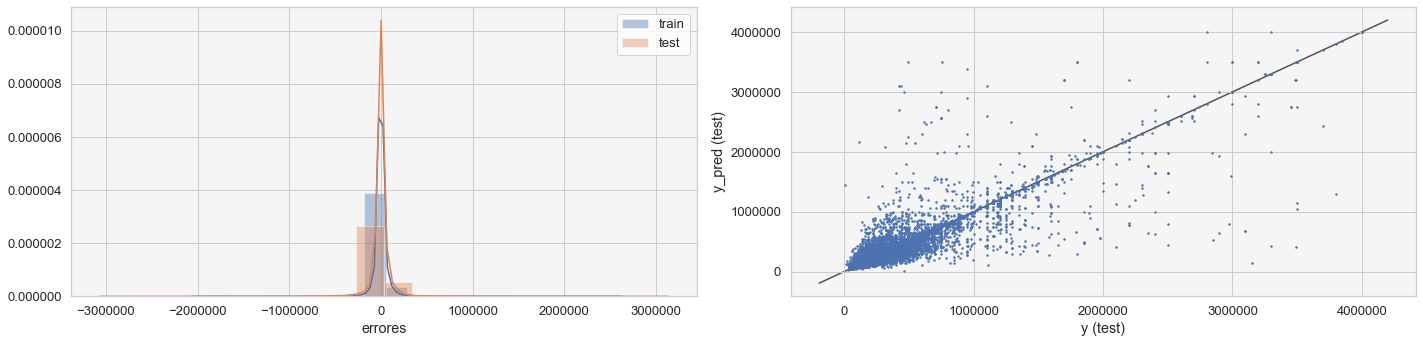

Modelo: Vecinos más cercanos Optimizado
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


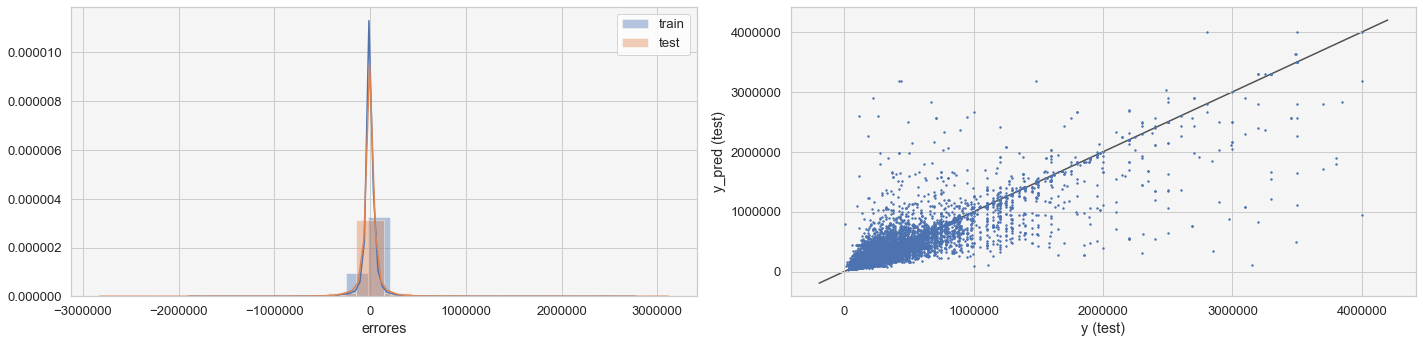

In [210]:
modelos = ['Regresión lineal', 'Árbol de Decisión Optimizado', 'Vecinos más cercanos Optimizado']

for i, model in enumerate([lineal_reg_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,5))
    

    plt.subplot(1,2,1, facecolor="whitesmoke")
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    #plt.grid()

    ax = plt.subplot(1,2,2, facecolor="whitesmoke")
    ax.scatter(y_test,y_test_pred, s =2)
    #plt.grid()
      
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**CONCLUSIONES**

<p style='text-align: justify'>Entre los modelos utilizados, elegiría el modelo de Árbol de Decisión porque es el que genera menos error RMSE en el Test. Además, el RMSE del entrenamiento también es menor al resto de los modelos analizados (Regresión Lineal y KNN). Por otro lado, la distribución de los errores del testeo y del entrenamiento son similares (no habría un gran overfitting) y  siguen un comportamiento aproximadamente gaussiano. También se observa que ambas distribuciones son prácticamente simétricas y los errores son similares, ya que se concentran alrededor del cero.

<p style='text-align: justify'>Sin embargo, el modelo de árboles de decisión sigue teniendo un gran valor de error (RMSE en testeo: USD 146092.7) que puede ser equivalente al precio de una propiedad. Esto significa que el modelo podría mejorarse (reducir el error al evaluarlo). Para ello, se podría utilizar el tipo de propiedad como una variable más para analizar el precio (siempre se analizaron las propiedades en conjunto). Otra información que se podría utilizar es la ubicación de cada departamento, casa o PH.
    

## 3.7 Mejoras en el Modelo de ML
    
<p style='text-align: justify'>Algo que podría mejorar el modelo y, por lo tanto la predicción del precio de una propiedad, es reinterpretar el concepto de superficie total y superficie cubierta. En el análisis de correlación se observó que ambas superficies tienen una correlacion muy alta (0.93 para el método de Pearson considerando las propiedades en conjunto). Por ende, ambas variables juntas no suman al modelado ya que, al ser similares, parecería que se repite el uso de la superficie de una propiedad.
    
<p style='text-align: justify'>Por esta razón se hará un modelado con el dataset filtrado en la segunda parte del proyecto, agregando solamente las variables de tipo de propiedad y ubicación (planteos realizados en la conclusión anterior). 
    
<p style='text-align: justify'>Por último, se podría analizar el atributo "Description" ya que se observó que en algunos casos se menciona la disponibilidad de cocheras. En el caso de las fechas de publicación, se podría utilizar esta información para conocer el precio en función del tiempo. De esta manera podriamos predecir cuanto puede variar el precio en el tiempo (esto mejoraría se se tiene información de venta de varios años). Estas variables no se utilizarán en esta ocasión para poder acotar el alcance del proyecto. Sin embargo, es realizable.
    

In [211]:
df_RegProp_filtro5

start_date    end_date  created_on        lat        lon         l1  \
0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5       2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   
...            ...         ...         ...        ...        ...        ...   
146553  2019-07-31  2020-01-17  2019-07-31 -34.581308 -58.431236  Argentina   
146554  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146555  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146556  2019-07-31  2020-01-17  2019-07-31 -34.584134 -58.436389  Argentina   
146557  2019-07-31  2019-08-23  2019-07-31 -34.583995 -58.417645  Argentina   

                     l2             l3  rooms  bedrooms  bathrooms  \
0       Capital Federal  San Cristobal    7.0       7.0        2.0   
1       Capital Federal          Boedo    2.0       1.0        2.0   
2       Capital Federal        Palermo    2.0       1.0        1.0   
3       Capital Federal        Palermo    2.0       1.0        1.0   
5       Capital Federal   Villa Crespo    2.0       1.0        1.0   
...                 ...            ...    ...       ...        ...   
146553  Capital Federal        Palermo    4.0       3.0        2.0   
146554  Capital Federal        Palermo    4.0       3.0        3.0   
146555  Capital Federal        Palermo    3.0       2.0        2.0   
146556  Capital Federal        Palermo    4.0       2.0        2.0   
146557  Capital Federal        Palermo    3.0       2.0        2.0   

        surface_total  surface_covered     price currency  \
0               140.0            140.0  153000.0      USD   
1                70.0             58.0  159000.0      USD   
2                45.0             45.0  125000.0      USD   
3                85.0             50.0  295000.0      USD   
5                56.0             56.0  150000.0      USD   
...               ...              ...       ...      ...   
146553          106.0            100.0  620000.0      USD   
146554          175.0            111.0  570000.0      USD   
146555          144.0            134.0  480000.0      USD   
146556          317.0            143.0  530000.0      USD   
146557          145.0            145.0  420000.0      USD   

                                                    title  \
0             ***Venta semipiso centro, ideal hostel*****   
1        Espectacular PH reciclado en Boedo sin expensas.   
2       Depto.tipo casa de 2 ambientes en Venta en Pal...   
3       COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5       Depto.tipo casa de 2 ambientes en Venta en Vil...   
...                                                   ...   
146553          Torre Mirabilia - 4 amb - Piso Alto 106m2   
146554  Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...   
146555  PH Reciclado a nuevo en pleno Palermo Hollywood!    
146556  Hermoso PH reciclado - 4 ambientes + Pileta + ...   
146557  Venta. Departamento. 3 Ambientes. 145m². Ampli...   

                                              description property_type  \
0       DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1        PH reciclado en Boedo a una cuadra de la plaz...            PH   
2       2 ambienets amplio , excelente estado , patio ...            PH   
3       HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5       Excelente ph solo 2 unidades, no paga expensas...            PH   
...                                                   ...           ...   
146553  Living comedor con acceso a Balcón aterrazadoM...  Departamento   
146554  Espectacular Ph 4 Ambientes de excelente calid...            PH   
146555  Espectacular Ph 3 Ambientes de excelente calid...            PH   
14

In [212]:
df_mydata = df_RegProp_filtro5.loc[:,['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type', 'price']]

In [213]:
df_mydata

l3  rooms  bedrooms  bathrooms  surface_total  \
0       San Cristobal    7.0       7.0        2.0          140.0   
1               Boedo    2.0       1.0        2.0           70.0   
2             Palermo    2.0       1.0        1.0           45.0   
3             Palermo    2.0       1.0        1.0           85.0   
5        Villa Crespo    2.0       1.0        1.0           56.0   
...               ...    ...       ...        ...            ...   
146553        Palermo    4.0       3.0        2.0          106.0   
146554        Palermo    4.0       3.0        3.0          175.0   
146555        Palermo    3.0       2.0        2.0          144.0   
146556        Palermo    4.0       2.0        2.0          317.0   
146557        Palermo    3.0       2.0        2.0          145.0   

        surface_covered property_type     price  
0                 140.0  Departamento  153000.0  
1                  58.0            PH  159000.0  
2                  45.0            PH  125000.0  
3                  50.0            PH  295000.0  
5                  56.0            PH  150000.0  
...                 ...           ...       ...  
146553            100.0  Departamento  620000.0  
146554            111.0            PH  570000.0  
146555            134.0            PH  480000.0  
146556            143.0            PH  530000.0  
146557            145.0  Departamento  420000.0  

[74551 rows x 8 columns]

In [214]:
property_type_dummy = pd.get_dummies(df_mydata['property_type'])
l3_barrios_dummy = pd.get_dummies(df_mydata['l3'])

In [215]:
property_type_dummy

Casa  Departamento  PH
0          0             1   0
1          0             0   1
2          0             0   1
3          0             0   1
5          0             0   1
...      ...           ...  ..
146553     0             1   0
146554     0             0   1
146555     0             0   1
146556     0             0   1
146557     0             1   0

[74551 rows x 3 columns]

In [216]:
df_mydata_ML = pd.concat([df_mydata, property_type_dummy, l3_barrios_dummy], axis=1)

In [217]:
df_mydata_ML.head()

l3  rooms  bedrooms  bathrooms  surface_total  surface_covered  \
0  San Cristobal    7.0       7.0        2.0          140.0            140.0   
1          Boedo    2.0       1.0        2.0           70.0             58.0   
2        Palermo    2.0       1.0        1.0           45.0             45.0   
3        Palermo    2.0       1.0        1.0           85.0             50.0   
5   Villa Crespo    2.0       1.0        1.0           56.0             56.0   

  property_type     price  Casa  Departamento  ...  Villa Lugano  Villa Luro  \
0  Departamento  153000.0     0             1  ...             0           0   
1            PH  159000.0     0             0  ...             0           0   
2            PH  125000.0     0             0  ...             0           0   
3            PH  295000.0     0             0  ...             0           0   
5            PH  150000.0     0             0  ...             0           0   

   Villa Ortuzar  Villa Pueyrredón  Villa Real  Villa Riachuelo  \
0              0                 0           0                0   
1              0                 0           0                0   
2              0                 0           0                0   
3              0                 0           0                0   
5              0                 0           0                0   

   Villa Santa Rita  Villa Soldati  Villa Urquiza  Villa del Parque  
0                 0              0              0                 0  
1                 0              0              0                 0  
2                 0              0              0                 0  
3                 0              0              0                 0  
5                 0              0              0                 0  

[5 rows x 68 columns]

In [218]:
df_mydata_ML = df_mydata_ML.drop(['l3', 'property_type'], axis=1)

In [219]:
df_mydata_ML

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0         7.0       7.0        2.0          140.0            140.0  153000.0   
1         2.0       1.0        2.0           70.0             58.0  159000.0   
2         2.0       1.0        1.0           45.0             45.0  125000.0   
3         2.0       1.0        1.0           85.0             50.0  295000.0   
5         2.0       1.0        1.0           56.0             56.0  150000.0   
...       ...       ...        ...            ...              ...       ...   
146553    4.0       3.0        2.0          106.0            100.0  620000.0   
146554    4.0       3.0        3.0          175.0            111.0  570000.0   
146555    3.0       2.0        2.0          144.0            134.0  480000.0   
146556    4.0       2.0        2.0          317.0            143.0  530000.0   
146557    3.0       2.0        2.0          145.0            145.0  420000.0   

        Casa  Departamento  PH  Abasto  ...  Villa Lugano  Villa Luro  \
0          0             1   0       0  ...             0           0   
1          0             0   1       0  ...             0           0   
2          0             0   1       0  ...             0           0   
3          0             0   1       0  ...             0           0   
5          0             0   1       0  ...             0           0   
...      ...           ...  ..     ...  ...           ...         ...   
146553     0             1   0       0  ...             0           0   
146554     0             0   1       0  ...             0           0   
146555     0             0   1       0  ...             0           0   
146556     0             0   1       0  ...             0           0   
146557     0             1   0       0  ...             0           0   

        Villa Ortuzar  Villa Pueyrredón  Villa Real  Villa Riachuelo  \
0                   0                 0           0                0   
1                   0                 0           0                0   
2                   0                 0           0                0   
3                   0                 0           0                0   
5                   0                 0           0                0   
...               ...               ...         ...              ...   
146553              0                 0           0                0   
146554              0                 0           0                0   
146555              0                 0           0                0   
146556              0                 0           0                0   
146557              0                 0           0                0   

        Villa Santa Rita  Villa Soldati  Villa Urquiza  Villa del Parque  
0                      0              0              0                 0  
1                      0              0              0                 0  
2                      0              0              0                 0  
3                      0              0              0                 0  
5                      0              0              0                 0  
...                  ...            ...            ...               ...  
146553                 0              0              0                 0  
146554                 0              0              0                 0  
146555                 0              0              0                 0  
146556                 0              0              0                 0  
146557                 0              0              0                 0  

[74551 rows x 66 columns]

Luego de modificar el dataset, agregando dummies para considerar la ubicación de las propiedades y el tipo de propiedad, se definen la variables X e y, se separan las muestras y se realiza la predicción.

In [220]:
# Se define las variables X e y.

X2 = df_mydata_ML.drop("price", axis=1)
y2 = df_mydata_ML.price

In [221]:
X2.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered  Casa  \
0    7.0       7.0        2.0          140.0            140.0     0   
1    2.0       1.0        2.0           70.0             58.0     0   
2    2.0       1.0        1.0           45.0             45.0     0   
3    2.0       1.0        1.0           85.0             50.0     0   
5    2.0       1.0        1.0           56.0             56.0     0   

   Departamento  PH  Abasto  Agronomía  ...  Villa Lugano  Villa Luro  \
0             1   0       0          0  ...             0           0   
1             0   1       0          0  ...             0           0   
2             0   1       0          0  ...             0           0   
3             0   1       0          0  ...             0           0   
5             0   1       0          0  ...             0           0   

   Villa Ortuzar  Villa Pueyrredón  Villa Real  Villa Riachuelo  \
0              0                 0           0                0   
1              0                 0           0                0   
2              0                 0           0                0   
3              0                 0           0                0   
5              0                 0           0                0   

   Villa Santa Rita  Villa Soldati  Villa Urquiza  Villa del Parque  
0                 0              0              0                 0  
1                 0              0              0                 0  
2                 0              0              0                 0  
3                 0              0              0                 0  
5                 0              0              0                 0  

[5 rows x 65 columns]

In [222]:
y2.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [223]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [224]:
print(X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

(52185, 65) (52185,) (22366, 65) (22366,)


## 3.7.1 Regresión Lineal 2

In [225]:
lineal_reg_model2 = LinearRegression()
lineal_reg_model2.fit(X_train2, y_train2)
y_reg_train_pred2 = lineal_reg_model2.predict(X_train2)
y_reg_test_pred2 = lineal_reg_model2.predict(X_test2)

RMSE_lineal_reg_train2 = np.sqrt(mean_squared_error(y_train2, y_reg_train_pred2))
RMSE_lineal_reg_test2 = np.sqrt(mean_squared_error(y_test2, y_reg_test_pred2))
print(f'RMSE en Train, Regresión Lineal: {RMSE_lineal_reg_train2}')
print(f'RMSE en Test, Regresión Lineal: {RMSE_lineal_reg_test2}')

RMSE en Train, Regresión Lineal: 87939.569017645
RMSE en Test, Regresión Lineal: 88449.40196294148


## 3.7.2 Árbol de Decisión 2 Optimizado

In [226]:
#Para evaluar un modelo de Árbol de Decisión se crean 2 listas que contendrán los resultados de la evaluación de entrenamiento y del testeo, según RMSE.

lista_RMSE_train_tree2 = []
lista_RMSE_test_tree2 = []

# Se define una lista con los valores de profundidad que se quieren explorar.

max_depths2 = [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# Se plantea un loop con for para entrenar, predecir y evaluar el modelo con cada valor de profundidad de la lita max_depths a explorar. 

for max_depth in max_depths2:
    tree_regressor2 = DecisionTreeRegressor(max_depth = max_depth, random_state=42) # Se define el modelo con el valor de profundidad.
    
    # Se entrena el modelo.
    tree_regressor2.fit(X_train2, y_train2) 
    
    # Se predice sobre el set de entrenamiento y de testeo. 
    y_tree_train_pred2 = tree_regressor2.predict(X_train2)
    y_tree_test_pred2 = tree_regressor2.predict(X_test2)
    
    # Se evaluan ambos sets bajo la métrica de RMSE
    RMSE_tree_train2 = np.sqrt(mean_squared_error(y_train2, y_tree_train_pred2))
    RMSE_tree_test2 = np.sqrt(mean_squared_error(y_test2, y_tree_test_pred2))
    
    # Se agrega la información de los resultados a las listas credas previamente
    lista_RMSE_train_tree2.append(RMSE_tree_train2)
    lista_RMSE_test_tree2.append(RMSE_tree_test2)   

VALOR DE PROFUNDIDAD ÓPTIMO: 24
RMSE ÓPTIMO EN TEST, ÁRBOL DE DECISIÓN: 69077.15873868625
RMSE ÓPTIMO EN TRAIN, ÁRBOL DE DECISIÓN: 25344.35766240408


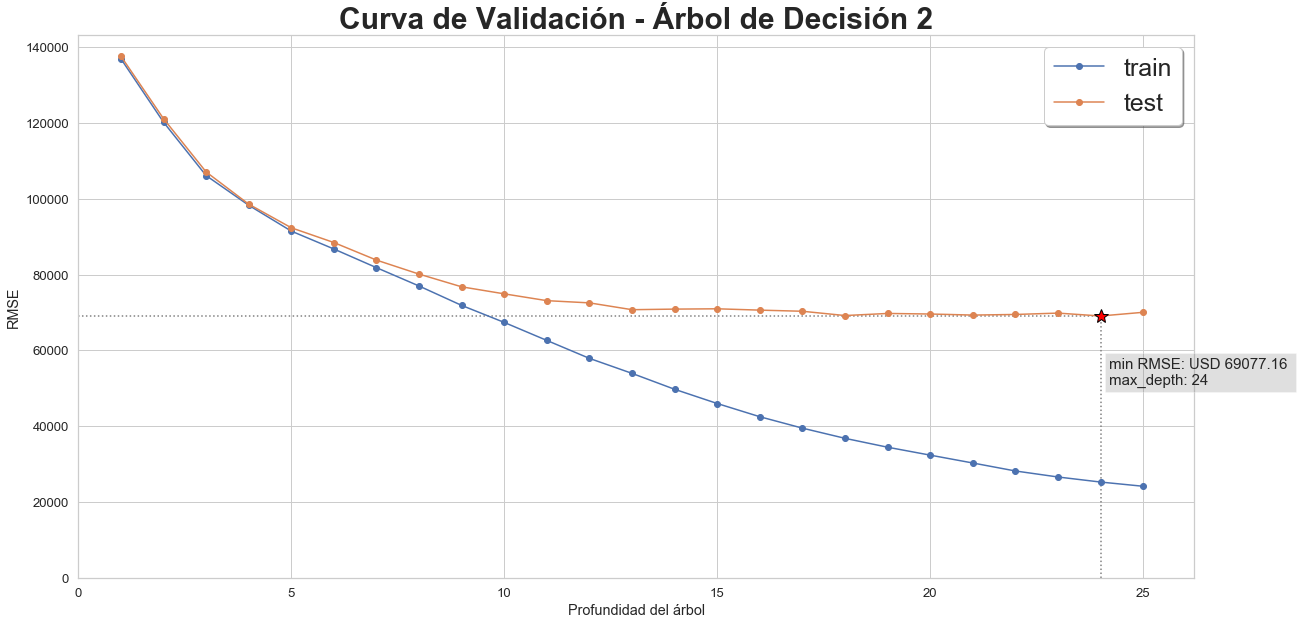

In [227]:
# Grafico la curva de validación del error RMSE del entrenamiento y del testeo.

plt.figure(figsize = (20, 10))

plt.plot(max_depths2,lista_RMSE_train_tree2,'o-',label='train' )
plt.plot(max_depths2,lista_RMSE_test_tree2,'o-',label='test')
plt.xlim(0)
plt.ylim(0)
#plt.grid()
plt.legend(shadow=True, fontsize='xx-large', fancybox=True)
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')
plt.title('Curva de Validación - Árbol de Decisión 2', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

# Selecciono el hiperparametro de mínimo RMSE. Para ello, identifico el menor RMSE del testeo. No utilizo la curva de entrenamiento porque, al ser un modelo de decisión, el error va a disminuir al aumentar la profundidad del árbol.

RMSE_optimo_test_tree2 = min(lista_RMSE_test_tree2) # Busco el menor RMSE del testeo ya que se que el error de la curva de entrenamiento tiende a cero cuando aumenta la profundidad del árbol de decisión; se sobreajusta el modelo. 
max_depth_optimo2 = max_depths2[lista_RMSE_test_tree2.index(RMSE_optimo_test_tree2)] # Del max_depths, tomo el valor que corresponde con el indice del RMSE_optimo_test_tree. Esto se puede hacer ambas listas tiene la misma longitud (cantidad de datos).
RMSE_optimo_train_tree2 = lista_RMSE_train_tree2[lista_RMSE_test_tree2.index(RMSE_optimo_test_tree2)]

print(f'VALOR DE PROFUNDIDAD ÓPTIMO: {max_depth_optimo2}')
print(f'RMSE ÓPTIMO EN TEST, ÁRBOL DE DECISIÓN: {RMSE_optimo_test_tree2}')
print(f'RMSE ÓPTIMO EN TRAIN, ÁRBOL DE DECISIÓN: {RMSE_optimo_train_tree2}')

# lo represento en el mismo gráfico.

plt.plot(max_depth_optimo2, RMSE_optimo_test_tree2, marker='*', markersize=15, color='red', markeredgecolor='black')
plt.vlines(max_depth_optimo2, ymin=0, ymax= RMSE_optimo_test_tree2, linestyles='dotted', colors='grey')
plt.hlines(RMSE_optimo_test_tree2, xmin=0, xmax= max_depth_optimo2, linestyles='dotted', colors='grey')
plt.text(max_depth_optimo2 + 0.2,RMSE_optimo_test_tree2 - 18000, "min RMSE: USD {:.2f} \nmax_depth: {}".format(RMSE_optimo_test_tree2, max_depth_optimo2), fontsize=15, bbox=dict(facecolor='grey', alpha=0.25))
plt.show()

En el gráfico anterior se observa cómo disminuye el RMSE respecto de modelo realizado en el comienzo. Ahora, el RMSE para el test tiende a los USD 70000, mientras que el RMSE del train tiende a los USD 20000. Si bien hubo mejora (disminuyó el error), todavía es alto considerando que se habla de dinero.

In [228]:
tree_regressor2 = DecisionTreeRegressor(max_depth = max_depth_optimo2, random_state=42)
tree_regressor2.fit(X_train2, y_train2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=24,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

## 3.7.3 KNN 2

In [229]:
#Para evaluar un modelo de KNN se crean 2 listas que contendrán los resultados de la evaluación de entrenamiento y del testeo, según RMSE.

lista_RMSE_train_k_neighbors2 = []
lista_RMSE_test_k_neighbors2 = []

# Se define una lista con los valores de profundidad que se quieren explorar.

k_neighbors2 = [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# Se plantea un loop con for para crear, entrenar, predecir y evaluar el modelo con cada número de vecinos de la lita k_neighbors a explorar. 

for k in k_neighbors2:
    knn_regressor2 = KNeighborsRegressor(n_neighbors=k) # Se define el modelo con el valor de profundidad.
    
    # Se entrena el modelo.
    knn_regressor2.fit(X_train2, y_train2) 
    
    # Se predice sobre el set de entrenamiento y de testeo. 
    y_knn_train_pred2 = knn_regressor2.predict(X_train2)
    y_knn_test_pred2 = knn_regressor2.predict(X_test2)
    
    # Se evaluan ambos sets bajo la métrica de RMSE
    RMSE_knn_train2 = np.sqrt(mean_squared_error(y_train2, y_knn_train_pred2))
    RMSE_knn_test2 = np.sqrt(mean_squared_error(y_test2, y_knn_test_pred2))
    
    # Se agrega la información de los resultados a las listas credas previamente
    lista_RMSE_train_k_neighbors2.append(RMSE_knn_train2)
    lista_RMSE_test_k_neighbors2.append(RMSE_knn_test2) 

N° DE VECINOS ÓPTIMO: 2
RMSE ÓPTIMO EN TEST, KNN: 82143.53292103882
RMSE ÓPTIMO EN TRAIN, KNN: 44813.11584264499


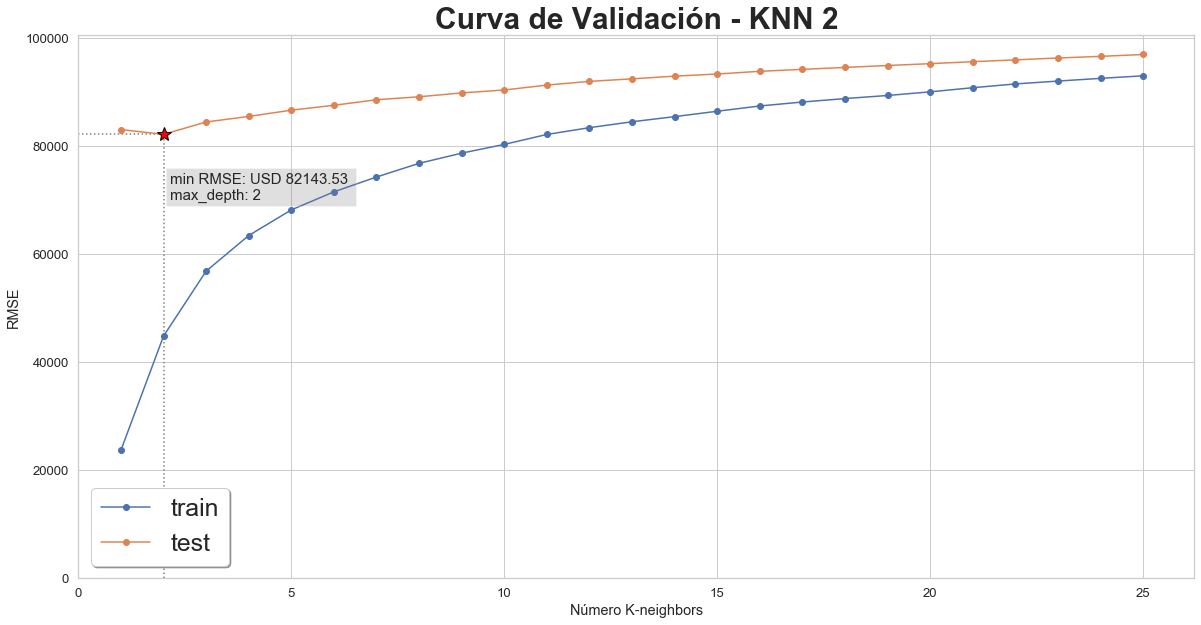

In [230]:
# Grafico la curva de validación del error del entrenamiento y del testeo.

plt.figure(figsize = (20, 10))

plt.plot(k_neighbors2,lista_RMSE_train_k_neighbors2,'o-',label='train' )
plt.plot(k_neighbors2,lista_RMSE_test_k_neighbors2,'o-',label='test')
plt.xlim(0)
plt.ylim(0)
#plt.grid()
plt.legend(shadow=True, fontsize='xx-large', fancybox=True)
plt.xlabel('Número K-neighbors')
plt.ylabel('RMSE')
plt.title('Curva de Validación - KNN 2', fontsize=30, fontweight='bold', fontstretch='semi-expanded')

# Selecciono el hiperparametro de mínimo RMSE y lo represento en el mismo gráfico.
# Minimizo el RMSE de la curva de testeo porque se que al aumentar el número de vecinos, el modelo predice con mayor error al tener mayores vecinos para comparar el dato a definir. Tiende al subajuste.

RMSE_optimo_test_knn2 = min(lista_RMSE_test_k_neighbors2) 
k_neighbors_optimo2 = k_neighbors2[lista_RMSE_test_k_neighbors2.index(RMSE_optimo_test_knn2)] 
RMSE_optimo_train_knn2 = lista_RMSE_train_k_neighbors2[lista_RMSE_test_k_neighbors2.index(RMSE_optimo_test_knn2)]

print(f'N° DE VECINOS ÓPTIMO: {k_neighbors_optimo2}')
print(f'RMSE ÓPTIMO EN TEST, KNN: {RMSE_optimo_test_knn2}')
print(f'RMSE ÓPTIMO EN TRAIN, KNN: {RMSE_optimo_train_knn2}')

plt.plot(k_neighbors_optimo2, RMSE_optimo_test_knn2, marker='*', markersize=15, color='red', markeredgecolor='black')
plt.vlines(k_neighbors_optimo2, ymin=0, ymax= RMSE_optimo_test_knn2, linestyles='dotted', colors='grey')
plt.hlines(RMSE_optimo_test_knn2, xmin=0, xmax= k_neighbors_optimo2, linestyles='dotted', colors='grey')
plt.text(k_neighbors_optimo2 + 0.15,RMSE_optimo_test_knn2 - 12000, "min RMSE: USD {:.2f} \nmax_depth: {}".format(RMSE_optimo_test_knn2, k_neighbors_optimo2), fontsize=15, bbox=dict(facecolor='grey', alpha=0.25))
plt.show()

En este gráfico se destaca el cambio del número de vecinos óptimo, el cual pasa a ser 2 (en el primer modelo KNN era 3).

In [231]:
knn_regressor2 = KNeighborsRegressor(n_neighbors=k_neighbors_optimo2)
knn_regressor2.fit(X_train2, y_train2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [232]:
print(f'RMSE en Train, Regresión Lineal: {RMSE_lineal_reg_train2}')
print(f'RMSE en Test, Regresión Lineal: {RMSE_lineal_reg_test2}')
print()
print(f'Valor de Profundidad Óptimo: {max_depth_optimo2}')
print(f'RMSE Óptimo en Train, ÁRBOL DE DECISIÓN: {RMSE_optimo_train_tree2}')
print(f'RMSE Óptimo en Test, ÁRBOL DE DECISIÓN: {RMSE_optimo_test_tree2}')
print()
print(f'N° de Vecinos Óptimo: {k_neighbors_optimo2}')
print(f'RMSE Óptimo en Train, KNN: {RMSE_optimo_train_knn2}')
print(f'RMSE Óptimo en Test, KNN: {RMSE_optimo_test_knn2}')

RMSE en Train, Regresión Lineal: 87939.569017645
RMSE en Test, Regresión Lineal: 88449.40196294148

Valor de Profundidad Óptimo: 24
RMSE Óptimo en Train, ÁRBOL DE DECISIÓN: 25344.35766240408
RMSE Óptimo en Test, ÁRBOL DE DECISIÓN: 69077.15873868625

N° de Vecinos Óptimo: 2
RMSE Óptimo en Train, KNN: 44813.11584264499
RMSE Óptimo en Test, KNN: 82143.53292103882


Modelo: Regresión lineal 2
Raíz del error cuadrático medio en Train: 87939.569017645
Raíz del error cuadrático medio en Test: 88449.40196294148


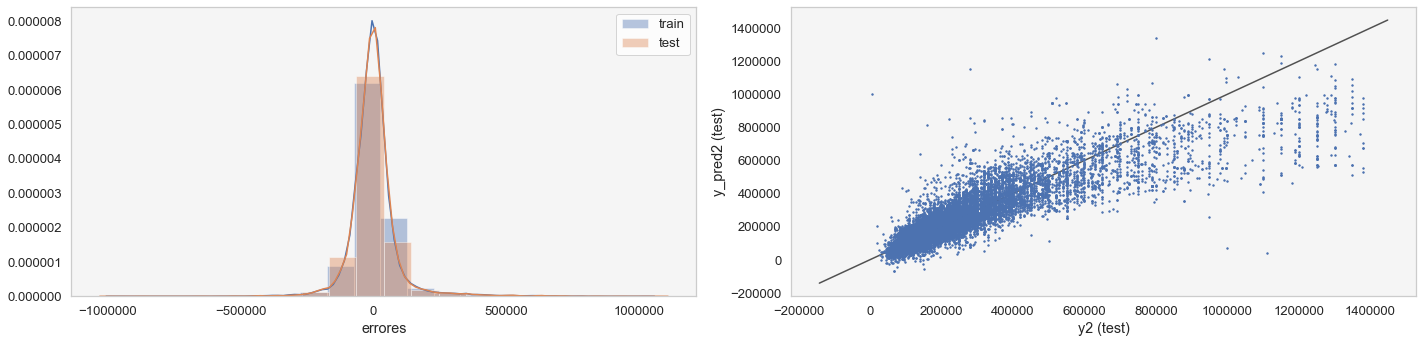

Modelo: Árbol de Decisión 2
Raíz del error cuadrático medio en Train: 25344.35766240408
Raíz del error cuadrático medio en Test: 69077.15873868625


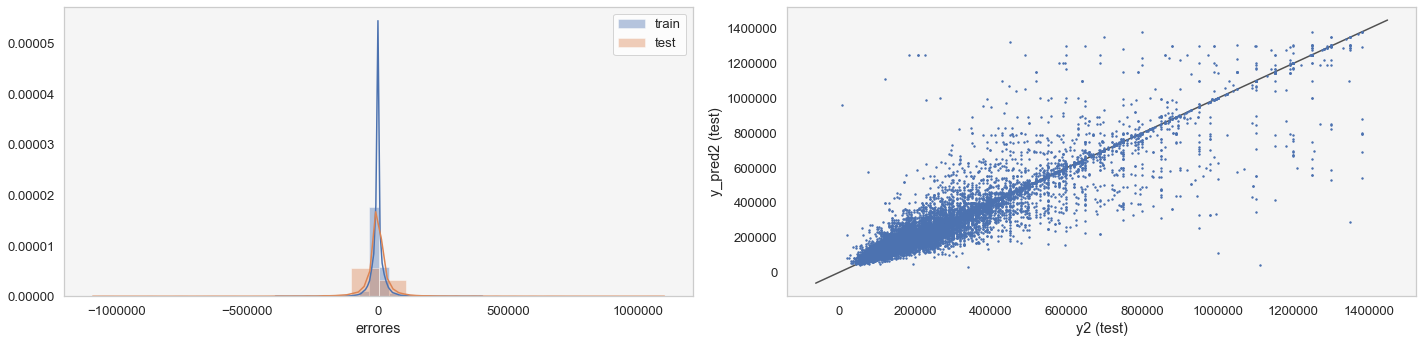

Modelo: KNN 2
Raíz del error cuadrático medio en Train: 44813.11584264499
Raíz del error cuadrático medio en Test: 82143.53292103882


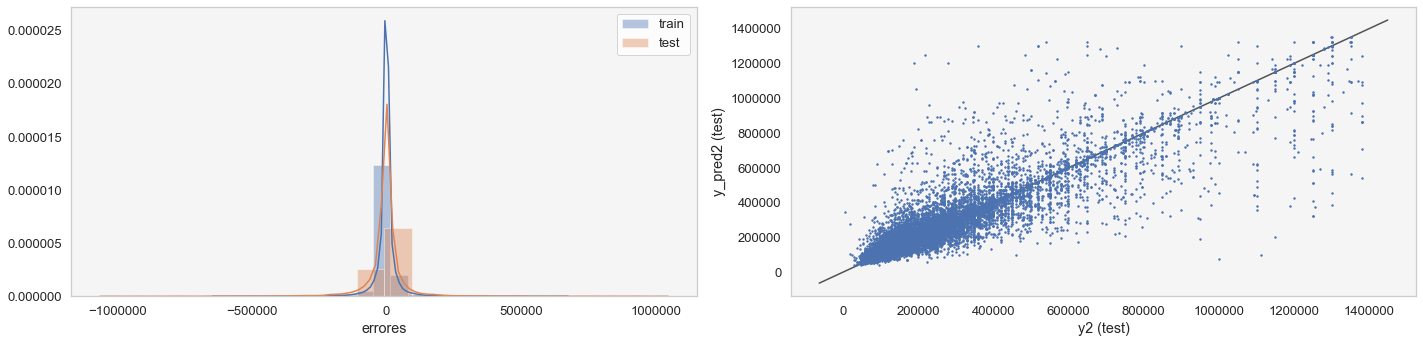

In [233]:
modelos = ['Regresión lineal 2', 'Árbol de Decisión 2', 'KNN 2']

for i, model in enumerate([lineal_reg_model2, tree_regressor2, knn_regressor2]):
    y_train_pred2 = model.predict(X_train2)
    y_test_pred2 = model.predict(X_test2)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train2 = np.sqrt(mean_squared_error(y_train2, y_train_pred2))
    rmse_test2 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train2}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test2}')
    
    plt.figure(figsize = (20,5))
    

    plt.subplot(1,2,1, facecolor="whitesmoke")
    sns.distplot(y_train2 - y_train_pred2, bins = 20, label = 'train')
    sns.distplot(y_test2 - y_test_pred2, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    plt.grid()

    ax = plt.subplot(1,2,2, facecolor="whitesmoke")
    ax.scatter(y_test2,y_test_pred2, s =2)
    plt.grid()
      
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y2 (test)')
    plt.ylabel('y_pred2 (test)')
    
    plt.tight_layout()
    plt.show()

En este gráfico se visualiza  una mejor concentración del error cerca del cero (menor desviación estándar). Además, se observa que la relación entre el "y real" y el "y predicho" es más lineal que en los primeros modelos de Regresión Lineal, Árboles de Decisión y KNN. 

En el último item de este proyecto se muestran los valores de cada modelo, obtenidos luego de ir analizando los modelos Regresión Lineal, Árboles de Decisión y KNN, y de modificar el dataset.

## 4 CONCLUSIONES

Diferenciando los tipos de propiedad y la ubicación por barrio en el dataset se logró mejorar el modelo, reduciendo el error RMSE en un orden de magnitud. A continuación se puede observar el cambio realizado. Se imprime el valor del primer modelo realizado y del segundo, el cual fue mejorado al modificar el dataset.

In [234]:
print('Regresión Lineal')
print(f'RMSE en Train, Regresión Lineal: {RMSE_lineal_reg_train}')
print(f'RMSE en Test, Regresión Lineal: {RMSE_lineal_reg_test}')
print()
print('Regresión Lineal 2')
print(f'RMSE en Train, Regresión Lineal 2: {RMSE_lineal_reg_train2}')
print(f'RMSE en Test, Regresión Lineal 2: {RMSE_lineal_reg_test2}')

Regresión Lineal
RMSE en Train, Regresión Lineal: 199173.83253528475
RMSE en Test, Regresión Lineal: 202449.36540361567

Regresión Lineal 2
RMSE en Train, Regresión Lineal 2: 87939.569017645
RMSE en Test, Regresión Lineal 2: 88449.40196294148


In [235]:
print('Árbol de Decisión Optimizado')
print(f'Valor de Profundidad Óptimo: {max_depth_optimo}')
print(f'RMSE Óptimo en Train, ÁRBOL DE DECISIÓN: {RMSE_optimo_train_tree}')
print(f'RMSE Óptimo en Test, ÁRBOL DE DECISIÓN: {RMSE_optimo_test_tree}')
print()
print('Árbol de Decisión Optimizado 2')
print(f'Valor de Profundidad Óptimo: {max_depth_optimo2}')
print(f'RMSE Óptimo en Train, ÁRBOL DE DECISIÓN 2: {RMSE_optimo_train_tree2}')
print(f'RMSE Óptimo en Test, ÁRBOL DE DECISIÓN 2: {RMSE_optimo_test_tree2}')

Árbol de Decisión Optimizado
Valor de Profundidad Óptimo: 17
RMSE Óptimo en Train, ÁRBOL DE DECISIÓN: 64721.0697732051
RMSE Óptimo en Test, ÁRBOL DE DECISIÓN: 146092.75848556007

Árbol de Decisión Optimizado 2
Valor de Profundidad Óptimo: 24
RMSE Óptimo en Train, ÁRBOL DE DECISIÓN 2: 25344.35766240408
RMSE Óptimo en Test, ÁRBOL DE DECISIÓN 2: 69077.15873868625


In [236]:
print('KNN Optimizado')
print(f'N° de Vecinos Óptimo: {k_neighbors_optimo}')
print(f'RMSE Óptimo en Train, KNN: {RMSE_optimo_train_knn}')
print(f'RMSE Óptimo en Test, KNN: {RMSE_optimo_test_knn}')
print()

print('KNN Optimizado 2')
print(f'N° de Vecinos Óptimo: {k_neighbors_optimo2}')
print(f'RMSE Óptimo en Train, KNN 2: {RMSE_optimo_train_knn2}')
print(f'RMSE Óptimo en Test, KNN 2: {RMSE_optimo_test_knn2}')

KNN Optimizado
N° de Vecinos Óptimo: 3
RMSE Óptimo en Train, KNN: 103804.20852724434
RMSE Óptimo en Test, KNN: 152317.82229037234

KNN Optimizado 2
N° de Vecinos Óptimo: 2
RMSE Óptimo en Train, KNN 2: 44813.11584264499
RMSE Óptimo en Test, KNN 2: 82143.53292103882


Se puede observa que el mejor modelo es el de Árbol de Decisión con un RMSE en el test equivalente a USD 69077, y un RMSE en el train equivalente a USD 25344. El modelo de predicción mejora en gran medida. Sin embargo, estos valores siguen siendo poco admisibles si se pone en el lugar de un comprador o vendedor de una propiedad porque la predicción genera errores de una gran cantidad de dinero. Por eso, se considera que el modelo tiene posibilidad de mejora. Solamente se tiene que tener cuidado de no llegar a una instancia de overfitting.

Como propuesta de mejora, se podría volver a la etapa de exploraciòn de datos y revisar el filtrado de outliers. Además se debería analizar otros atributos como "Description" o las referidas a fechas, para seguir buscando información relevante para predecir el precio de una propiedad de mejor manera.